#### PROJECT GOAL: THE GOAL OF THE PROJECT IS TO TEST THE DEGREE OF EFFECTIVENESS OF SELECTED MACHINE LEARNING MODELS/ALGORITHMS TO PREDICT VALUE OF "SALE_PRICE" FEATURE OF HOUSE PRICES - ADVANCED REGRESSION TECHNIQUES KAGGLE CASE

In [1287]:
import pandas as pd

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

#### LOADING TRAINING, TEST, ORIGINAL TRAIN AND ORIGINAL TEST DATA

In [1288]:
data_train= pd.read_csv('C:/Users/Krzysiek/Desktop/Kaggle competitions/House Prices - Advanced Regression Techniques/train.csv')
data_test= pd.read_csv('C:/Users/Krzysiek/Desktop/Kaggle competitions/House Prices - Advanced Regression Techniques/test.csv')

original_data_train= pd.read_csv('C:/Users/Krzysiek/Desktop/Kaggle competitions/House Prices - Advanced Regression Techniques/train.csv')
original_data_test= pd.read_csv('C:/Users/Krzysiek/Desktop/Kaggle competitions/House Prices - Advanced Regression Techniques/test.csv')

#### PRINTING DATA_TRAIN DATAFRAME

In [1289]:
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

#### PRINTING DATA_TEST DATAFRAME

In [1290]:
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

#### CREATING DATASET WHICH WILL KEEP DATA_TRAIN AND DATA_TEST IN ORDER

In [1291]:
dataset = [data_train, data_test]

#### PRINTING INFORMATION OF DATA TRAIN - WE WANT TO KNOW HOW MANY CELLS OF DATA TRAIN ARE NOT-NULL AND WHAT TYPE OF DATA IS DEFINED FOR DIFFERENT FEATURES (COLUMNS)

In [1292]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### DATASET DUPLICATES CHECKING

In [1293]:
amount_duplicated_values_train = data_train.duplicated().sum()
amount_duplicated_values_test = data_test.duplicated().sum()

percentage_duplicated_values_train = amount_duplicated_values_train/len(data_train)
percentage_duplicated_values_test = amount_duplicated_values_test/len(data_test)

print("Amount of duplicated observations in train dataset: {}".format(amount_duplicated_values_train))
print("Amount of duplicated observations in test dataset: {}".format(amount_duplicated_values_test))

print("% of duplicated observations in train dataset: {}".format(percentage_duplicated_values_train))
print("% of duplicated observations in test dataset: {}".format(percentage_duplicated_values_test))

Amount of duplicated observations in train dataset: 0
Amount of duplicated observations in test dataset: 0
% of duplicated observations in train dataset: 0.0
% of duplicated observations in test dataset: 0.0


#### SELECTING CATEGORICAL FEATURES TO LABEL ENCODE

In [1294]:
data_train_label_encoder = data_train[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

data_test_label_encoder = data_test[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']]

#### CREATING MASK TO PRESERVE NON VALUES AFTER ENCODING

In [1295]:
original_train = data_train_label_encoder
original_test = data_test_label_encoder

mask_train = data_train_label_encoder.isnull()
mask_test = data_test_label_encoder.isnull()

#### CREATING DATA_TRAIN AND DATA_TEST AS STRINGS

In [1296]:
data_train_str = data_train_label_encoder.astype(str)
data_test_str = data_test_label_encoder.astype(str)

#### APPLYING LABEL ENCODING ON STRING DATASET

In [1297]:
data_train_mod = data_train_str.apply(LabelEncoder().fit_transform)
data_test_mod = data_test_str.apply(LabelEncoder().fit_transform)

#### APPLYING MASK TO PRESERVE NULL VALUES IN DATASET

In [1298]:
data_train_mod2 = data_train_mod.where(~mask_train, original_train)
data_test_mod2 = data_test_mod.where(~mask_test, original_test)

#### DELETING ENCODED FEATURES

In [1299]:
for data in dataset:
    del data['MSZoning']
    del data['Street']
    del data['Alley']
    del data['LotShape']
    del data['LandContour']
    del data['Utilities']
    del data['LotConfig']
    del data['LandSlope']
    del data['Neighborhood']
    del data['Condition1']
    del data['Condition2']
    del data['BldgType']
    del data['HouseStyle']
    del data['RoofStyle']
    del data['RoofMatl']   
    del data['Exterior1st']
    del data['Exterior2nd']
    del data['MasVnrType']
    del data['ExterQual']
    del data['ExterCond']
    del data['Foundation']
    del data['BsmtQual']
    del data['BsmtCond']
    del data['BsmtExposure']
    del data['BsmtFinType1']
    del data['BsmtFinType2']
    del data['Heating']
    del data['HeatingQC']    
    del data['CentralAir']
    del data['Electrical']
    del data['KitchenQual']
    del data['Functional']
    del data['FireplaceQu']
    del data['GarageType']
    del data['GarageFinish']
    del data['GarageQual']
    del data['GarageCond']
    del data['PavedDrive']
    del data['PoolQC']    
    del data['Fence']
    del data['MiscFeature']
    del data['SaleType']
    del data['SaleCondition']

#### MERGING ENCODED FEATURES  WITH NON-CATEGORICAL FEATURES FROM ORIGINAL DATASET

In [1300]:
data_train = pd.concat([data_train_mod2, data_train], axis=1)
data_test = pd.concat([data_test_mod2, data_test], axis=1)

dataset = [data_train, data_test]

#### PRINTING DATA_TRAIN

In [1301]:
data_train.describe(include = 'all')

MSZoning       Street  Alley     LotShape  LandContour  \
count   1460.000000  1460.000000   91.0  1460.000000  1460.000000   
unique          NaN          NaN    2.0          NaN          NaN   
top             NaN          NaN    0.0          NaN          NaN   
freq            NaN          NaN   50.0          NaN          NaN   
mean       3.028767     0.995890    NaN     1.942466     2.777397   
std        0.632017     0.063996    NaN     1.409156     0.707666   
min        0.000000     0.000000    NaN     0.000000     0.000000   
25%        3.000000     1.000000    NaN     0.000000     3.000000   
50%        3.000000     1.000000    NaN     3.000000     3.000000   
75%        3.000000     1.000000    NaN     3.000000     3.000000   
max        4.000000     1.000000    NaN     3.000000     3.000000   

          Utilities    LotConfig    LandSlope  Neighborhood   Condition1  ...  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  ...   
unique          NaN          NaN          NaN           NaN          NaN  ...   
top             NaN          NaN          NaN           NaN          NaN  ...   
freq            NaN          NaN          NaN           NaN          NaN  ...   
mean       0.000685     3.019178     0.062329     12.251370     2.031507  ...   
std        0.026171     1.622634     0.276232      6.013735     0.868515  ...   
min        0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%        0.000000     2.000000     0.000000      7.000000     2.000000  ...   
50%        0.000000     4.000000     0.000000     12.000000     2.000000  ...   
75%        0.000000     4.000000     0.000000     17.000000     2.000000  ...   
max        1.000000     4.000000     2.000000     24.000000     8.000000  ...   

         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
unique          NaN          NaN            NaN          NaN          NaN   
top             NaN          NaN            NaN          NaN          NaN   
freq            NaN          NaN            NaN          NaN          NaN   
mean      94.244521    46.660274      21.954110     3.409589    15.060959   
std      125.338794    66.256028      61.119149    29.317331    55.757415   
min        0.000000     0.000000       0.000000     0.000000     0.000000   
25%        0.000000     0.000000       0.000000     0.000000     0.000000   
50%        0.000000    25.000000       0.000000     0.000000     0.000000   
75%      168.000000    68.000000       0.000000     0.000000     0.000000   
max      857.000000   547.000000     552.000000   508.000000   480.000000   

           PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count   1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
unique          NaN           NaN          NaN          NaN            NaN  
top             NaN           NaN          NaN          NaN            NaN  
freq            NaN           NaN          NaN          NaN            NaN  
mean       2.758904     43.489041     6.321918  2007.815753  180921.195890  
std       40.177307    496.123024     2.703626     1.328095   79442.502883  
min        0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%        0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%        0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%        0.000000      0.000000     8.000000  2009.000000  214000.000000  
max      738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 81 columns]

#### CHANGING DATA TYPE FROM ORIGINAL TO FLOAT

In [1302]:
data_train_float = data_train.astype(float)
data_test_float = data_test.astype(float)

#### PRINTING DATA_TRAIN AFTER CHANGE OF DATA TYPE

In [1303]:
data_train_float.describe(include = 'all')

MSZoning       Street      Alley     LotShape  LandContour  \
count  1460.000000  1460.000000  91.000000  1460.000000  1460.000000   
mean      3.028767     0.995890   0.450549     1.942466     2.777397   
std       0.632017     0.063996   0.500305     1.409156     0.707666   
min       0.000000     0.000000   0.000000     0.000000     0.000000   
25%       3.000000     1.000000   0.000000     0.000000     3.000000   
50%       3.000000     1.000000   0.000000     3.000000     3.000000   
75%       3.000000     1.000000   1.000000     3.000000     3.000000   
max       4.000000     1.000000   1.000000     3.000000     3.000000   

         Utilities    LotConfig    LandSlope  Neighborhood   Condition1  ...  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  ...   
mean      0.000685     3.019178     0.062329     12.251370     2.031507  ...   
std       0.026171     1.622634     0.276232      6.013735     0.868515  ...   
min       0.000000     0.000000     0.000000      0.000000     0.000000  ...   
25%       0.000000     2.000000     0.000000      7.000000     2.000000  ...   
50%       0.000000     4.000000     0.000000     12.000000     2.000000  ...   
75%       0.000000     4.000000     0.000000     17.000000     2.000000  ...   
max       1.000000     4.000000     2.000000     24.000000     8.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 81 columns]

#### DEFINING FUNCTION FOR BAR-PLOTTING MISSING VALUES IN DATASET

In [1304]:
def Percentage_Missing_Values(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        
        f, ax = plt.subplots(figsize=(15, 12))
        plt.xticks(rotation='vertical')
        sns.barplot(x=na_df.index, y=na_df)
        plt.xlabel('Features', fontsize=15)
        plt.ylabel('Percent of missing values', fontsize=15)
        plt.title('Percent missing data by feature', fontsize=15)
    else:
        print('No NAs found')

#### BAR-PLOTTING MISSING VALUES IN DATASET

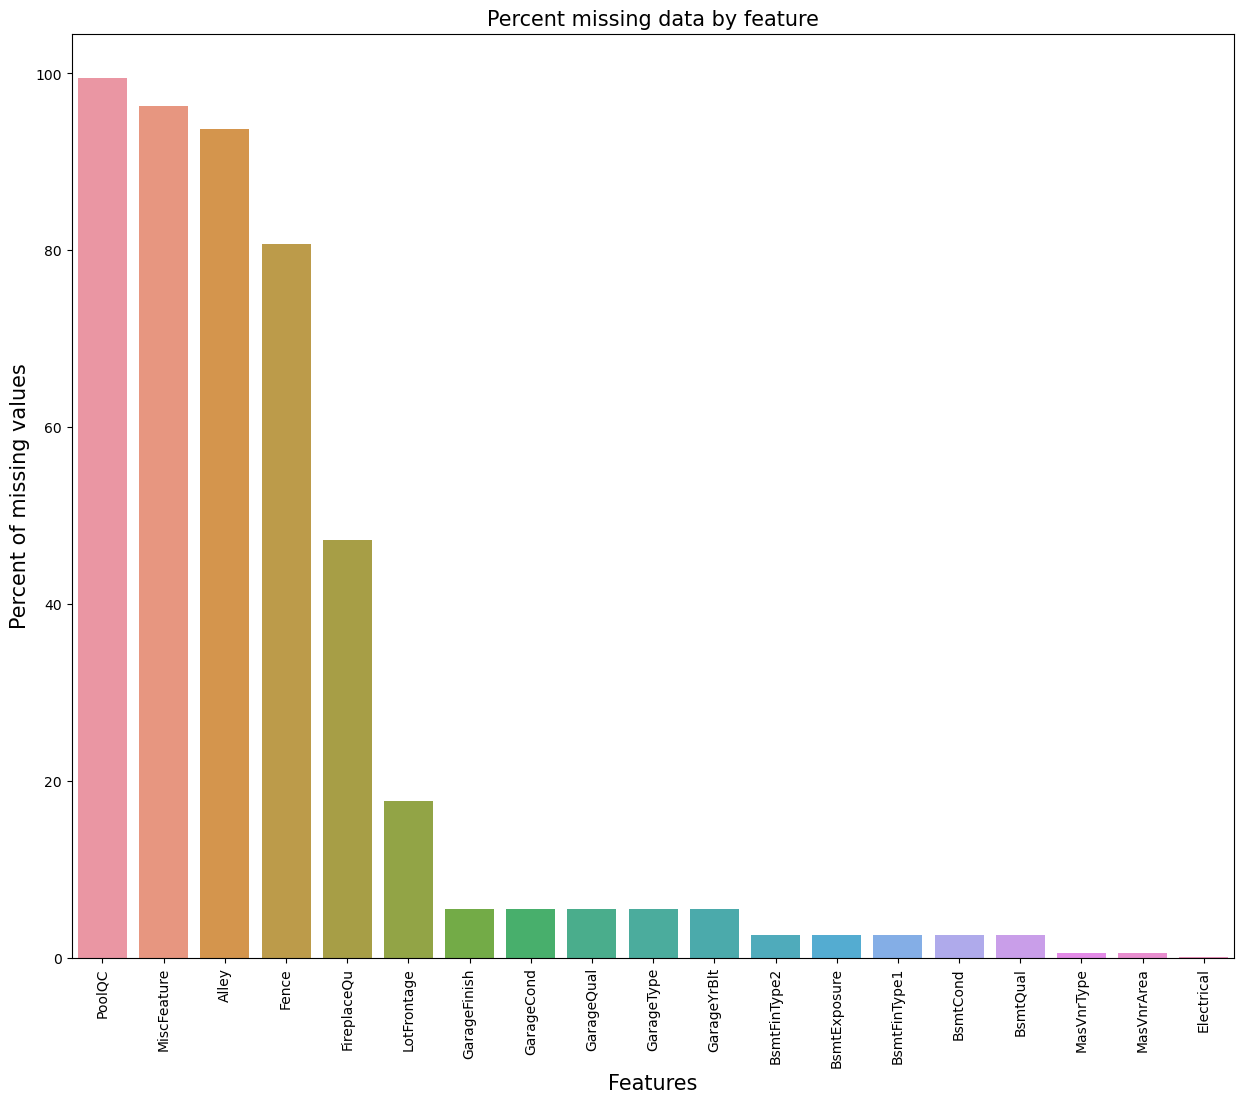

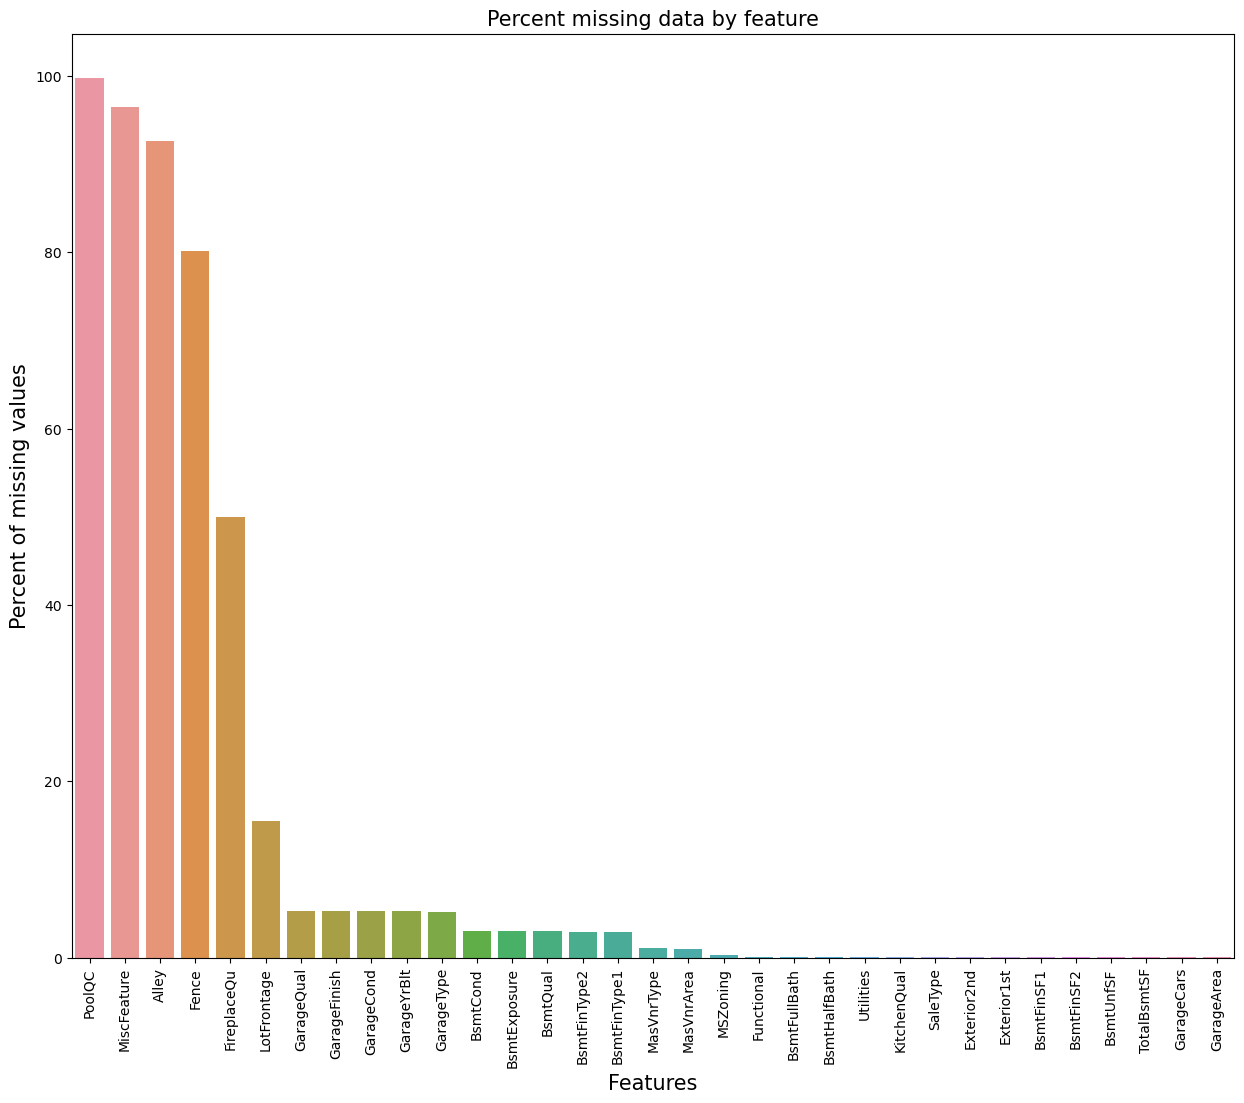

In [1305]:
for data in dataset:
    Percentage_Missing_Values(data)

#### APPLYING KNN IMPUTER ON DATASET

In [1306]:
imputer = KNNImputer(n_neighbors=2)

data_train = pd.DataFrame(imputer.fit_transform(data_train_float), columns= data_train_float.columns)
data_test = pd.DataFrame(imputer.fit_transform(data_test_float), columns= data_test_float.columns)

dataset = [data_train, data_test]

#### 2ND CHECK FOR MISSING VALUES IN DATASET

In [1307]:
for data in dataset:
    Percentage_Missing_Values(data)

No NAs found
No NAs found


#### CORRELATION PLOT OF ALL FEATURES

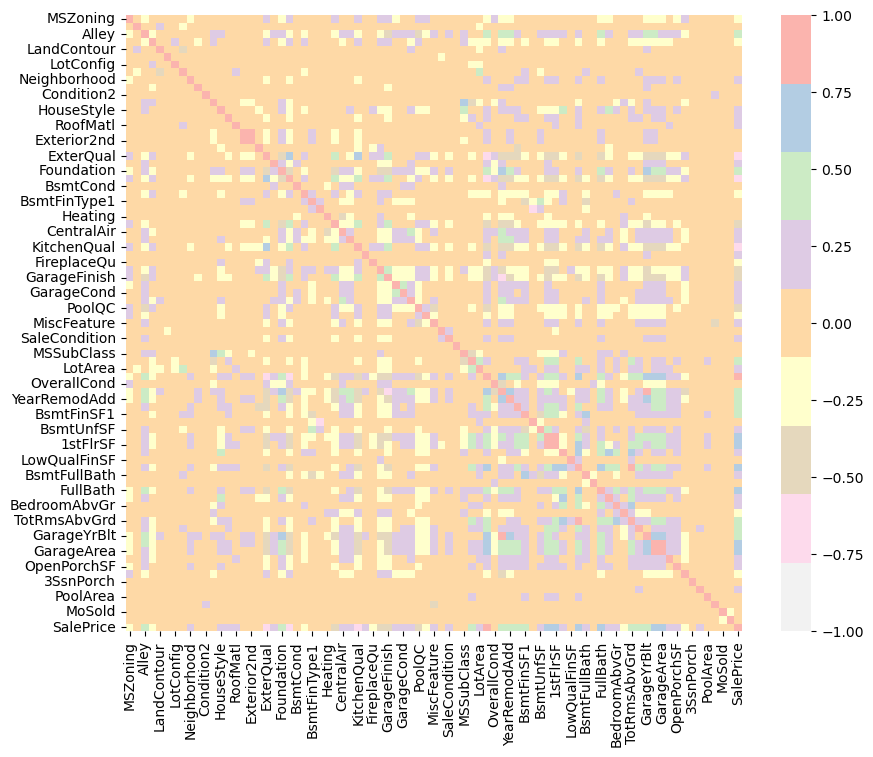

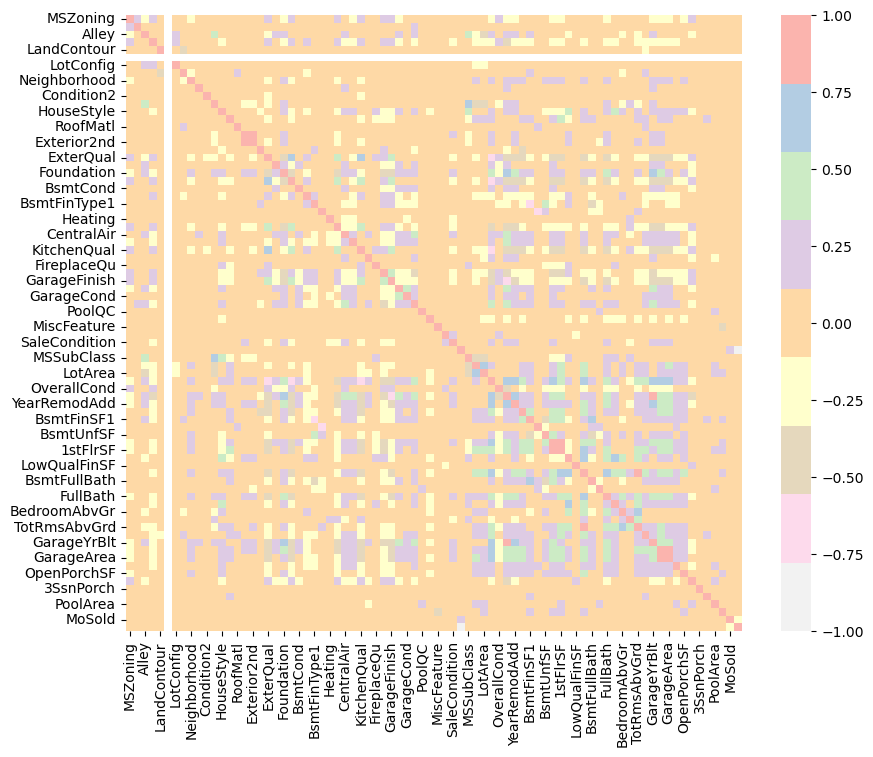

In [1308]:
for data in dataset:
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data.corr(),
                cmap='Pastel1_r',
                #annot= True,
                #fmt='.1g',
                vmin=-1.0,
                vmax=1.0,
                square=True,
                ax=ax)

#### CHECKING SKEWNESS OF NUMERICAL DATA AND PERFORMING BOX-COX TRANSFORMATION FOR MOST-SKEWED DATA

In [1309]:
original_numerical_features_train = original_data_train.dtypes[original_data_train.dtypes != 'object'].index
original_numerical_features_test = original_data_test.dtypes[original_data_test.dtypes != 'object'].index

skewed_feats1_train = data_train[original_numerical_features_train].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_feats1_test = data_test[original_numerical_features_test].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_treshold = 0.75

skewed_feats2_train = skewed_feats1_train[abs(skewed_feats1_train) > skewness_treshold].index
skewed_feats2_test = skewed_feats1_test[abs(skewed_feats1_test) > skewness_treshold].index

lam = 0.15

box_cox_transform_train = boxcox1p(data_train[skewed_feats2_train], lam)
box_cox_transform_test = boxcox1p(data_test[skewed_feats2_test], lam)

#### DEFINING ISOLATION FOREST MODEL TO CHECK FOR OUTLIERS

In [1310]:
outlier1 = IsolationForest(n_estimators=100, max_samples=256, contamination=0.1)
outlier2 = outlier1.fit_predict(box_cox_transform_train.to_numpy())

print("Number of outliers detected: {}".format(-outlier2[outlier2 < 0].sum()))
print("Number of normal samples detected: {}".format(outlier2[outlier2 > 0].sum()))

Number of outliers detected: 146
Number of normal samples detected: 1314


#### CREATING DATAFRAME WITH OUTLIERS

In [1311]:
outlier = pd.DataFrame(outlier2)

#### JOINING OUTLIERS COLUMN WITH DATA_TRAIN DATAFRAME

In [1312]:
data_train = pd.concat([data_train, outlier.rename(columns={outlier.columns[0]: 'Outlier'})], axis=1)

#### RE-DEFINING DATASET

In [1313]:
dataset = [data_train, data_test]

#### DELETING ID COLUMN FROM DATASET

In [1314]:
for data in dataset:
    del data['Id']

#### DEFINING PIECE OF DATA BEFORE BOX-COX TRANSFORMATION FOR PLOTTING PURPOSES

In [1315]:
data_train_before_box_cox = data_train[skewed_feats2_train]
data_test_before_box_cox = data_test[skewed_feats2_test]

#### DELETING PIECE OF DATA WHICH HAS BEEN BOX-COX TRANSFORMED

In [1316]:
data_train = data_train.drop(data_train[box_cox_transform_train.columns], axis=1)
data_test = data_test.drop(data_test[box_cox_transform_test.columns], axis=1)

#### JOINING BOX-COX TRANSFEROMED DATA WITH REMAINING DATA_TRAIN AND DATA_TEST DATAFRAMES, RE-DEFINING DATASET

In [1317]:
data_train = pd.concat([box_cox_transform_train, data_train], axis=1)
data_test = pd.concat([box_cox_transform_test, data_test], axis=1)

dataset = [data_train, data_test]

#### FILTERING DATA WHICH HAS BEEN IDENTIFIED AS OUTLIERS

In [1318]:
normal_data = data_train[data_train['Outlier'].values > 0]
outliers = data_train[data_train['Outlier'].values < 0]

#### SCATTER-PLOTTING OUTLIERS AND NORMAL DATA FOR ALL FEATURES IN RELATION TO SALE_PRICE FEATURE

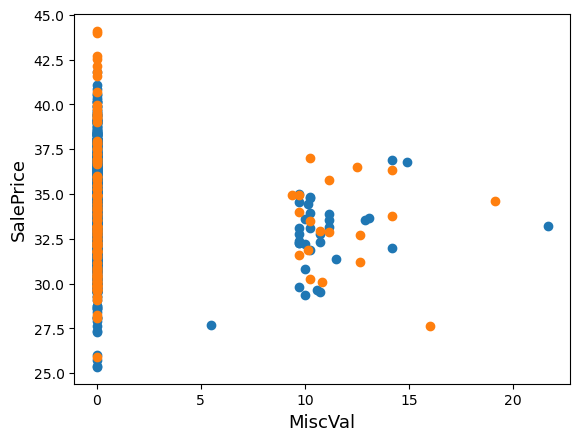

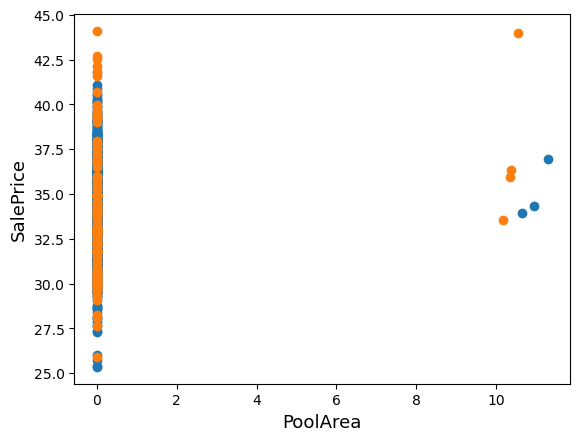

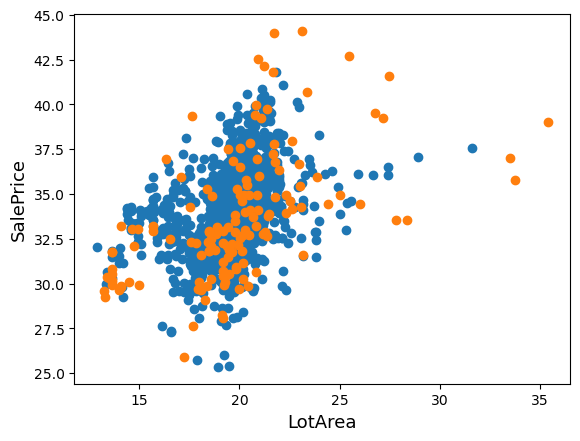

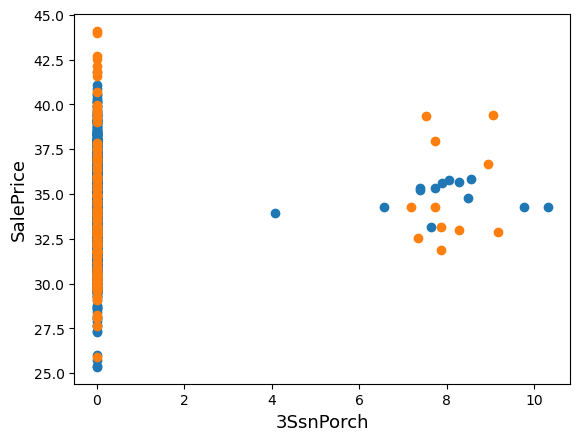

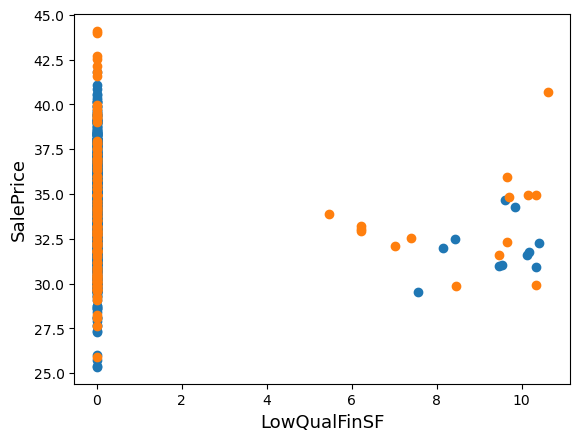

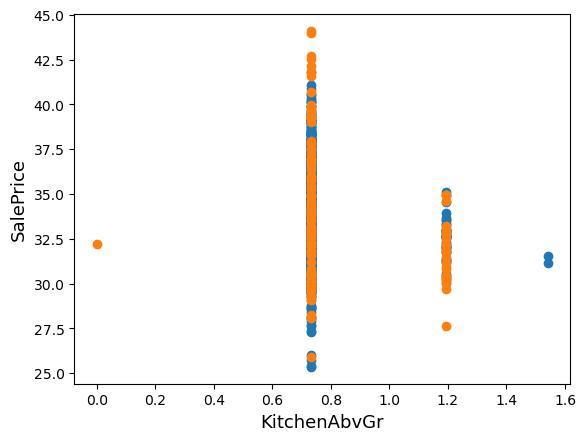

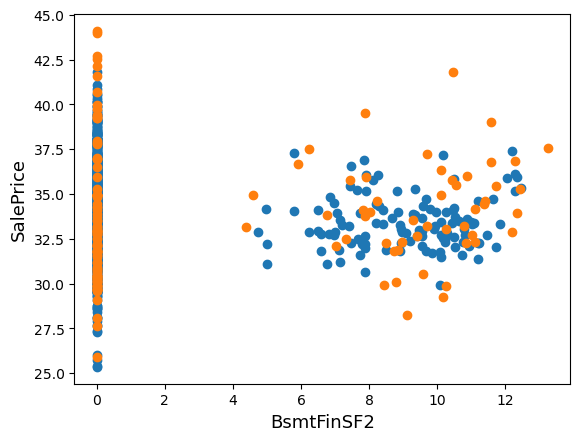

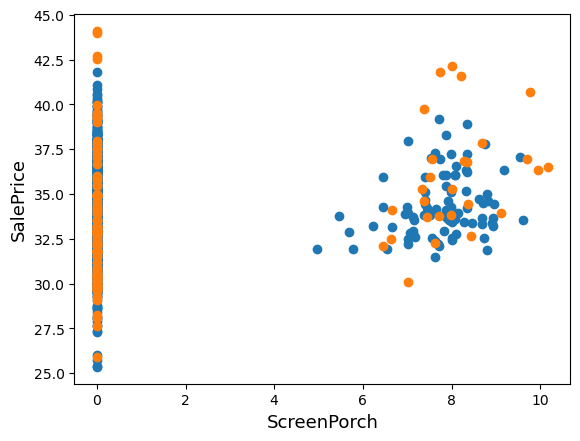

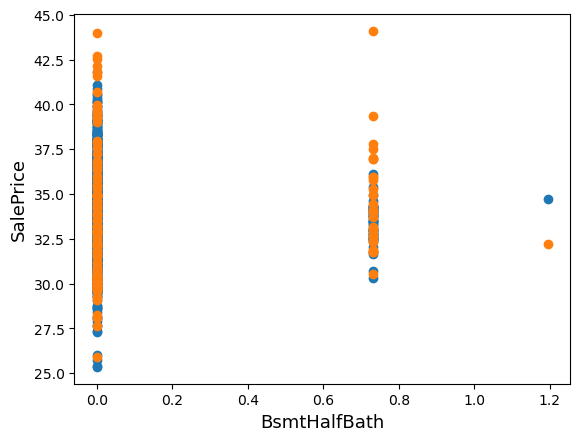

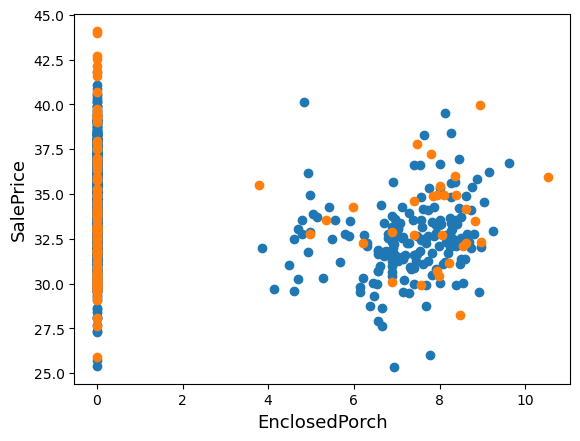

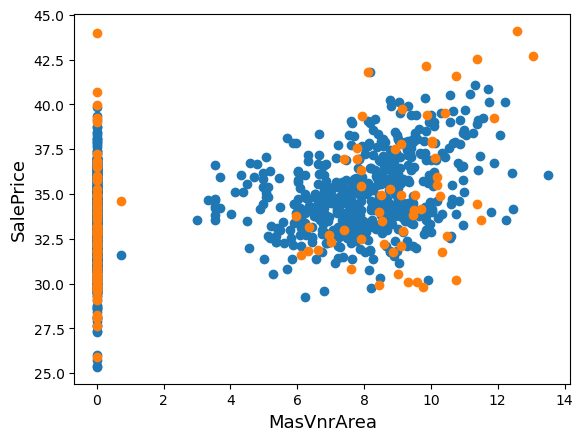

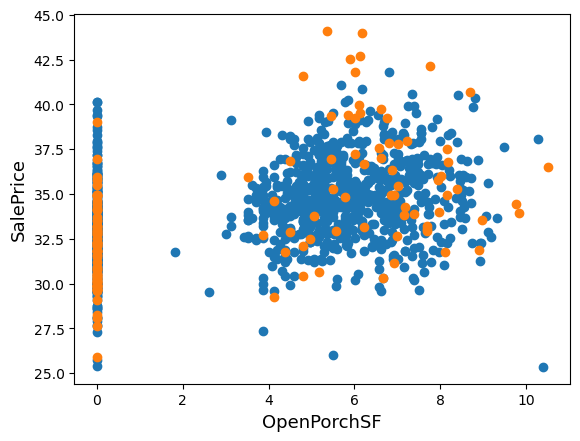

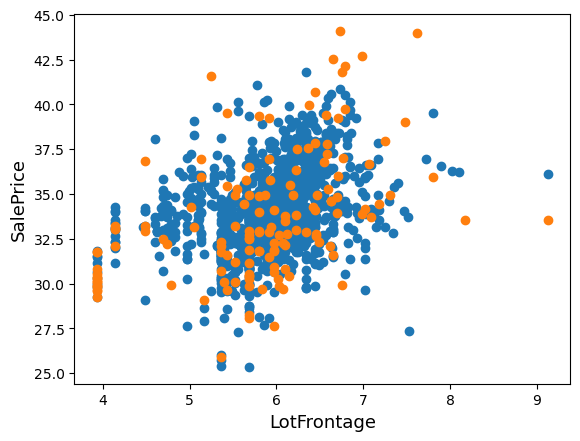

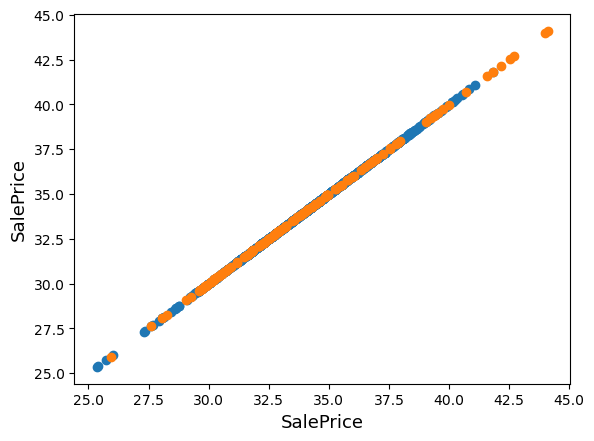

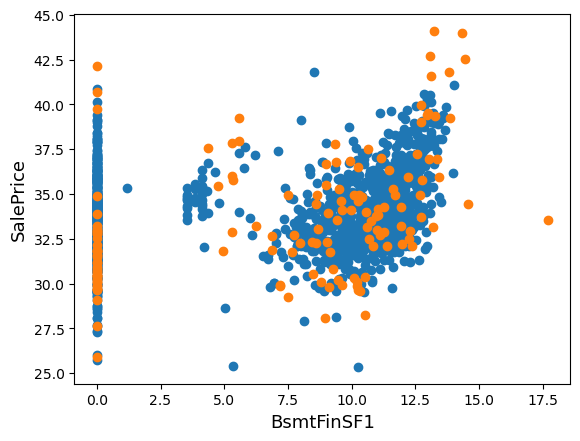

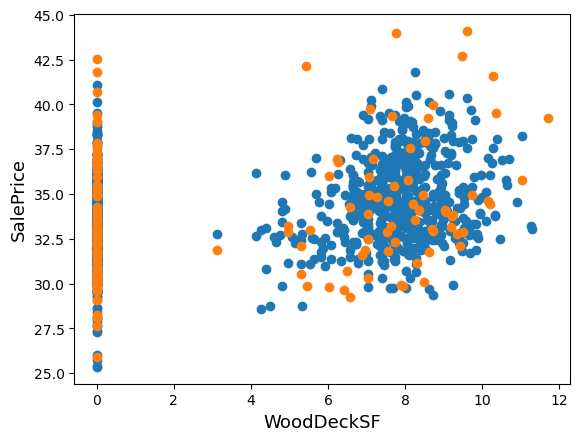

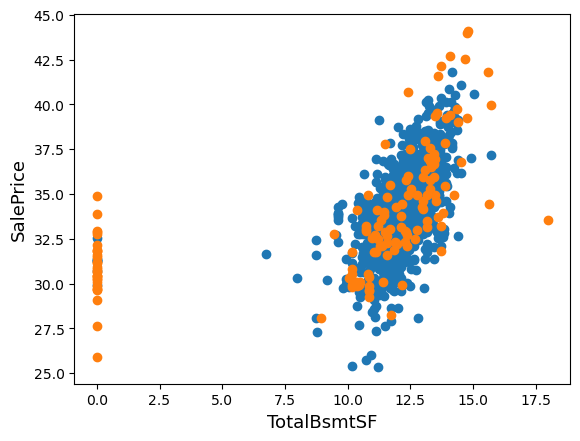

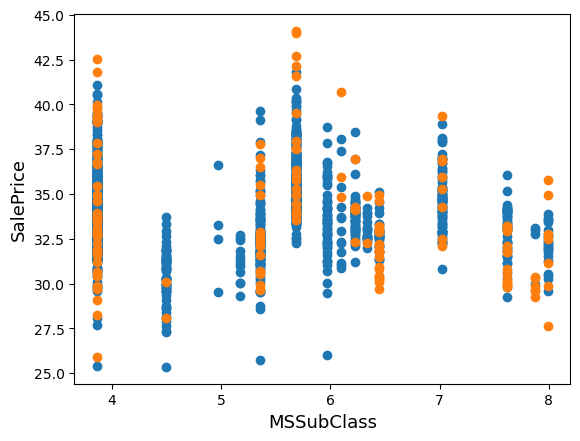

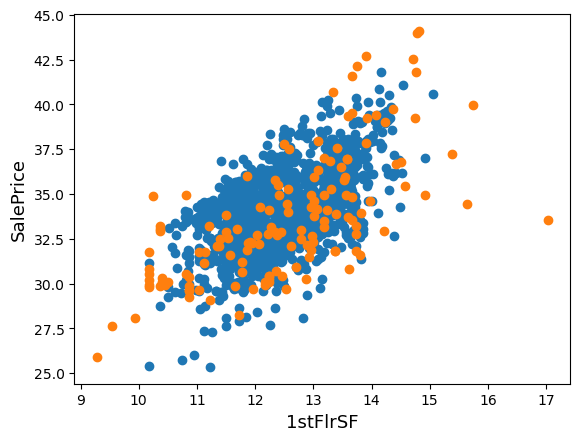

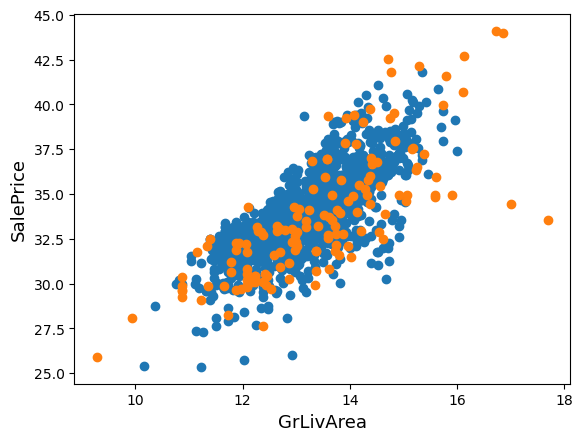

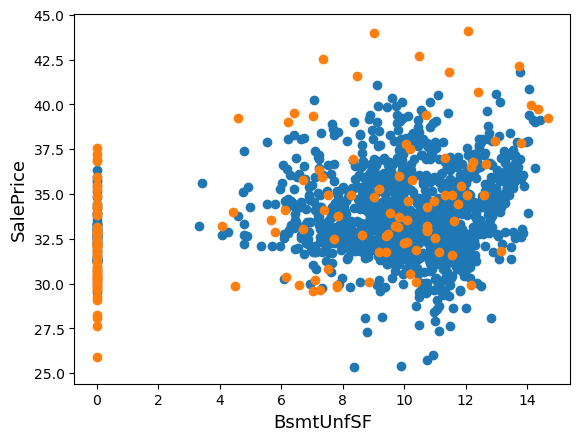

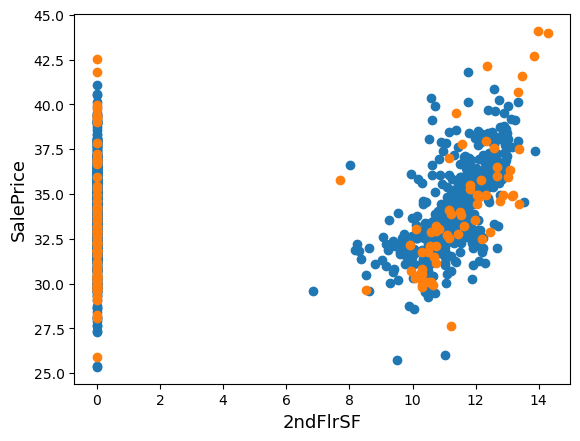

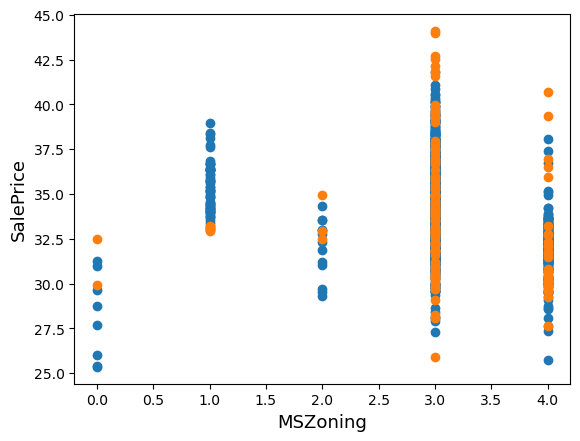

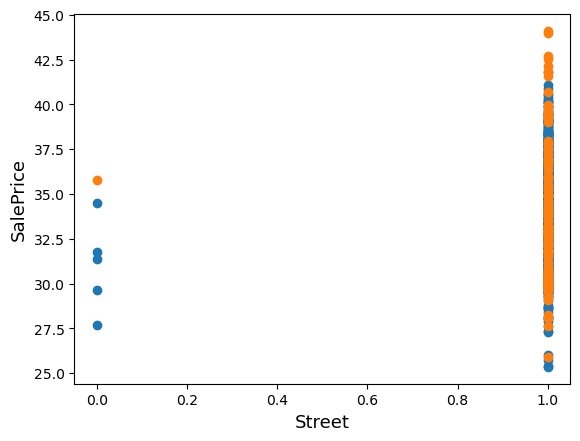

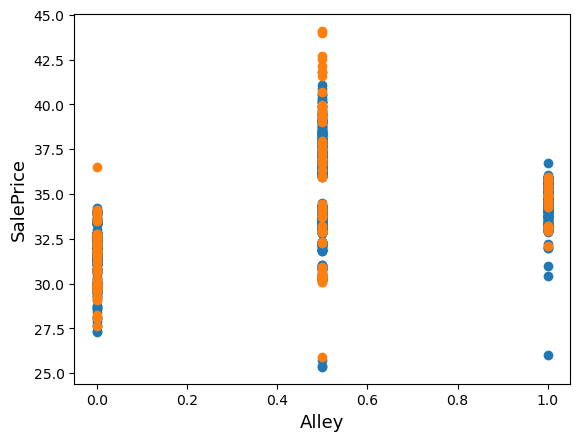

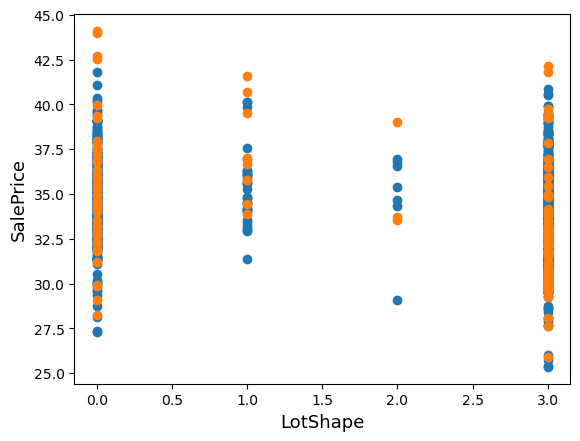

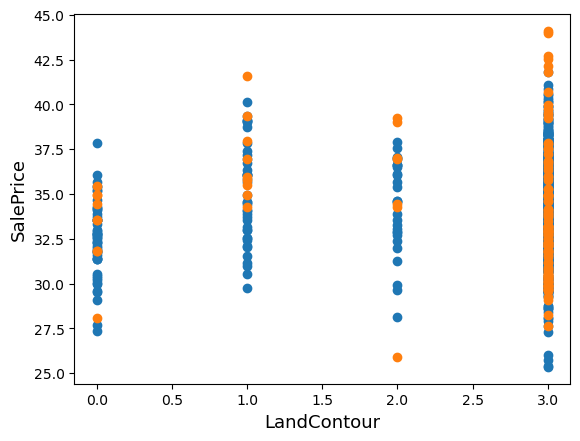

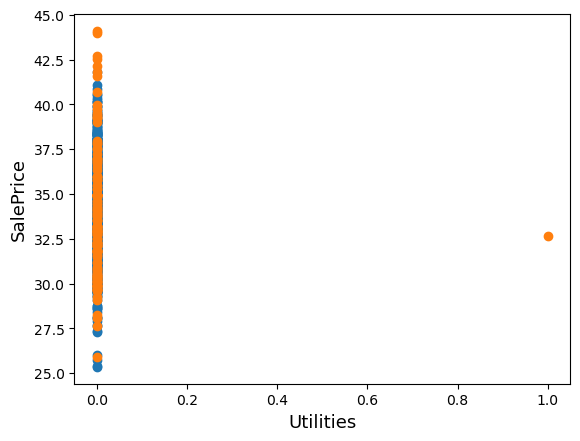

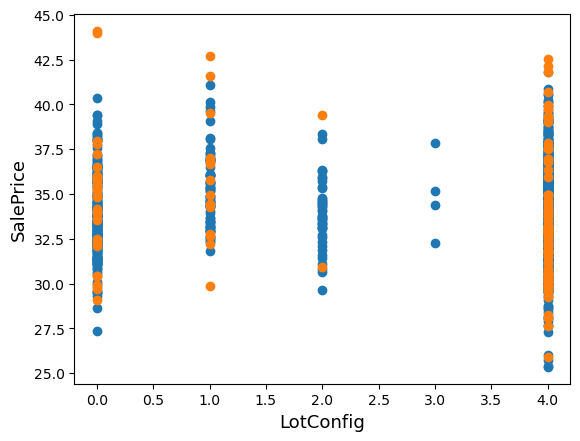

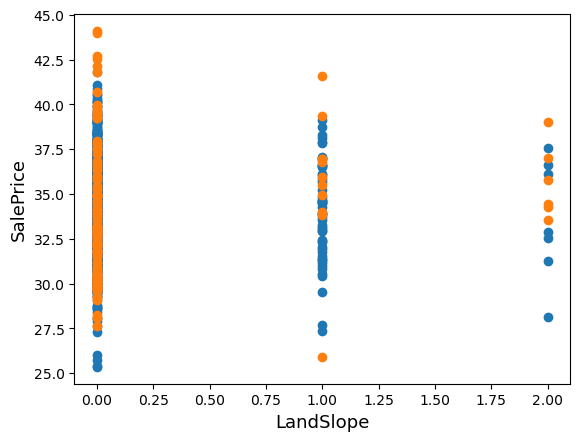

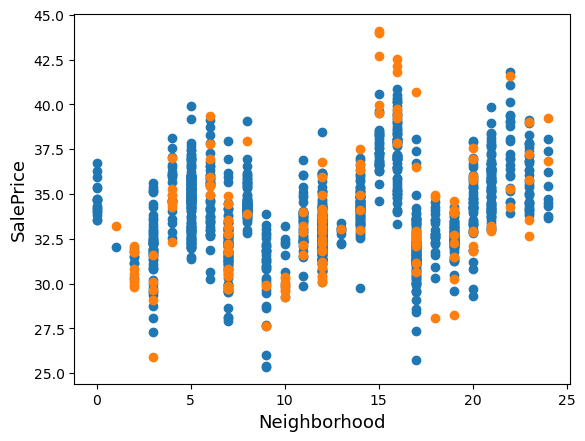

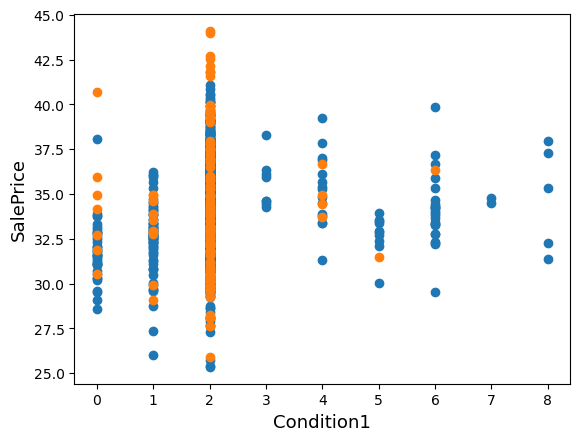

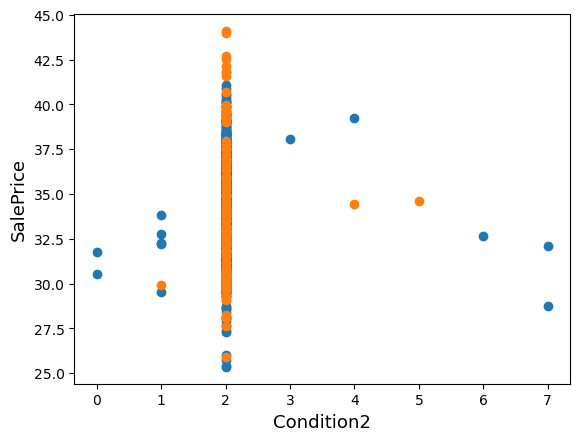

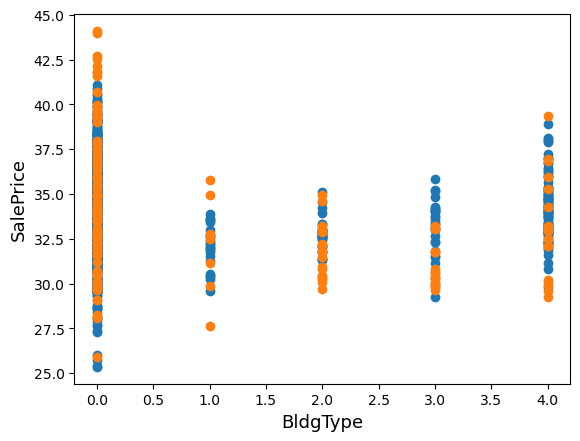

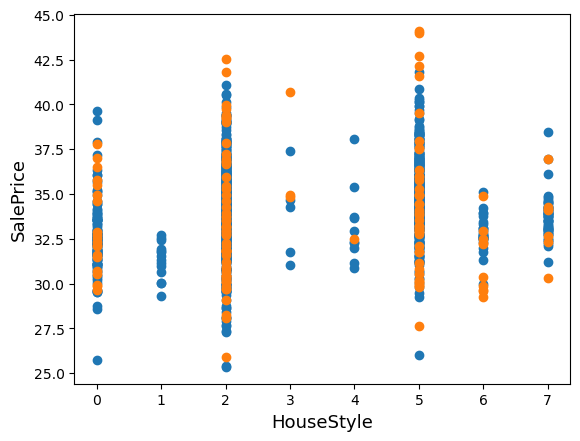

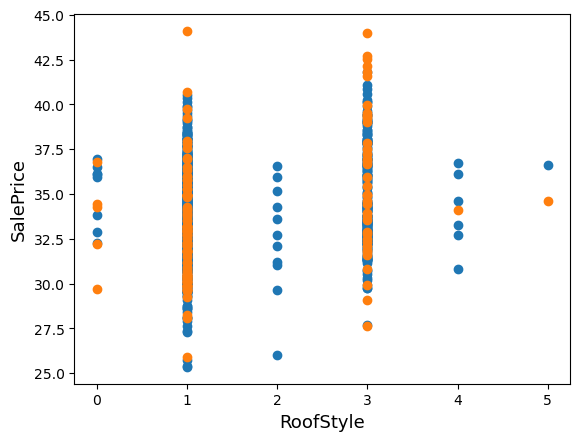

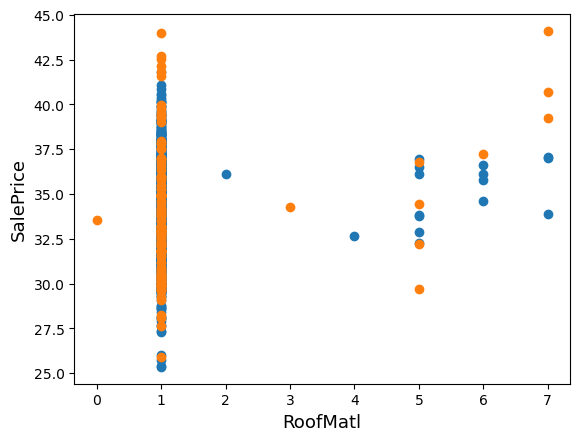

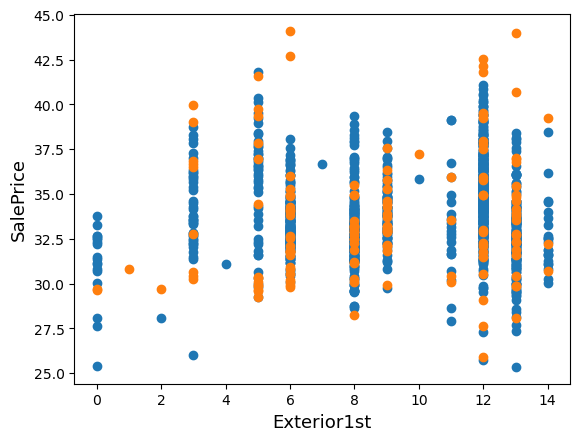

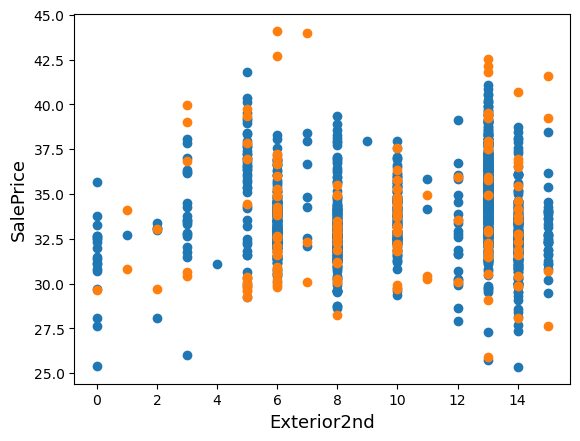

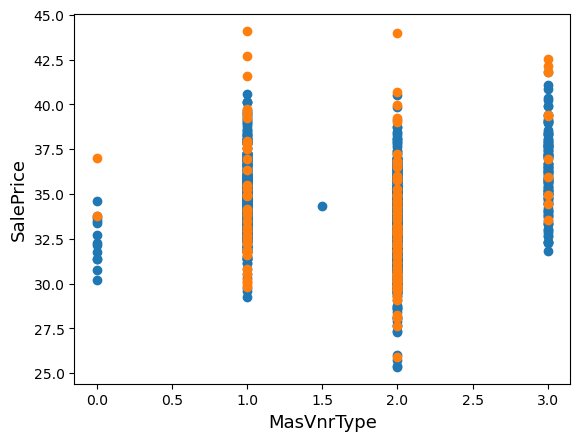

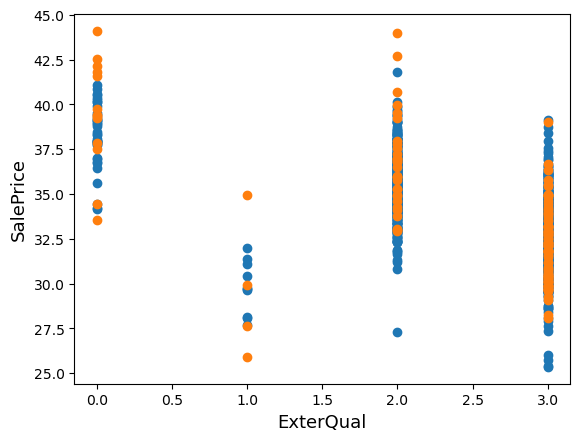

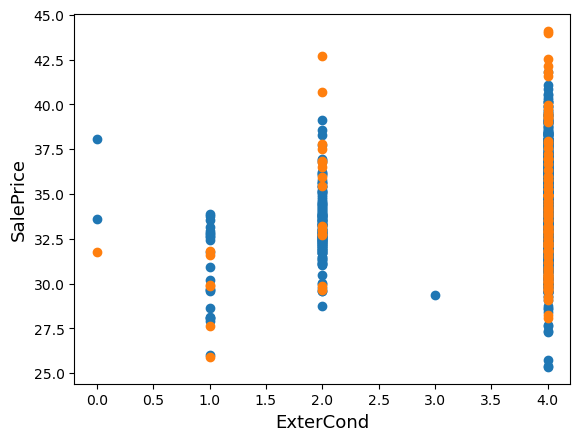

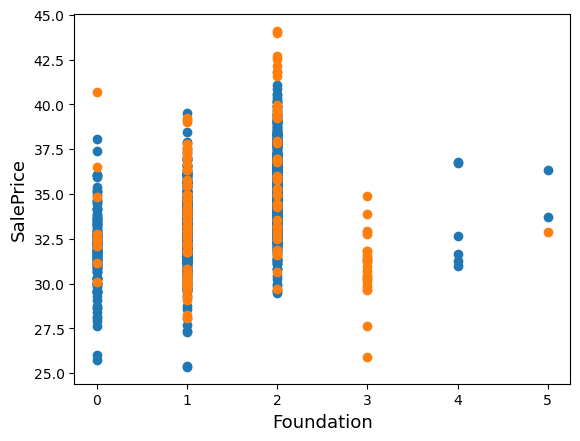

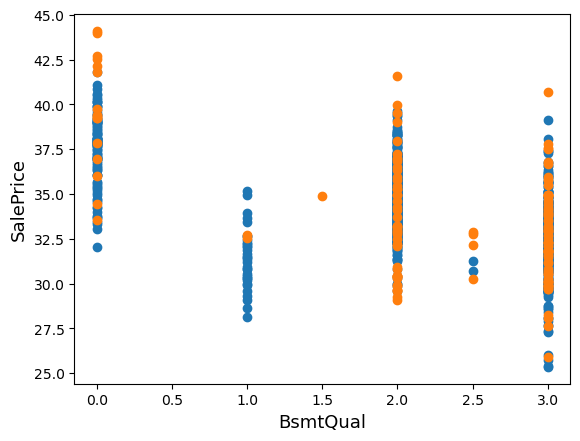

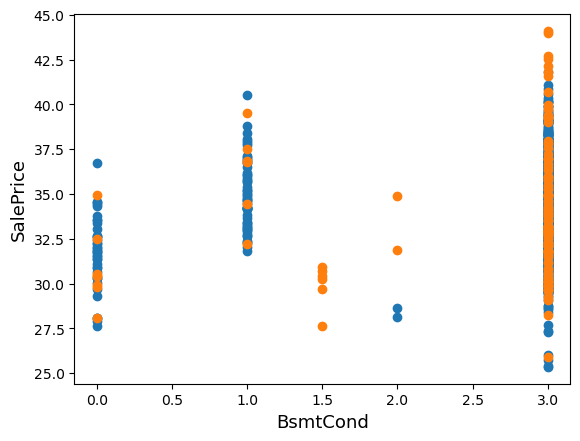

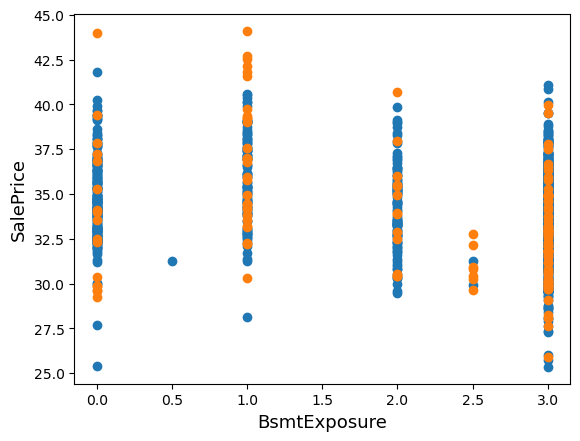

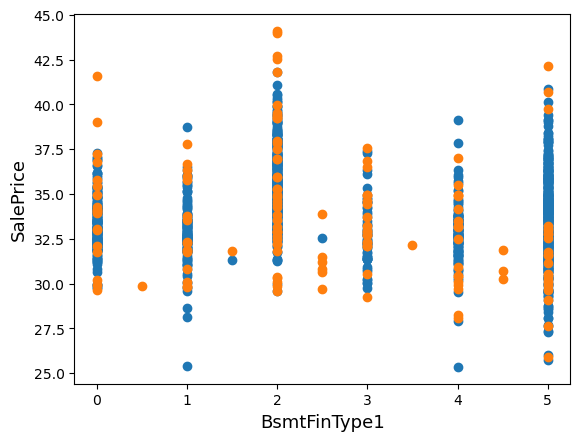

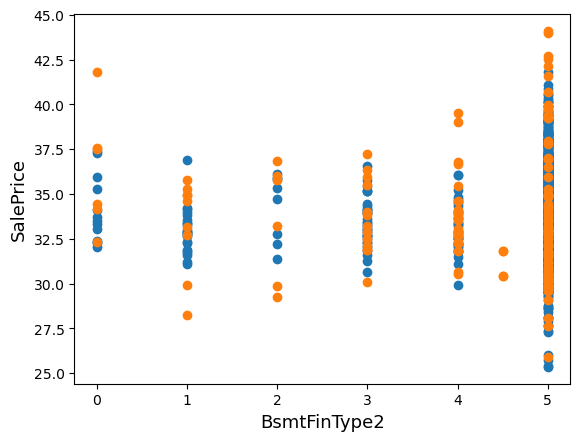

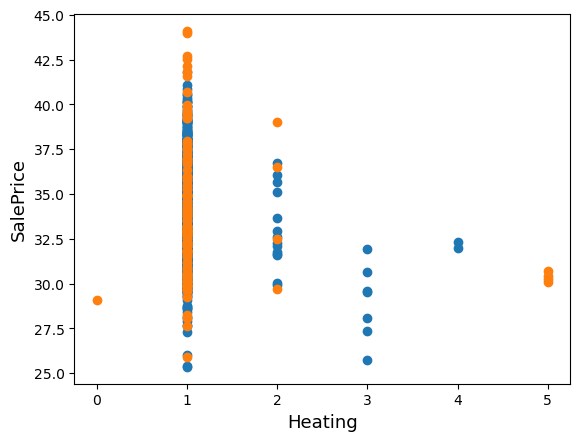

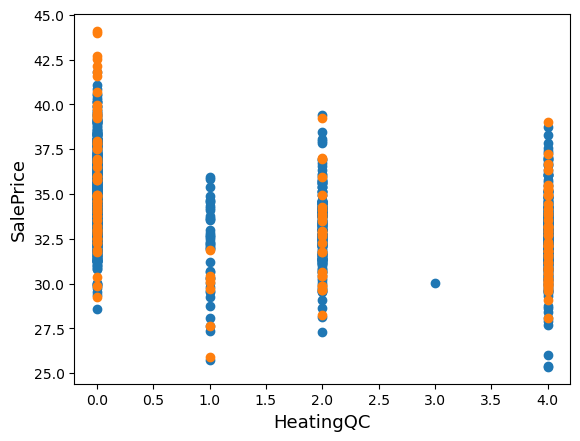

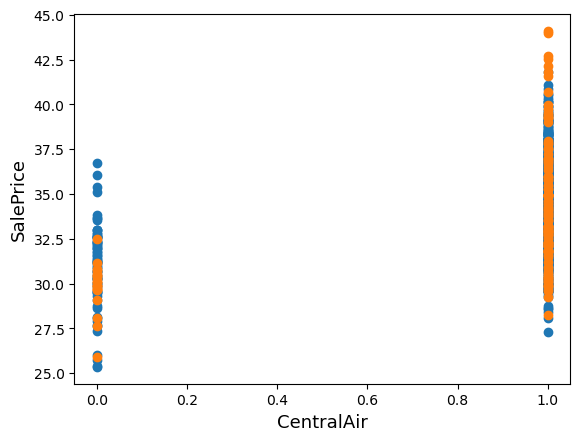

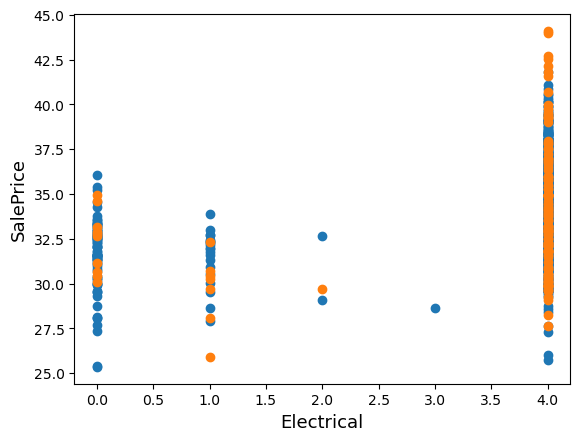

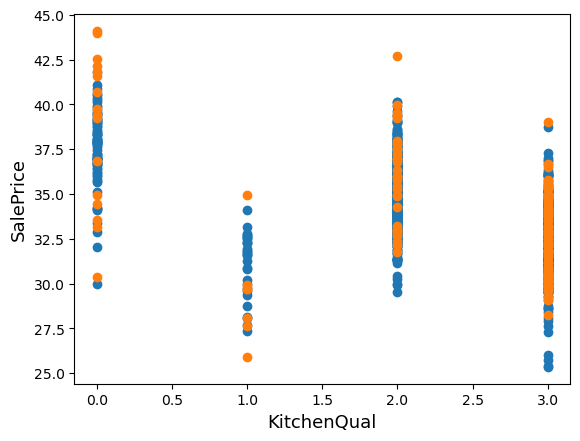

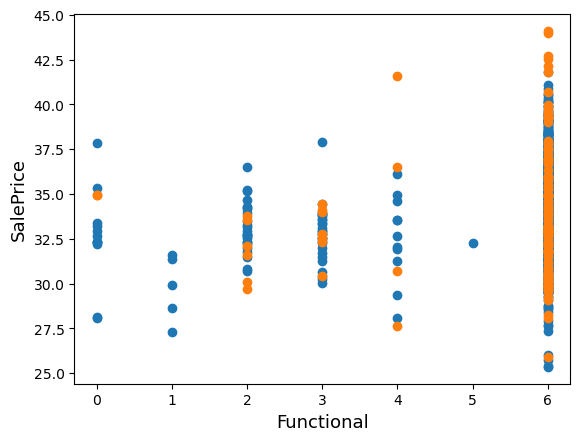

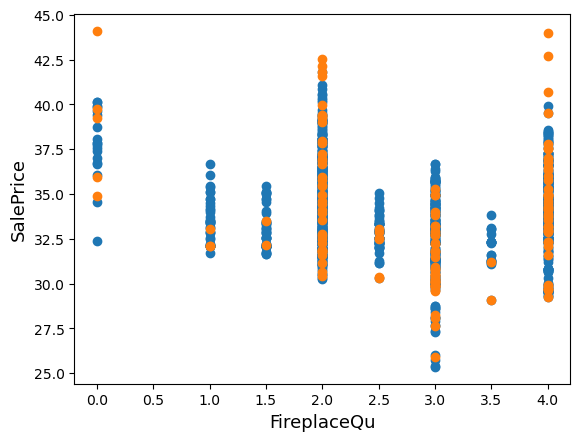

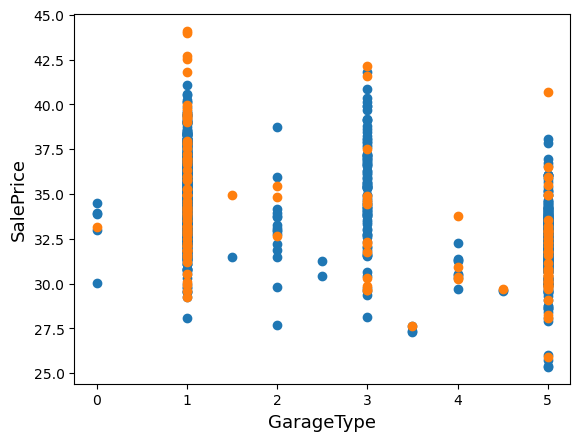

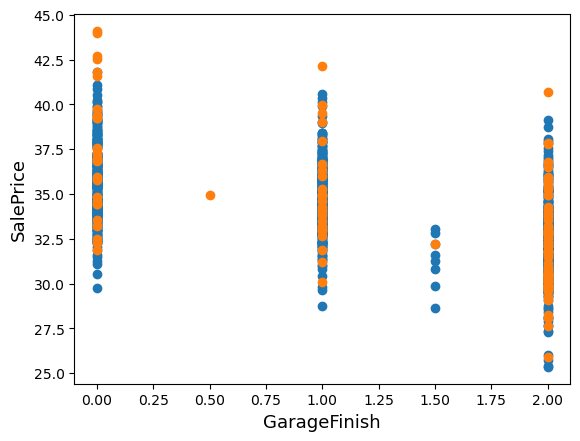

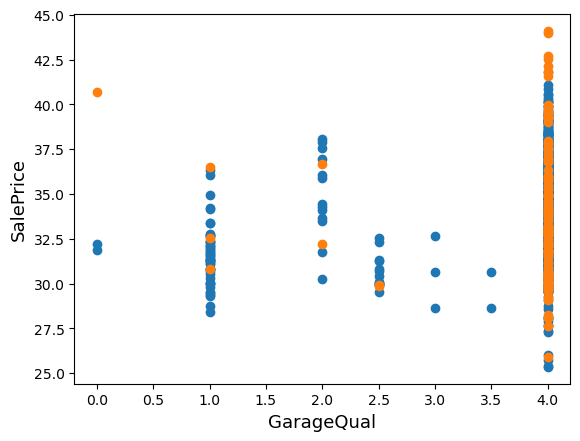

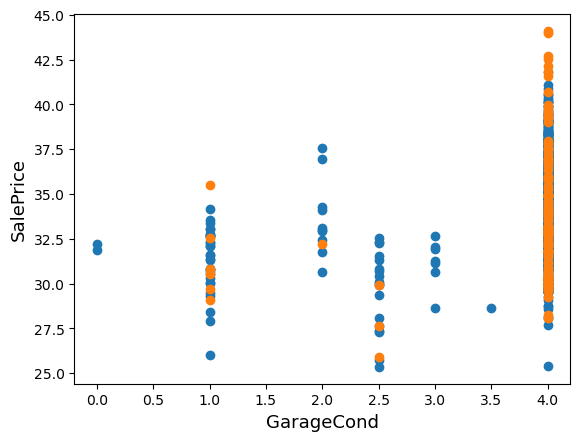

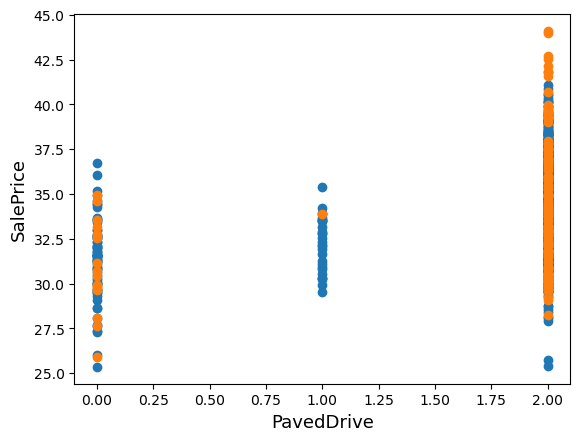

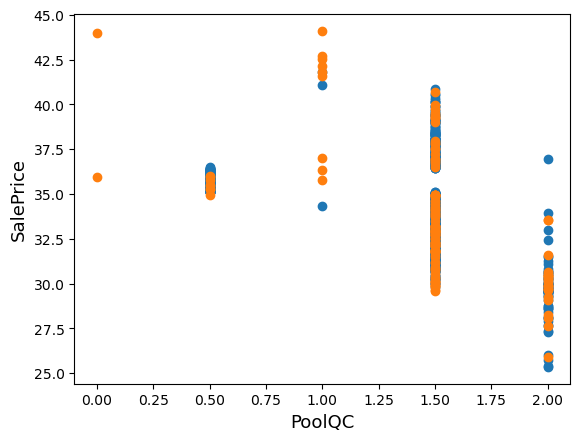

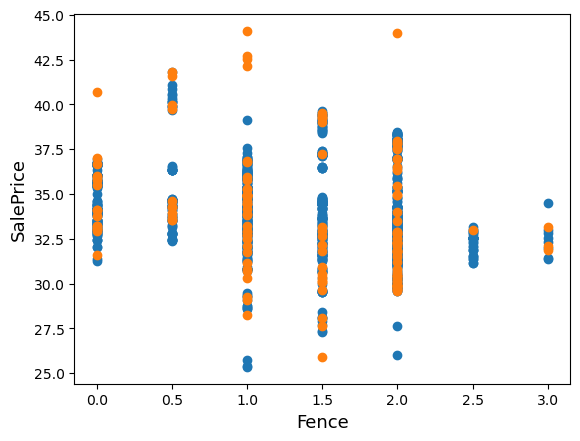

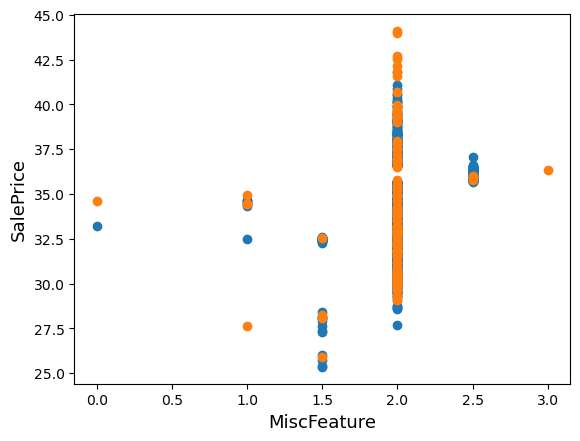

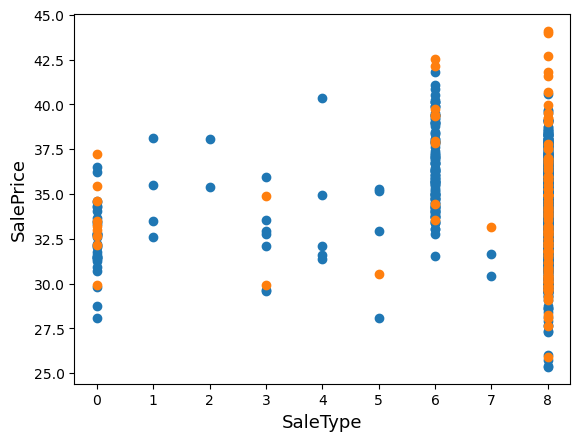

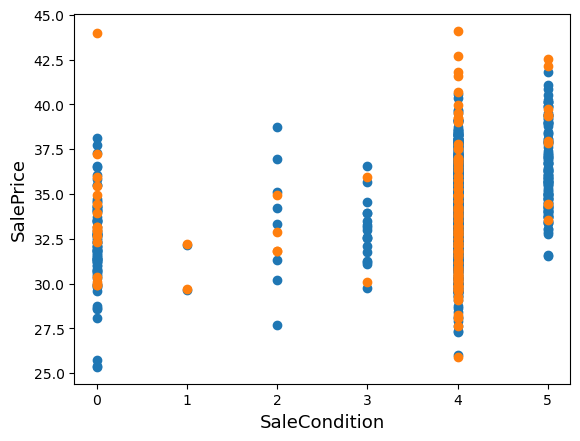

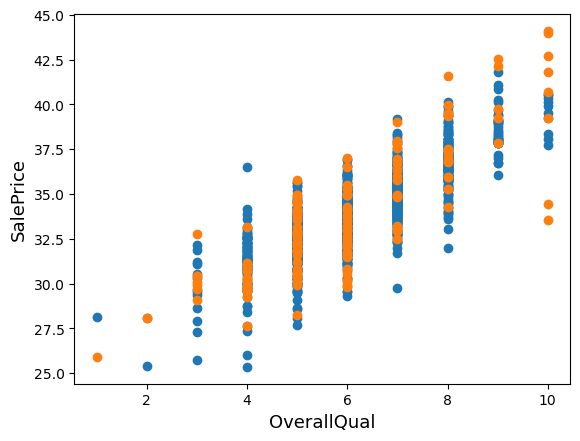

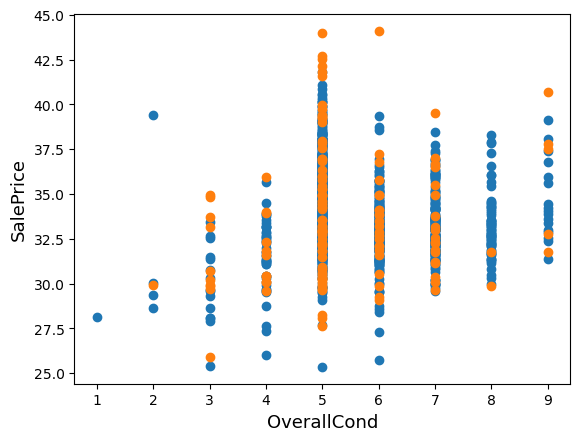

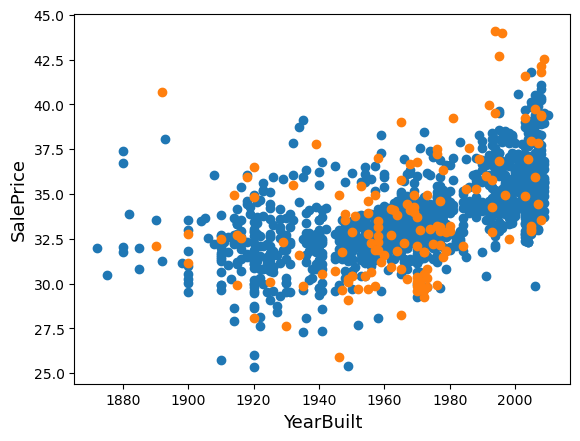

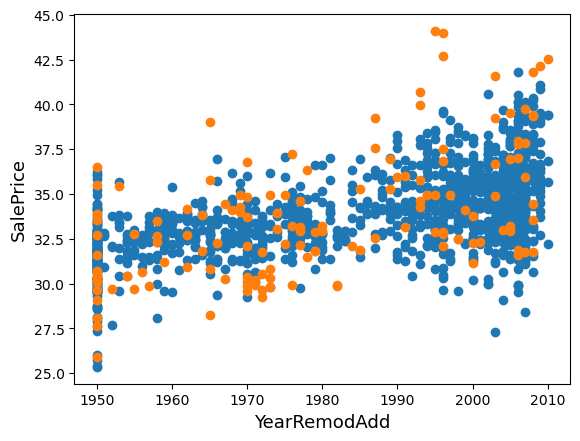

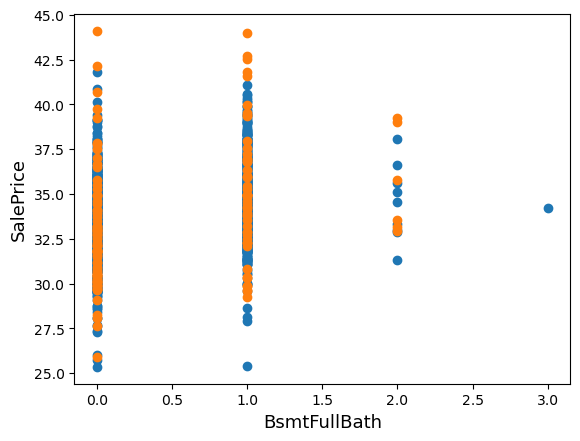

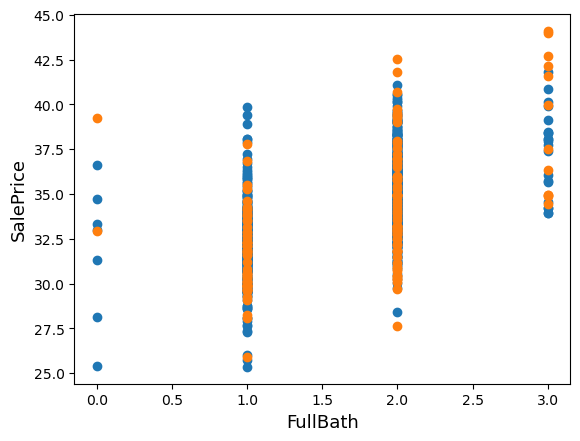

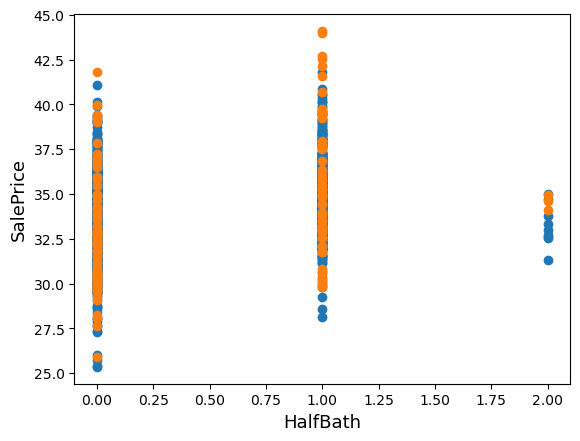

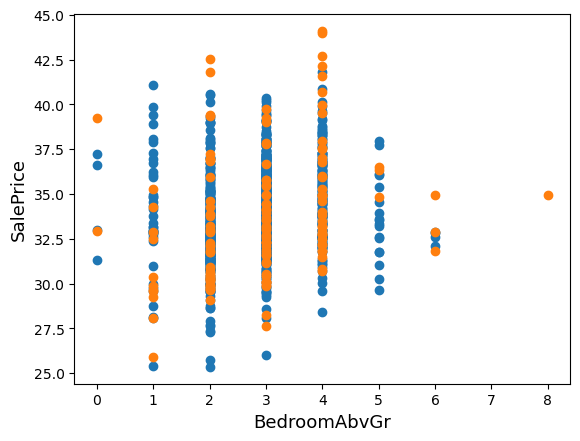

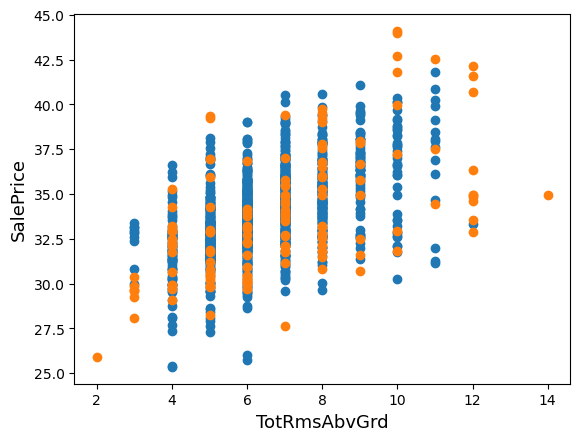

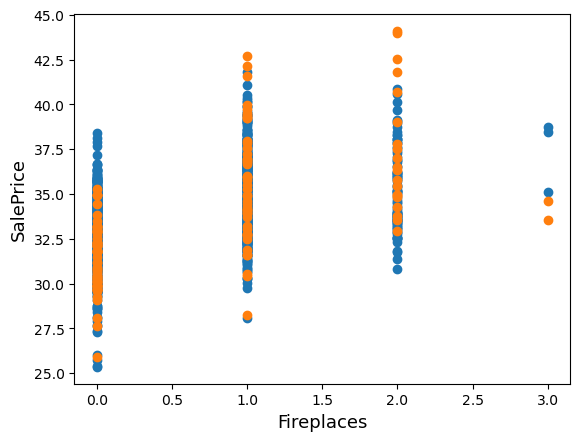

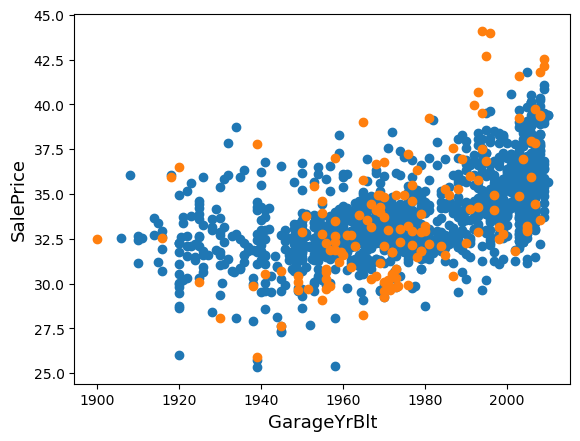

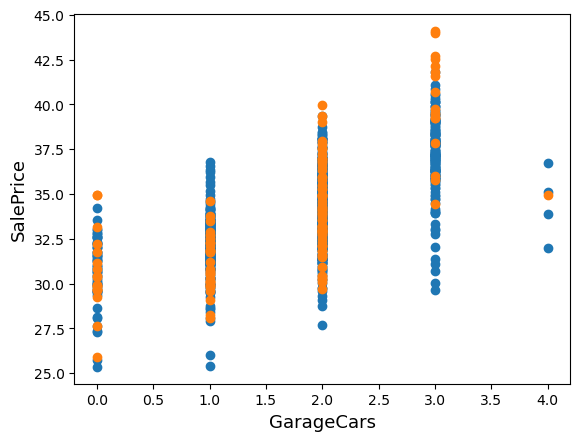

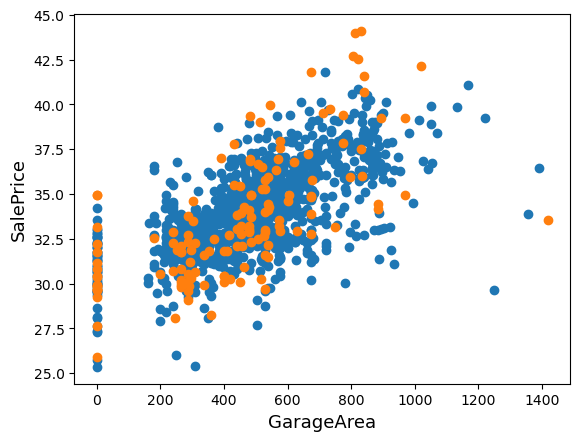

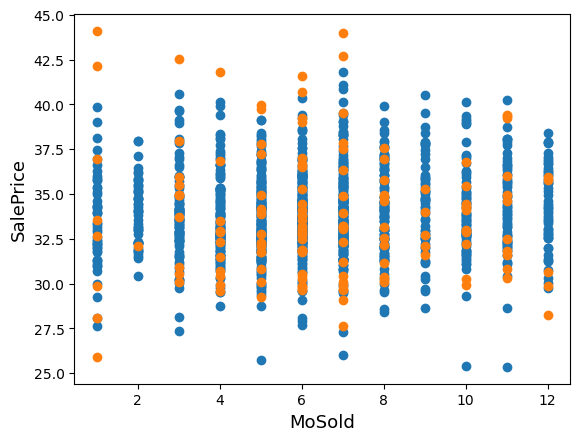

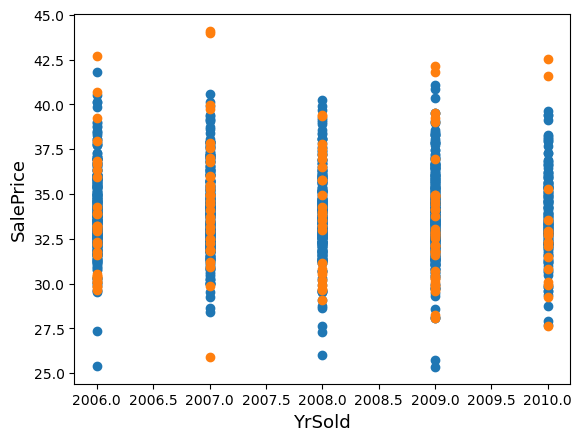

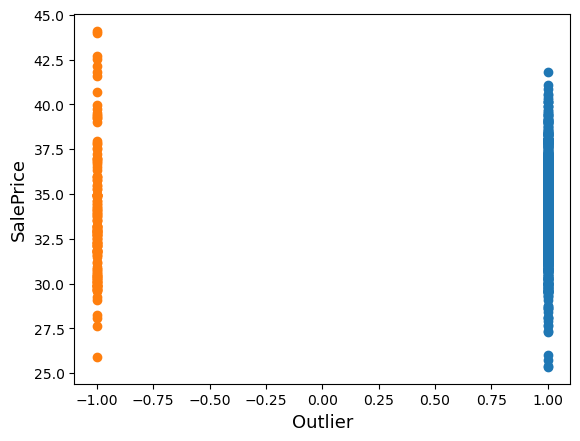

In [1319]:
for i, col in enumerate(data_train.columns):
    plt.figure(i)
    plt.scatter(normal_data[col], normal_data['SalePrice'])
    plt.scatter(outliers[col], outliers['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel('{}'.format(data_train.columns[i]), fontsize=13)
    plt.show()

#### PLOTTING DISTRIBUTION OF FEATURES AND QQ GRAPH BEFORE AND AFTER BOX-COX TRANSFORMATION FOR TRAINING DATA WITH REMOVED OUTLIERS

<Figure size 640x480 with 0 Axes>

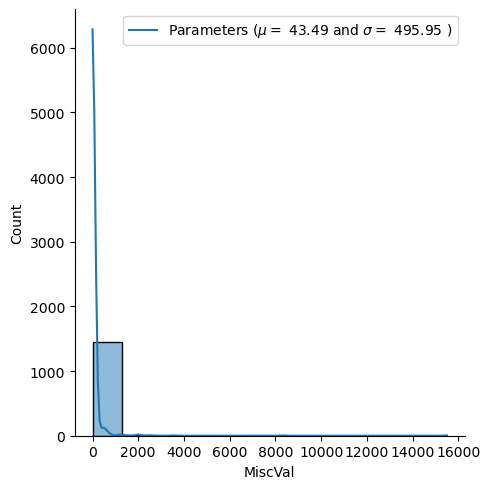

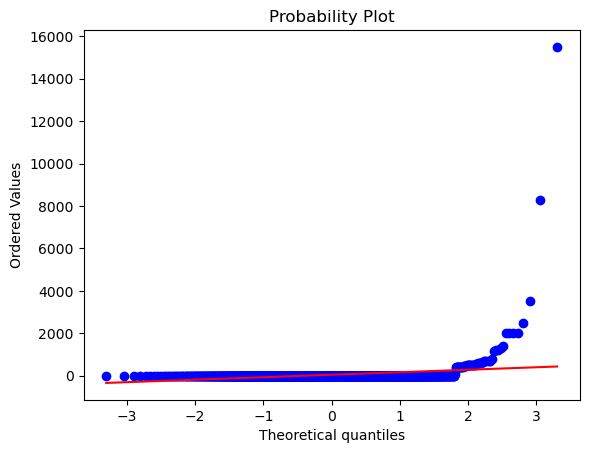

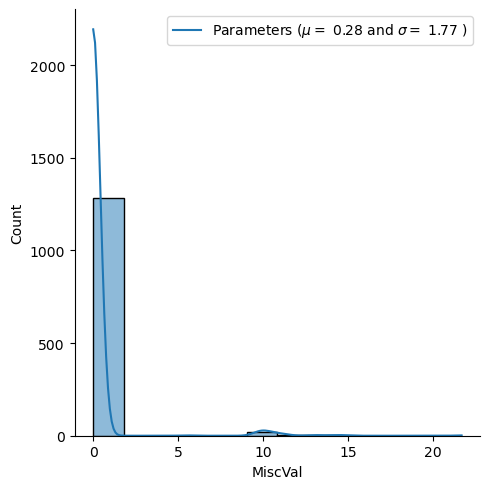

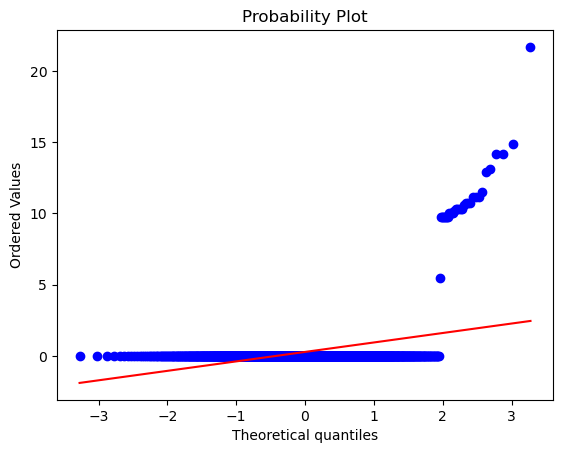

<Figure size 640x480 with 0 Axes>

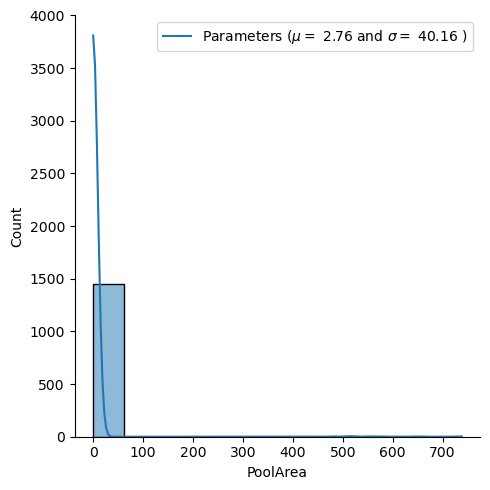

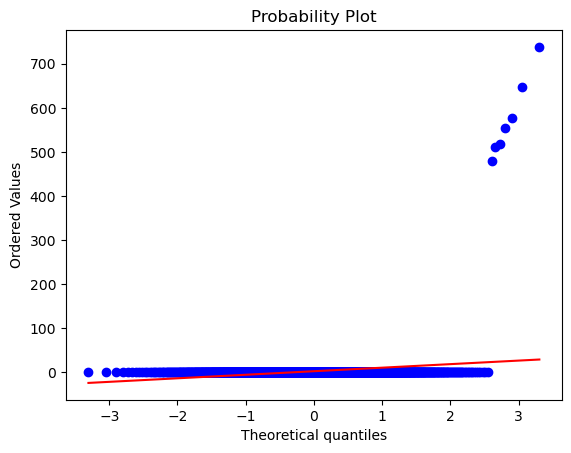

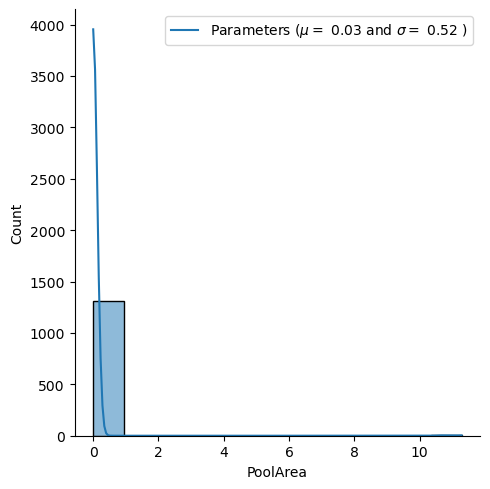

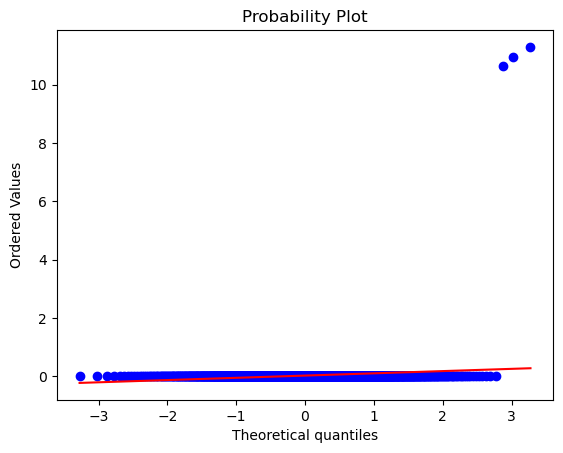

<Figure size 640x480 with 0 Axes>

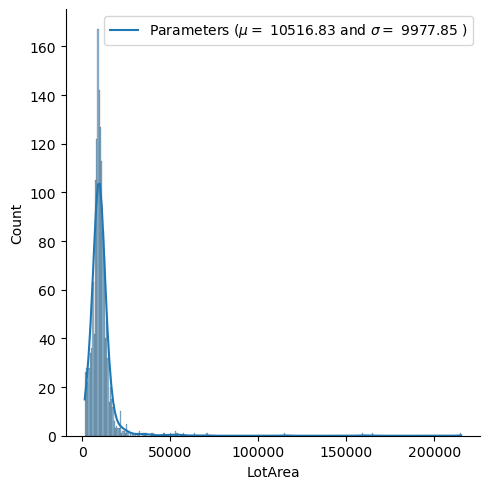

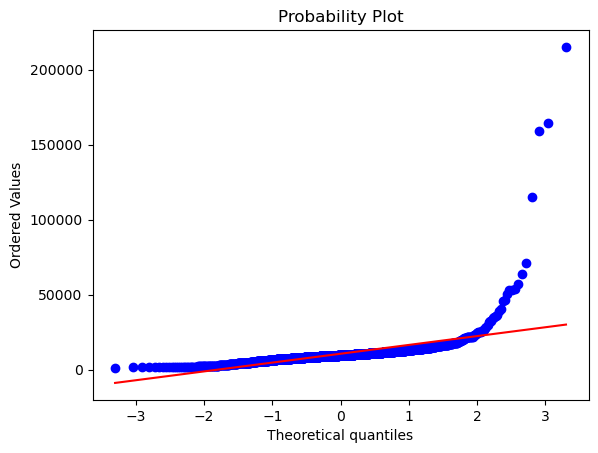

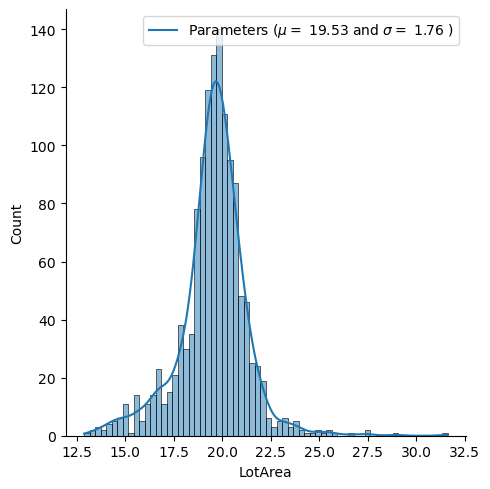

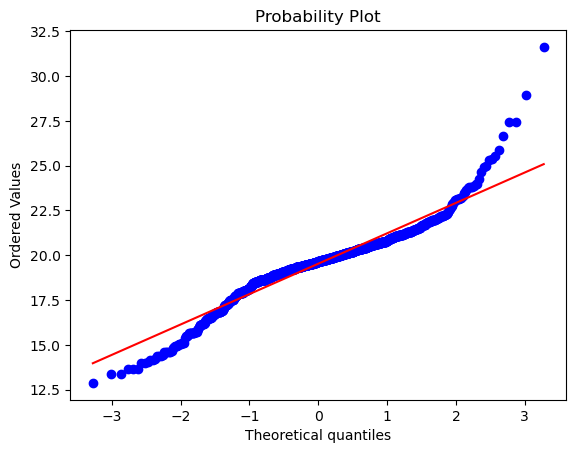

<Figure size 640x480 with 0 Axes>

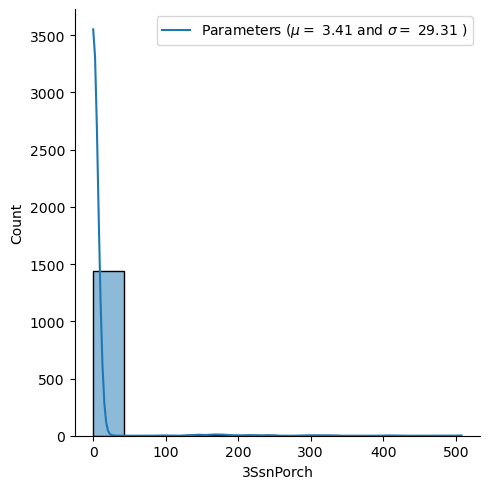

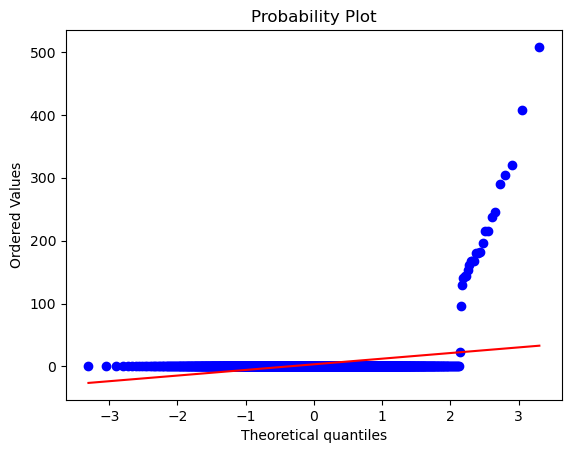

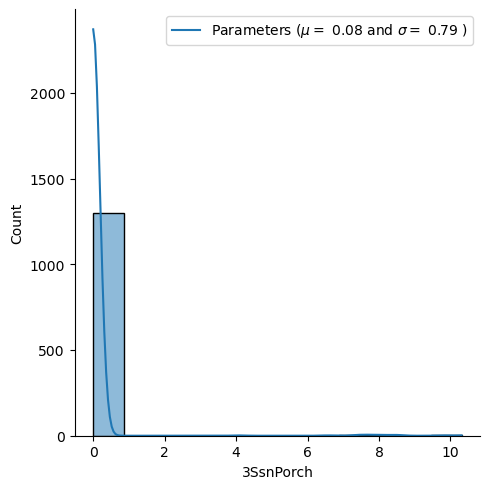

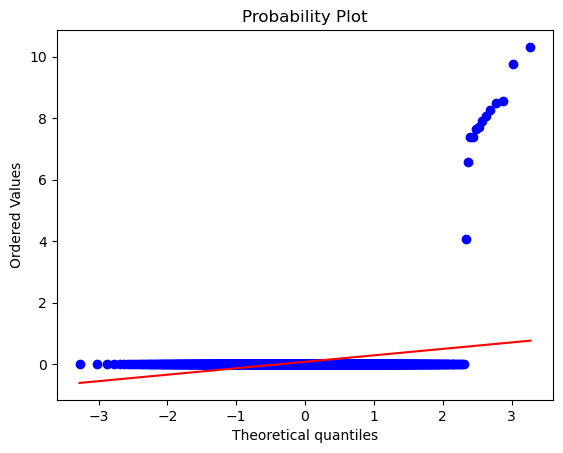

<Figure size 640x480 with 0 Axes>

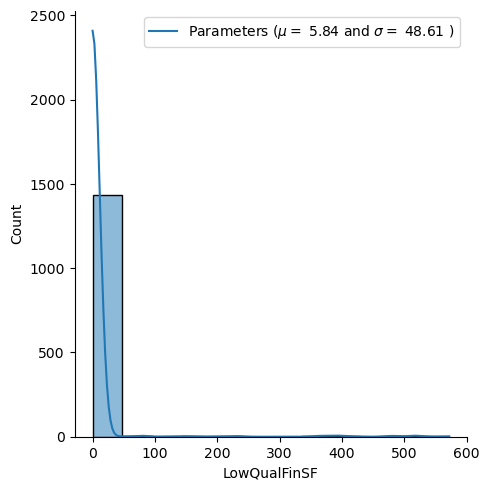

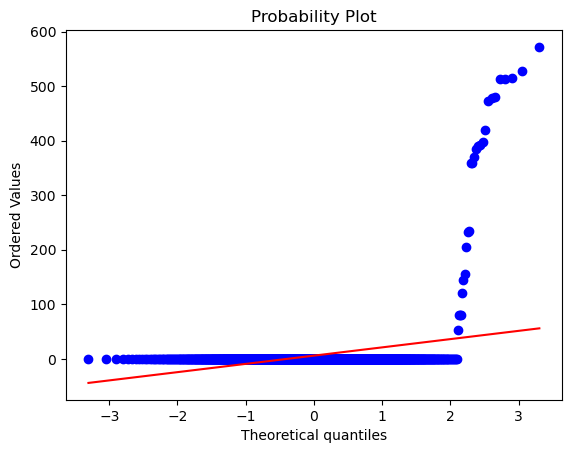

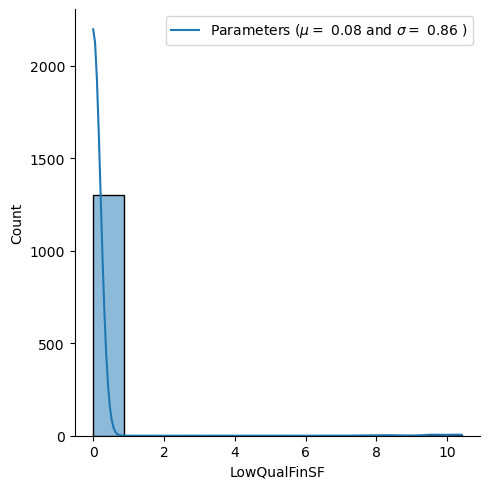

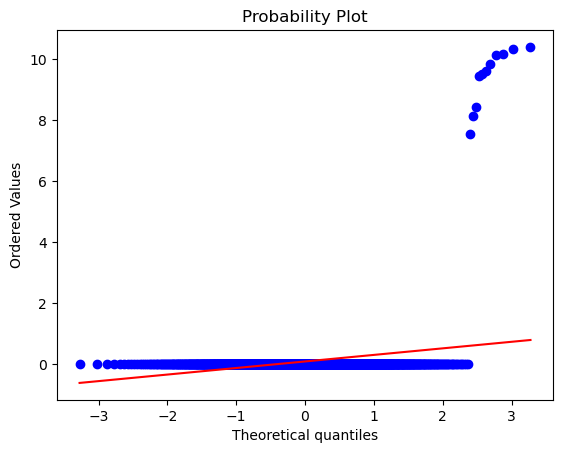

<Figure size 640x480 with 0 Axes>

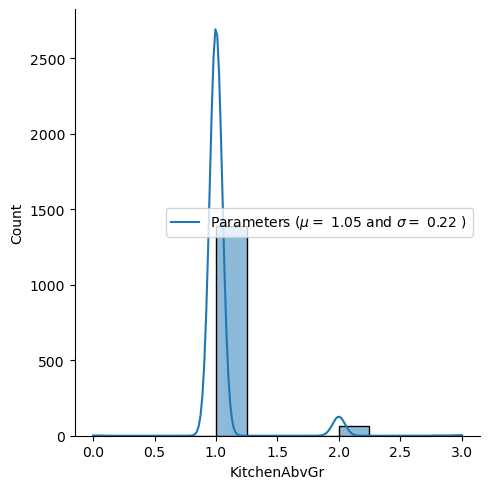

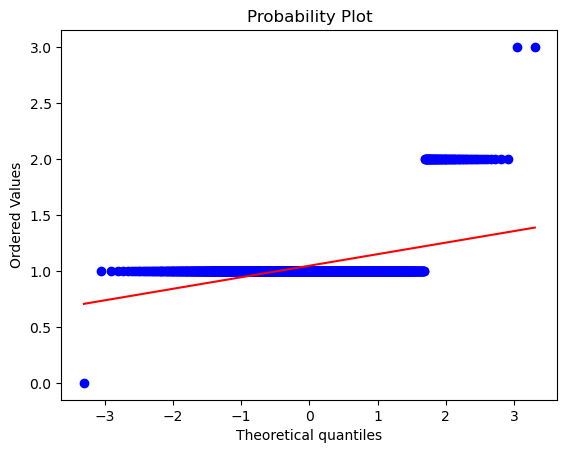

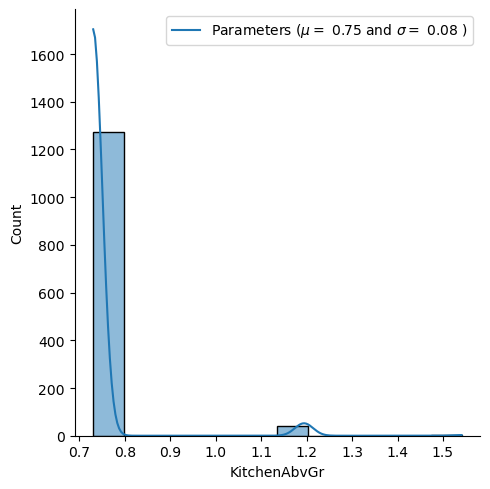

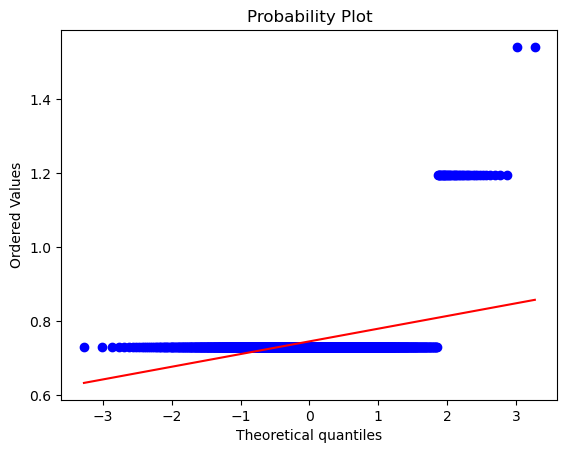

<Figure size 640x480 with 0 Axes>

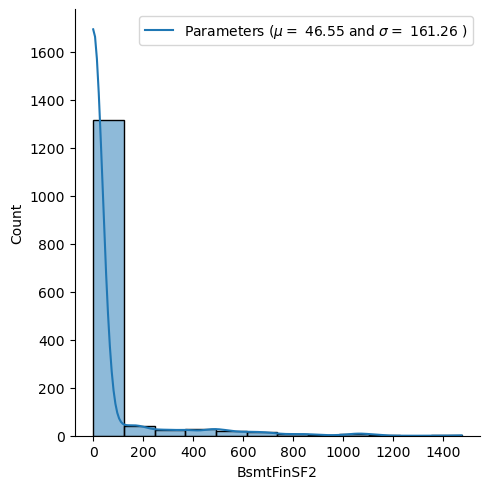

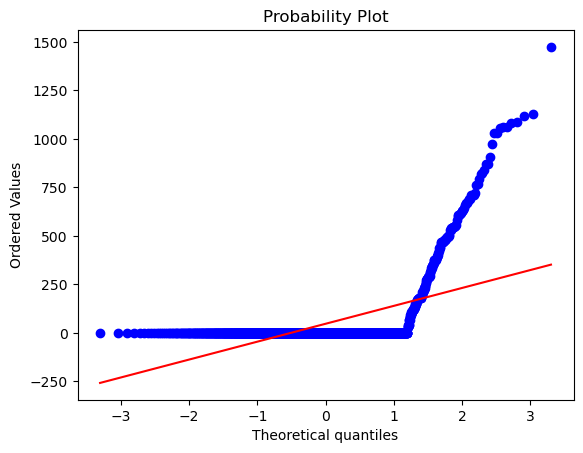

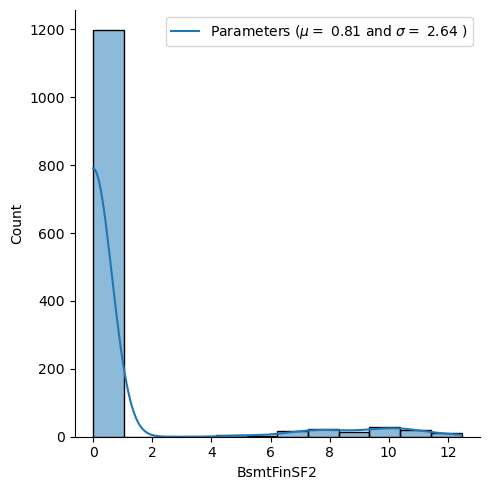

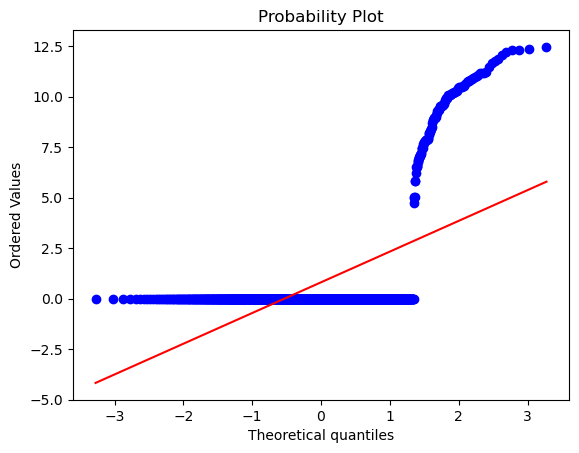

<Figure size 640x480 with 0 Axes>

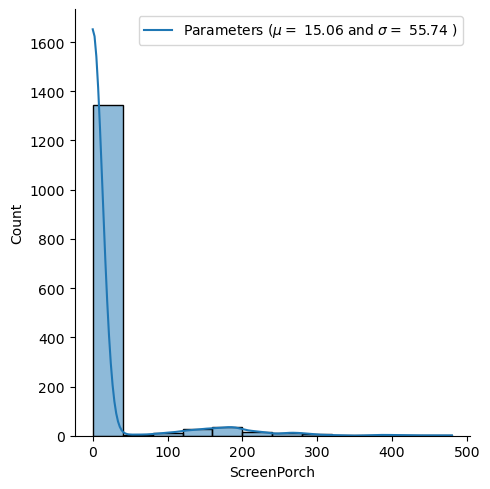

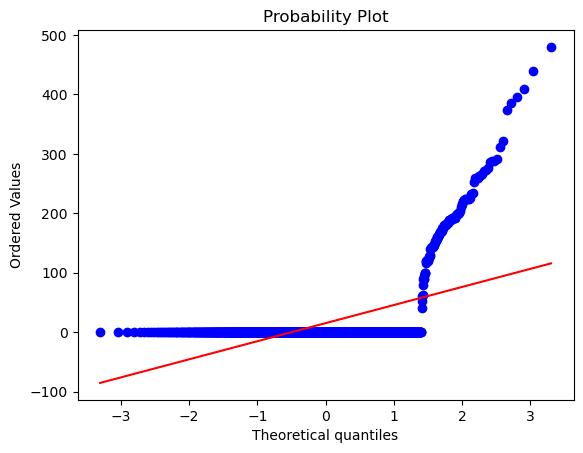

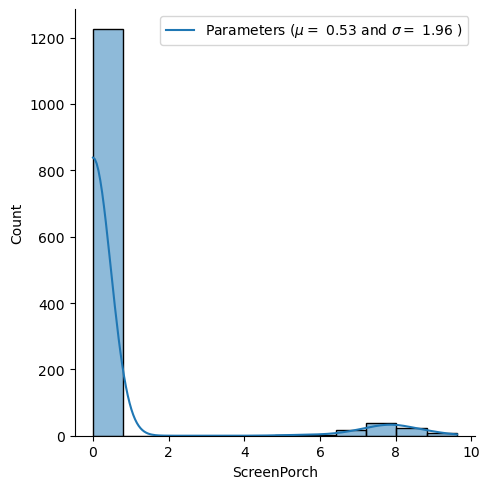

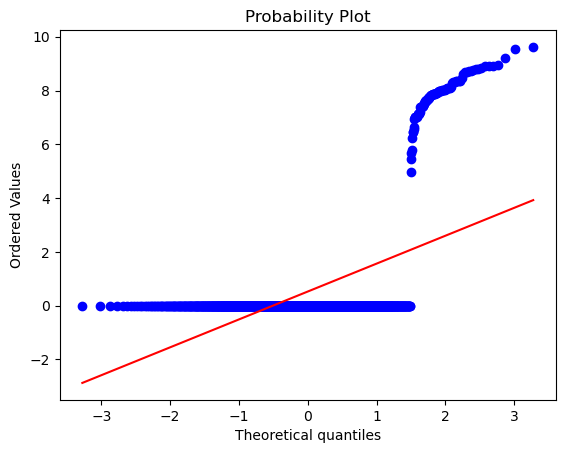

<Figure size 640x480 with 0 Axes>

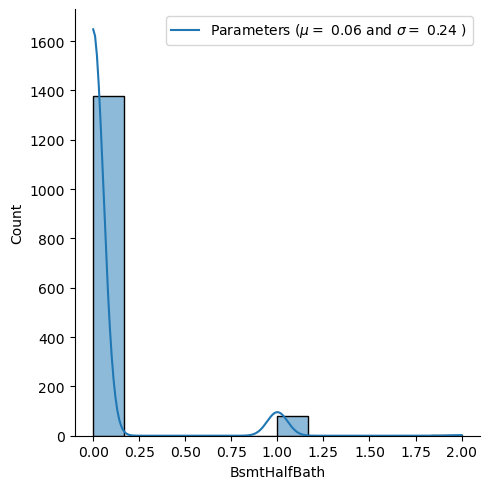

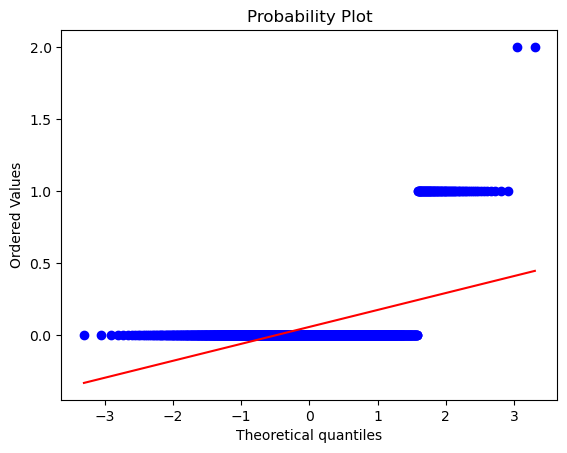

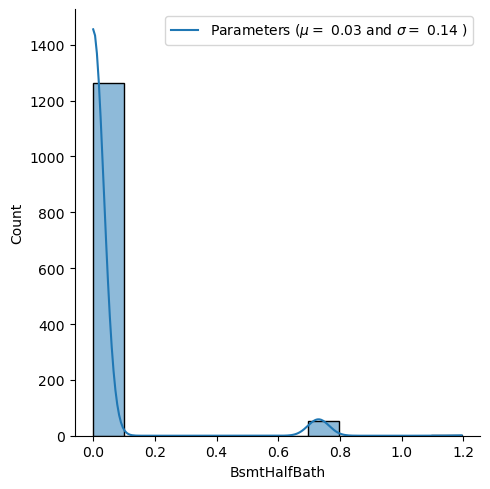

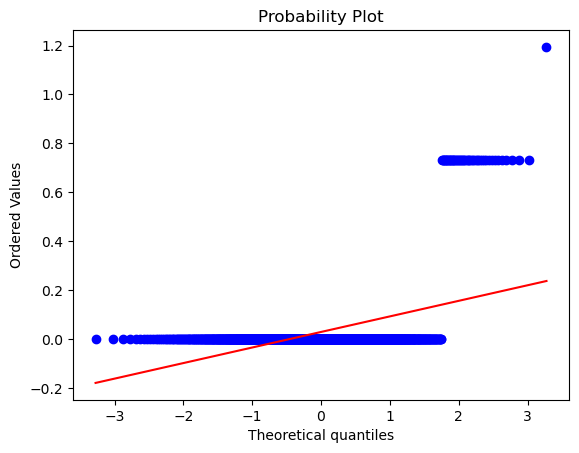

<Figure size 640x480 with 0 Axes>

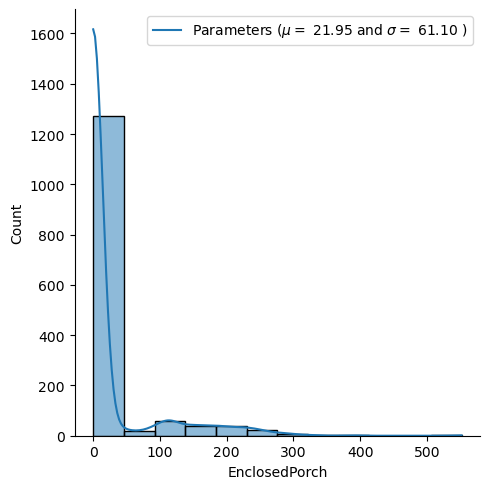

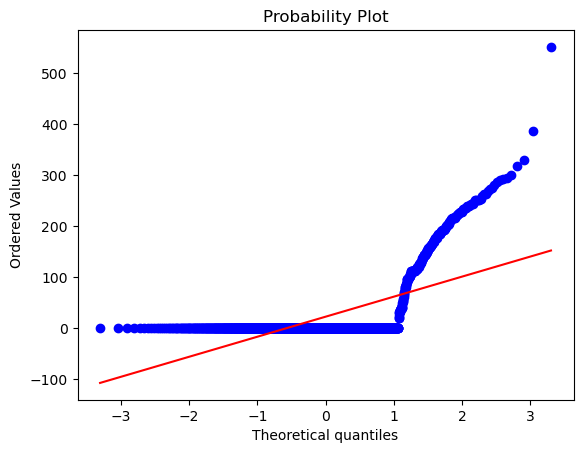

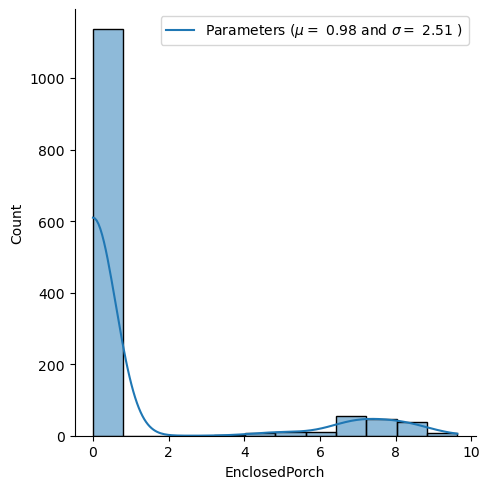

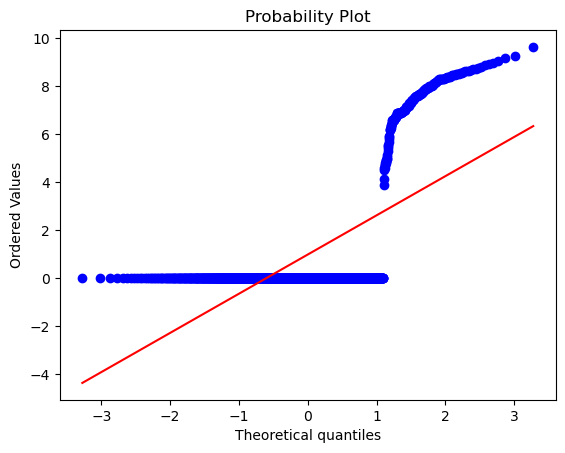

<Figure size 640x480 with 0 Axes>

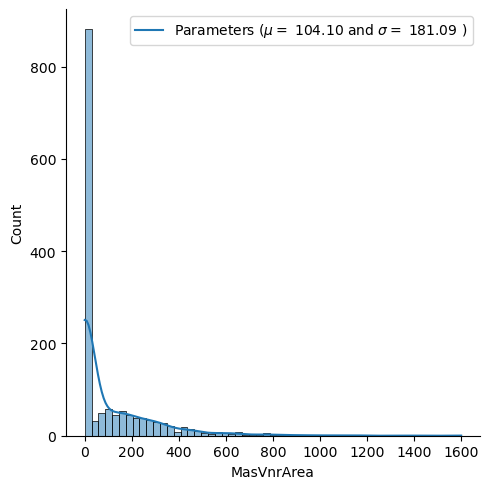

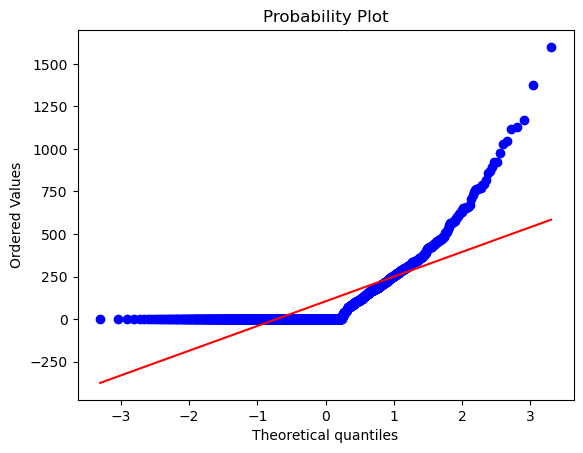

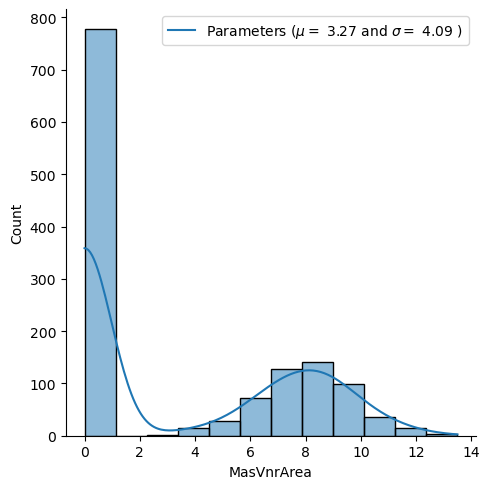

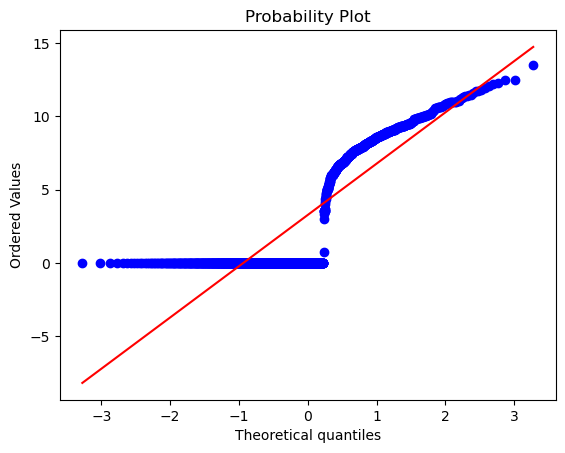

<Figure size 640x480 with 0 Axes>

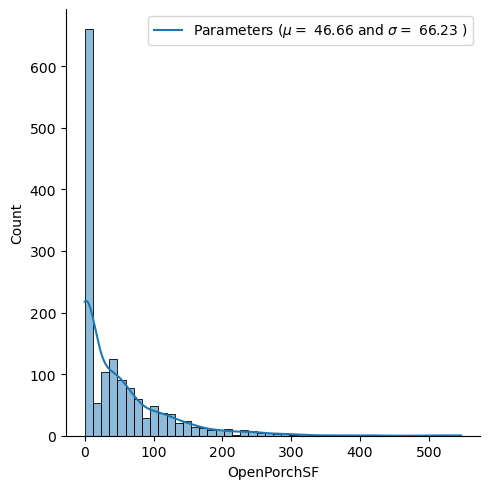

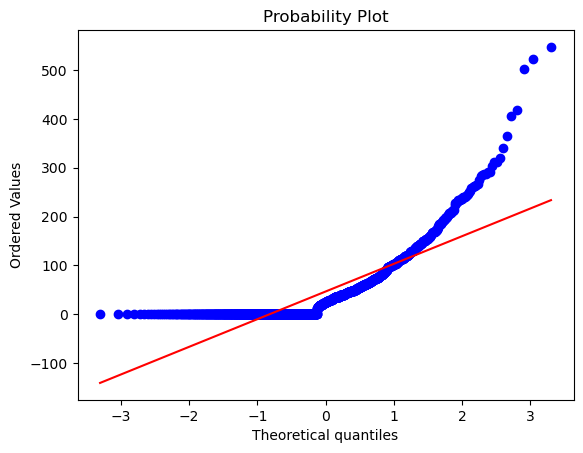

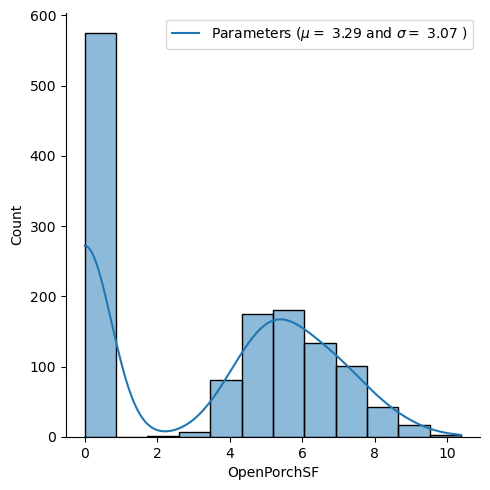

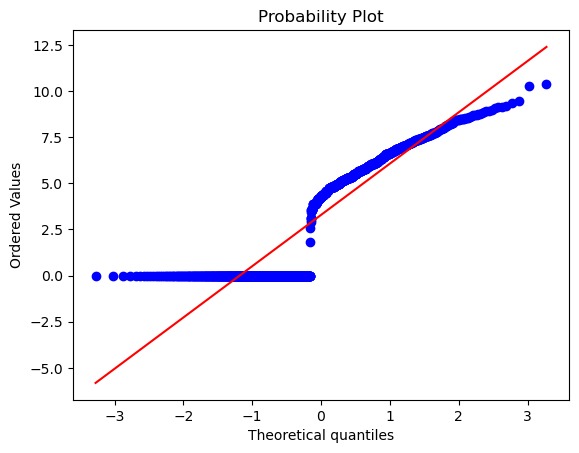

<Figure size 640x480 with 0 Axes>

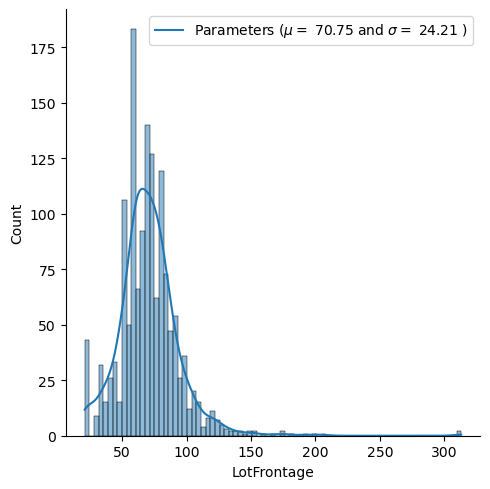

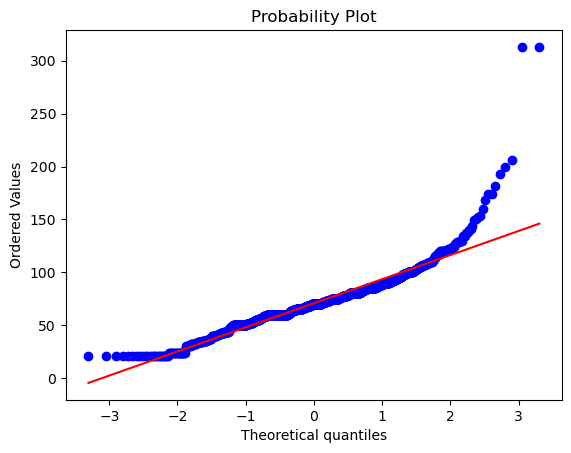

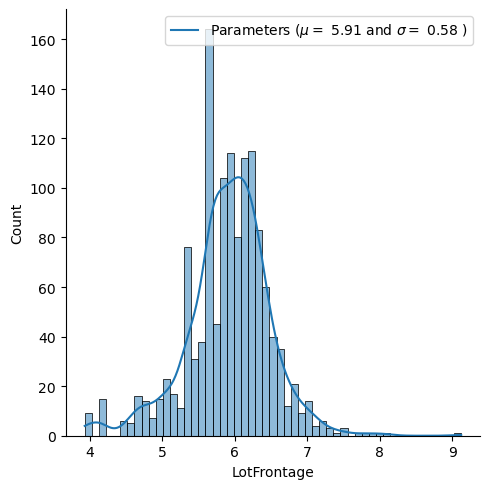

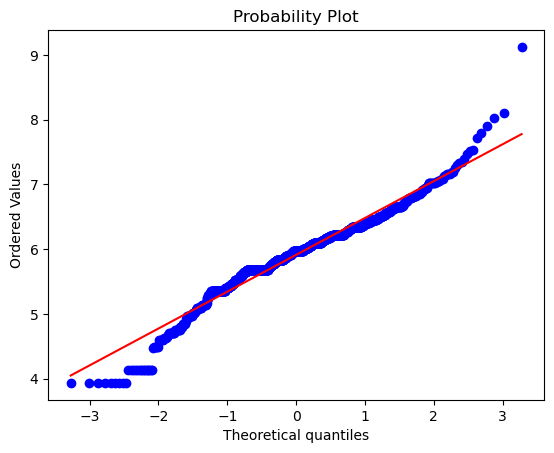

<Figure size 640x480 with 0 Axes>

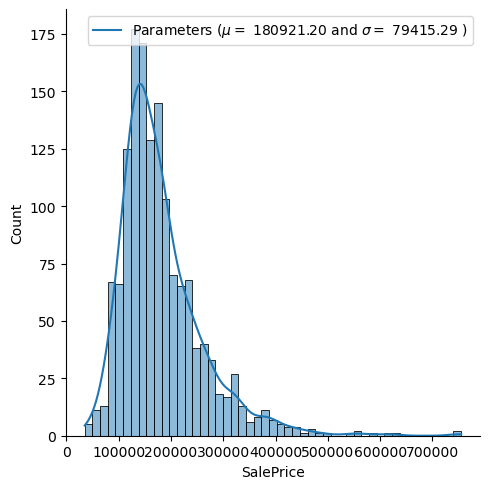

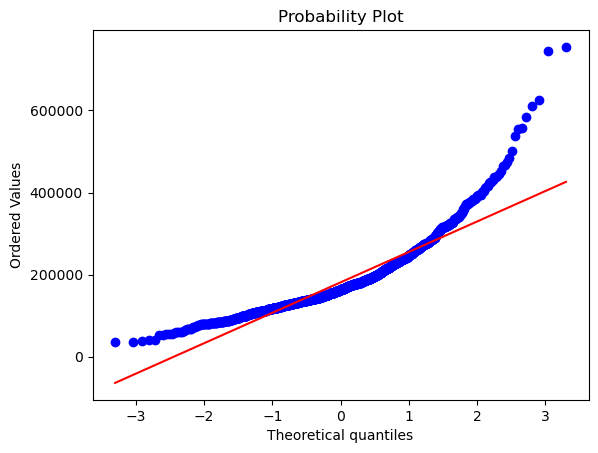

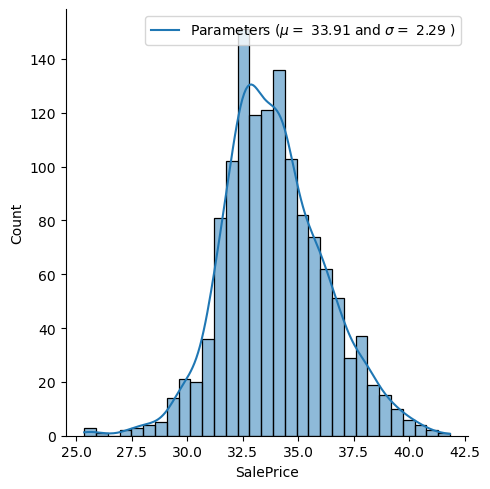

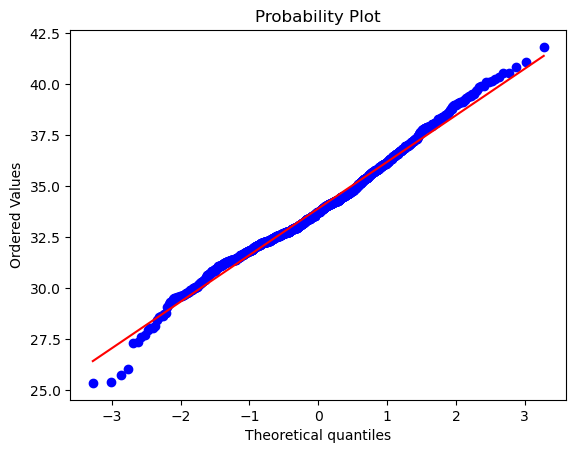

<Figure size 640x480 with 0 Axes>

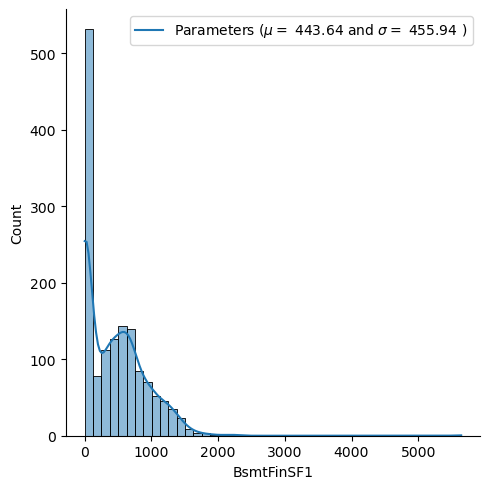

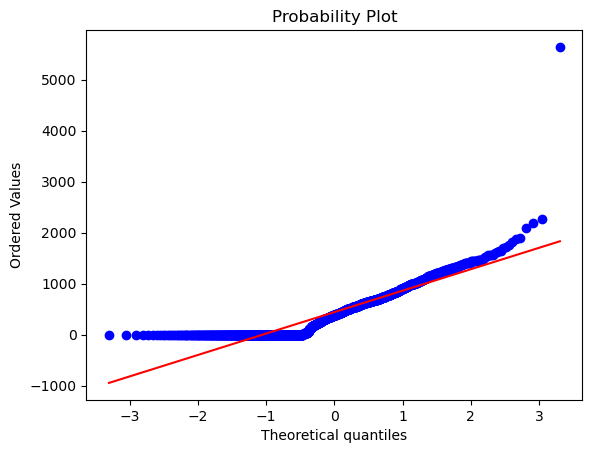

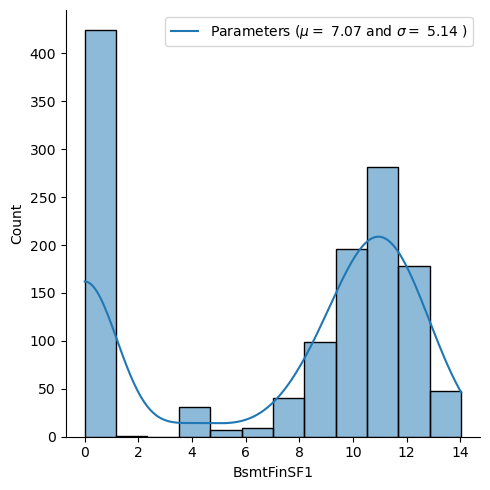

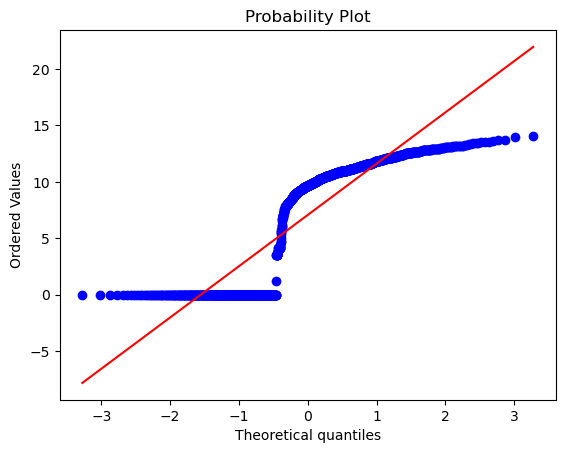

<Figure size 640x480 with 0 Axes>

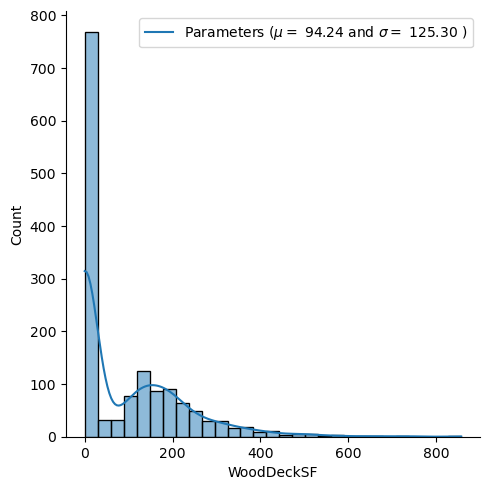

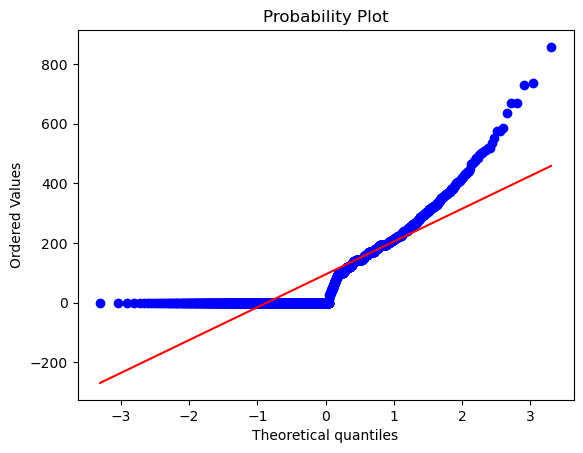

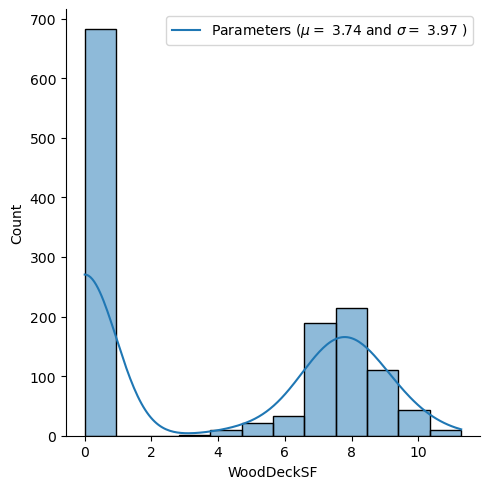

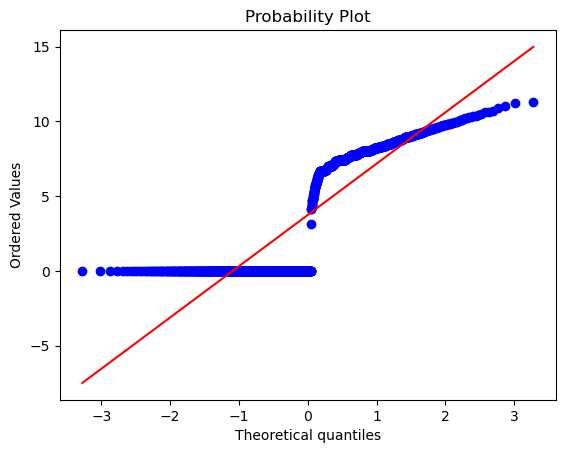

<Figure size 640x480 with 0 Axes>

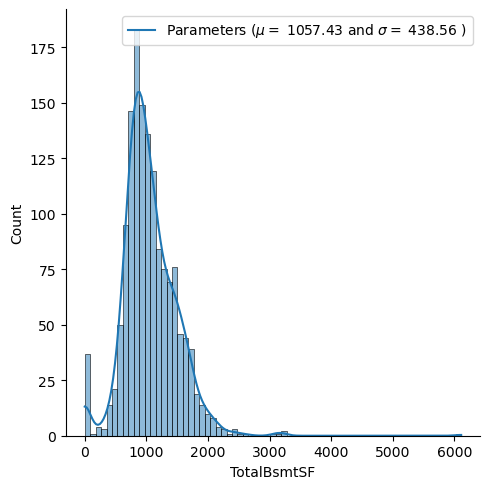

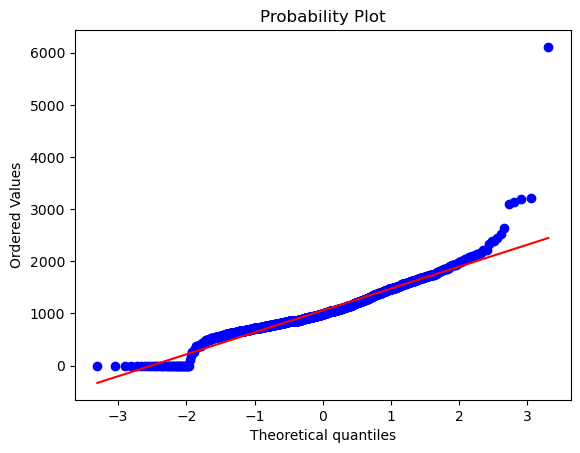

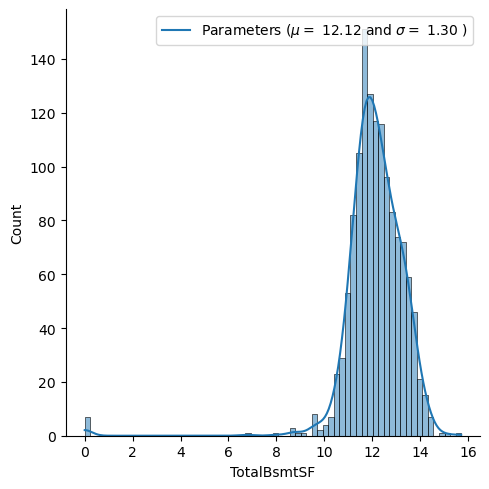

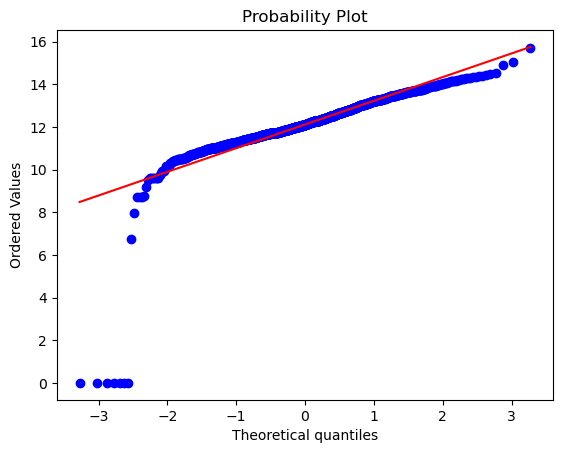

<Figure size 640x480 with 0 Axes>

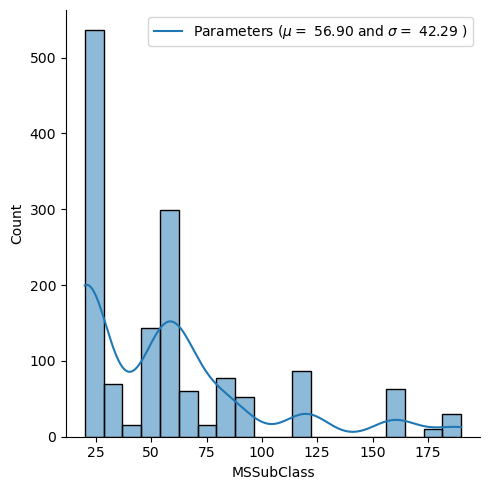

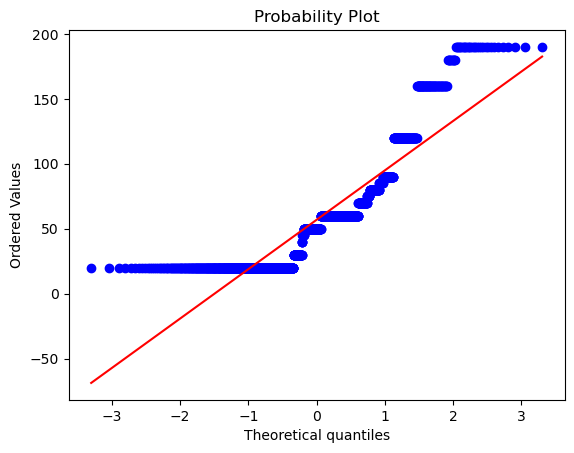

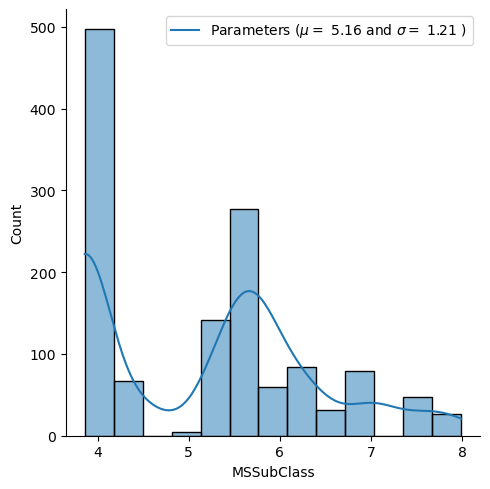

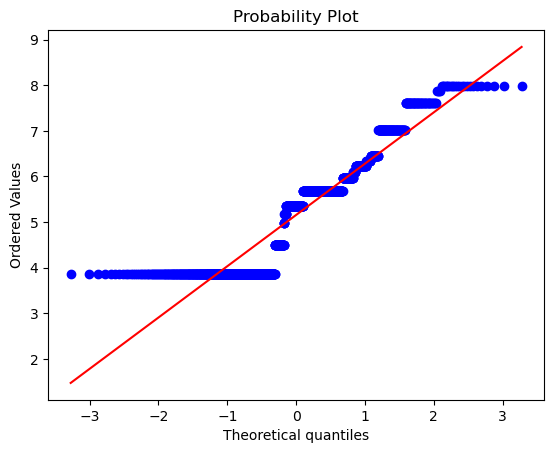

<Figure size 640x480 with 0 Axes>

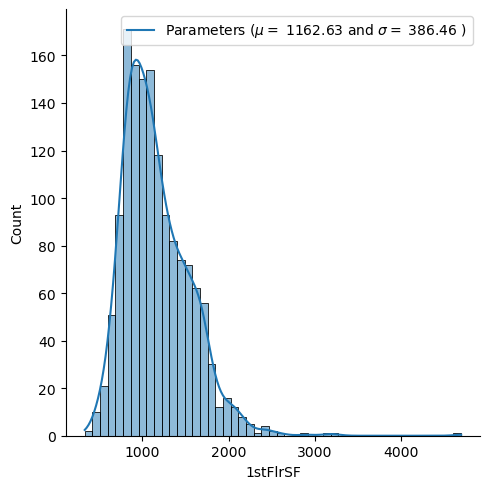

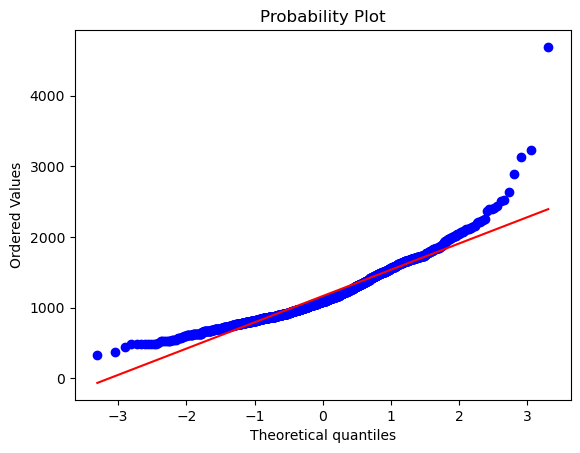

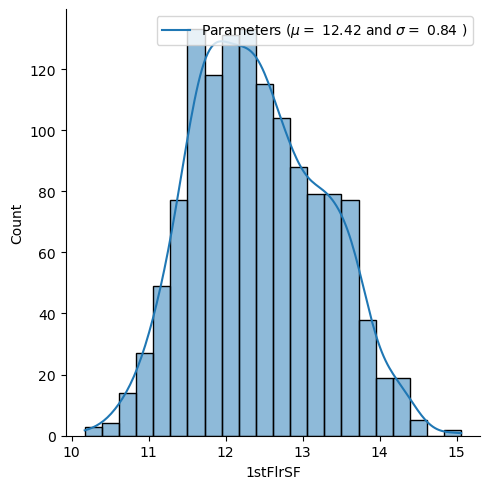

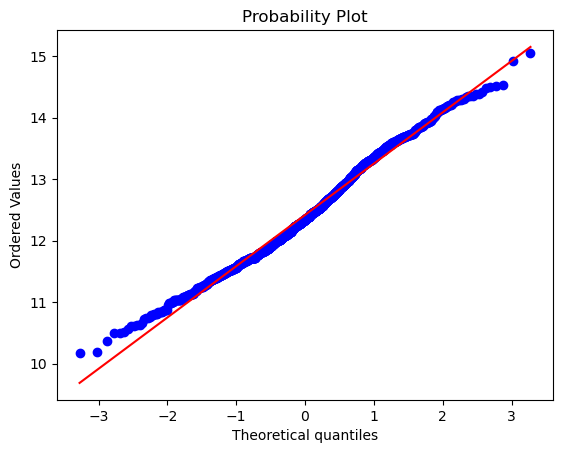

<Figure size 640x480 with 0 Axes>

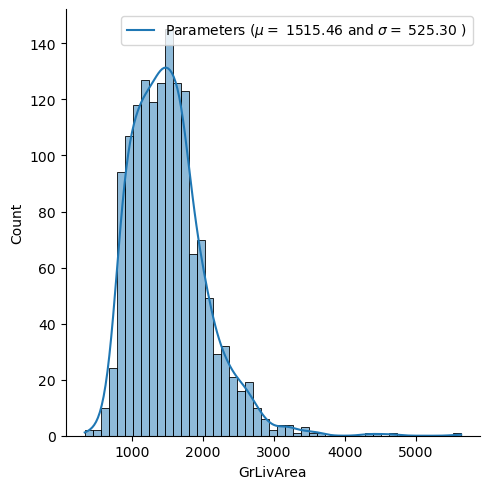

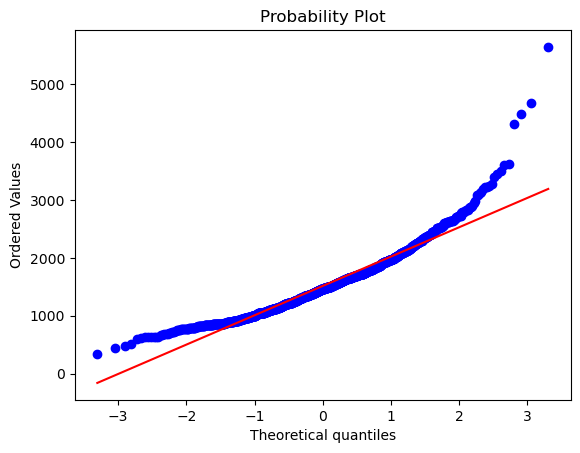

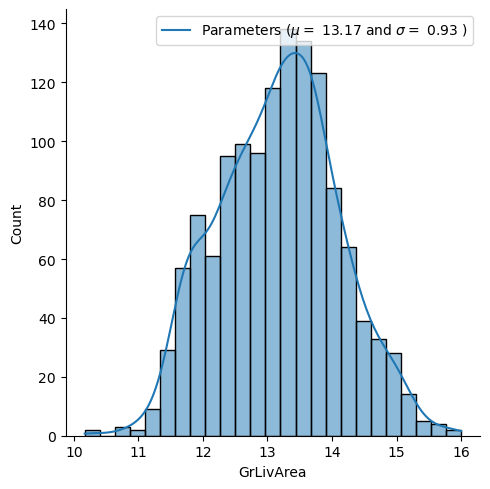

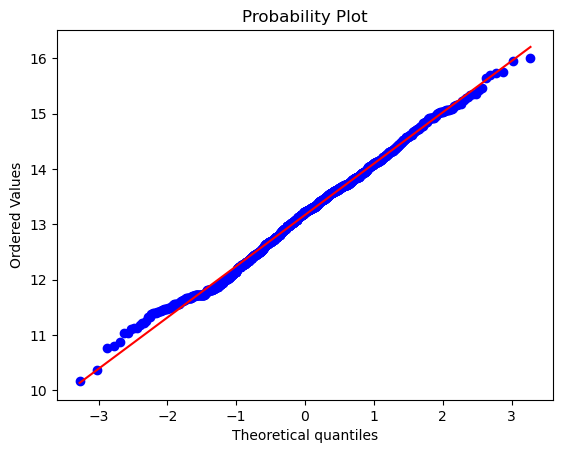

<Figure size 640x480 with 0 Axes>

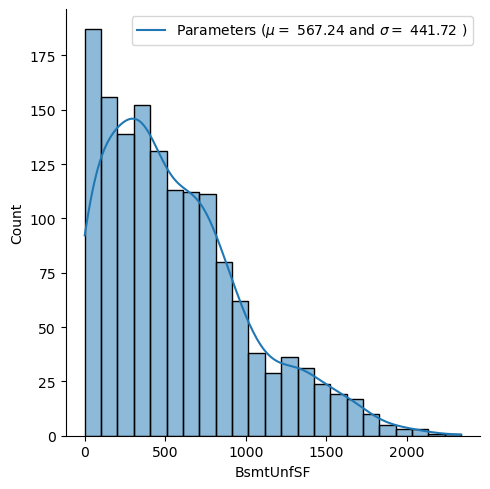

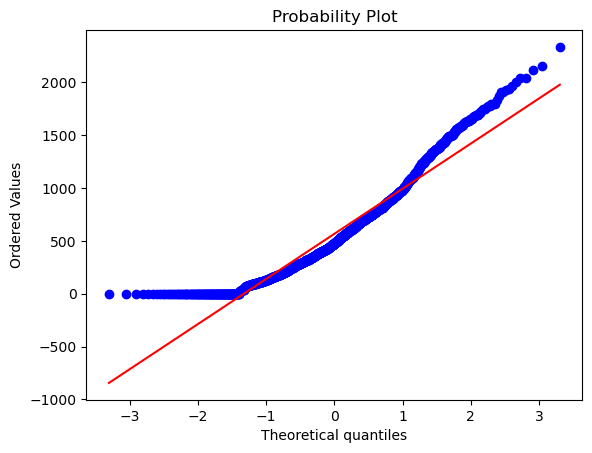

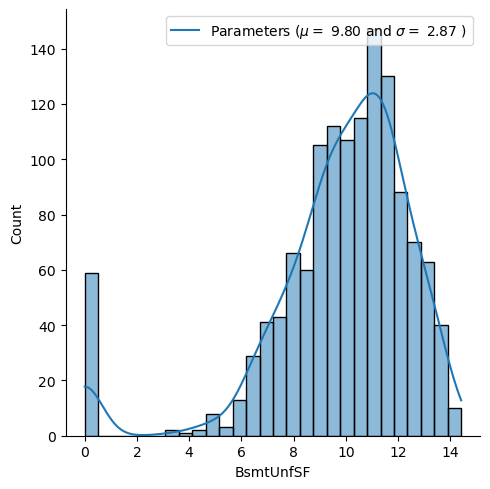

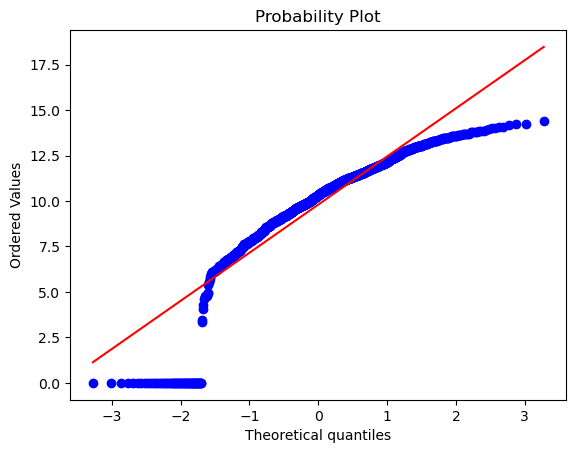

<Figure size 640x480 with 0 Axes>

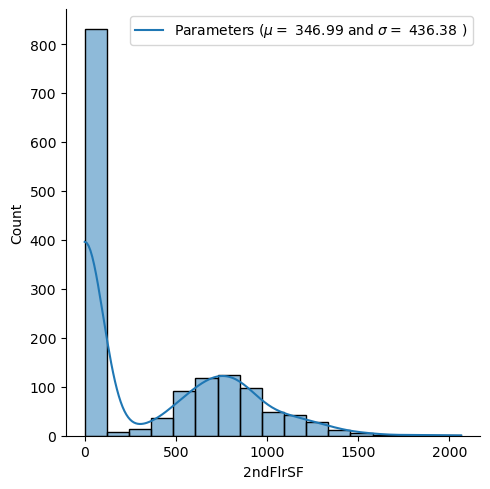

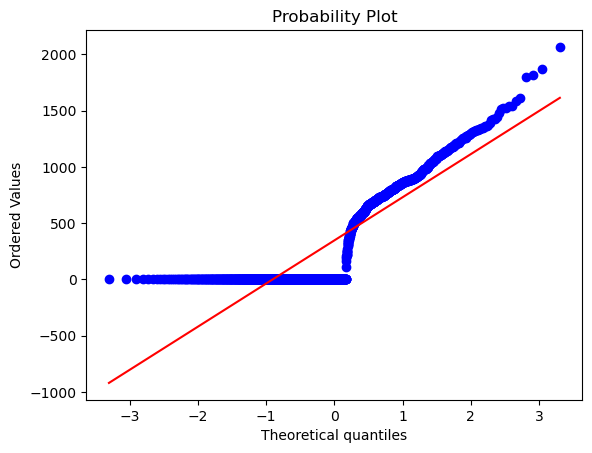

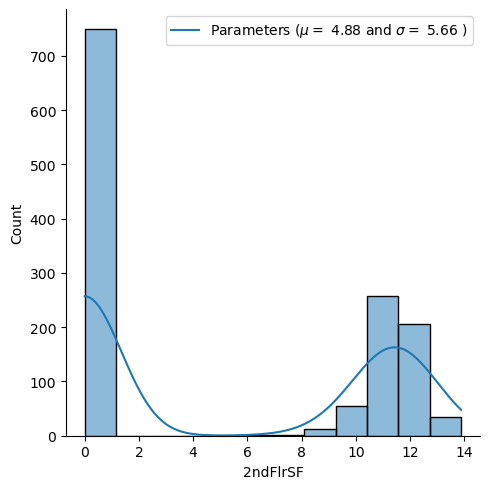

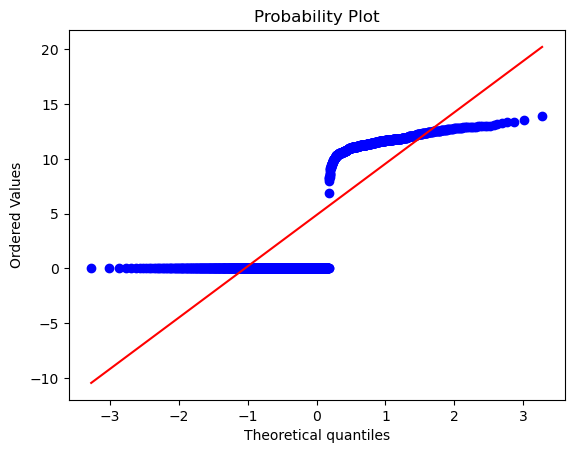

In [1320]:
for i, col in enumerate(data_train[skewed_feats2_train].columns):
    plt.figure(i)
    sns.displot(data_train_before_box_cox[col], kde= True)
    (mu, sigma) = norm.fit(data_train_before_box_cox[col])
    plt.legend(['Parameters ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.show()
    plt.figure(i)
    stats.probplot(data_train_before_box_cox[col], plot=plt)
    plt.show()
    sns.displot(normal_data[col], kde= True)
    (mu, sigma) = norm.fit(normal_data[col])
    plt.legend(['Parameters ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.show()
    stats.probplot(normal_data[col], plot=plt)
    plt.show()

#### PLOTTING QQ-PLOT OF FEATURES BEFORE AND AFTER BOX-COX TRANSFORMATION FOR TEST DATA

<Figure size 640x480 with 0 Axes>

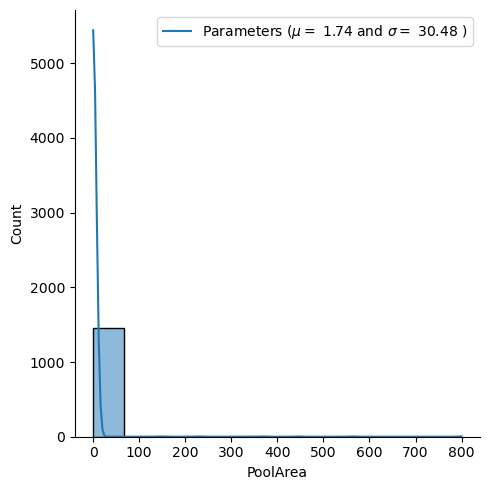

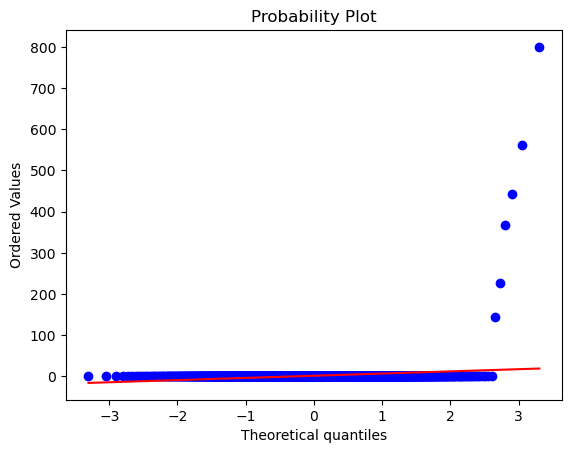

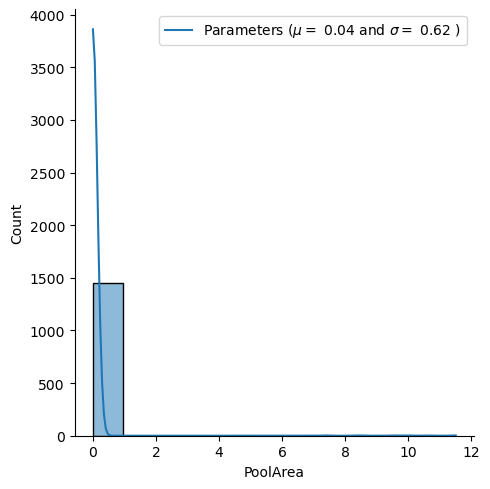

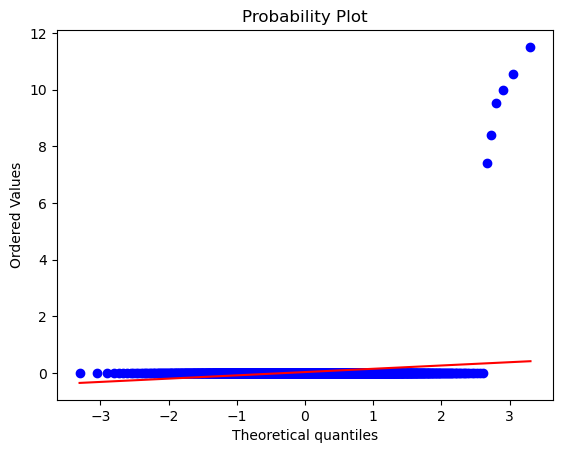

<Figure size 640x480 with 0 Axes>

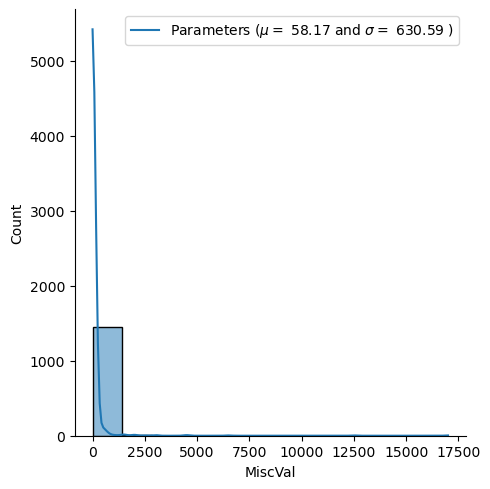

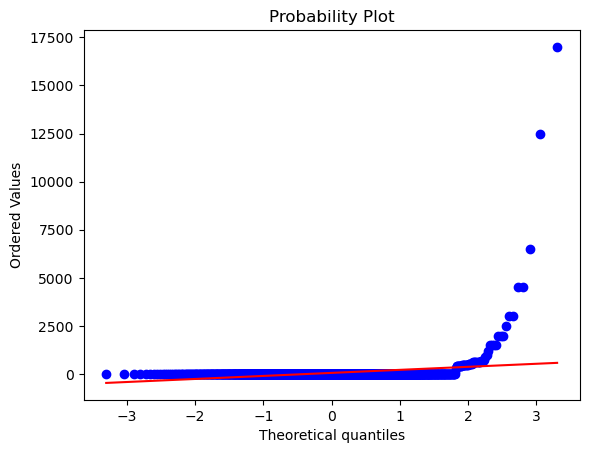

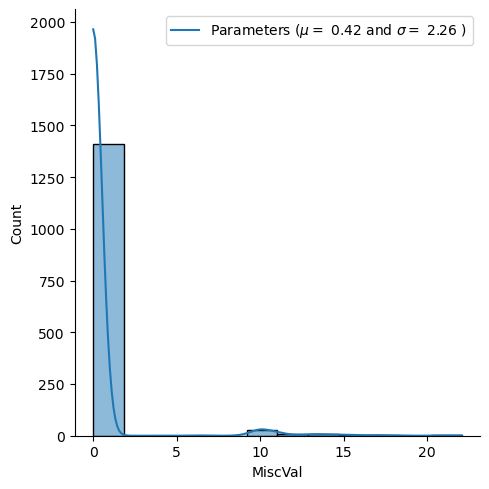

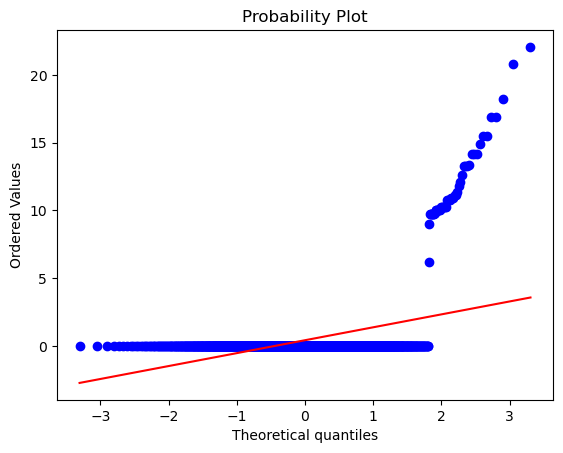

<Figure size 640x480 with 0 Axes>

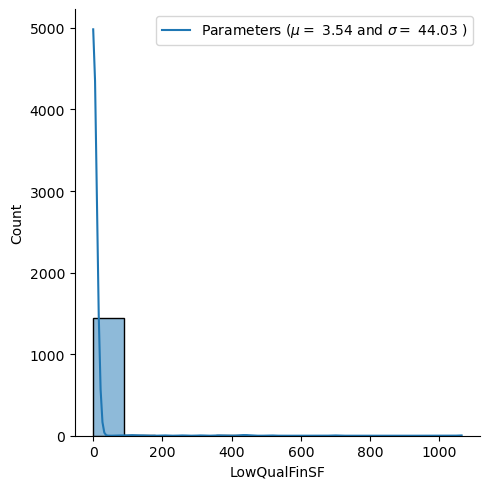

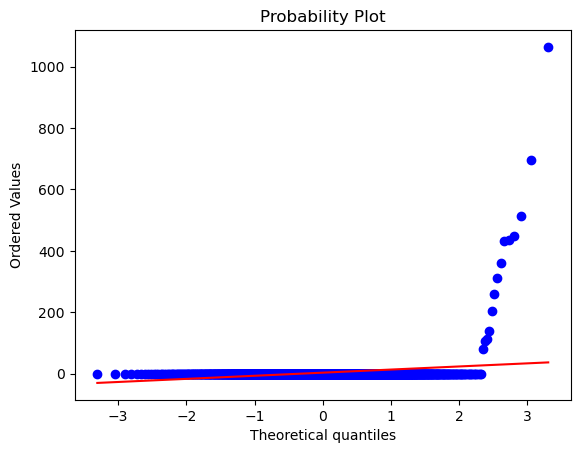

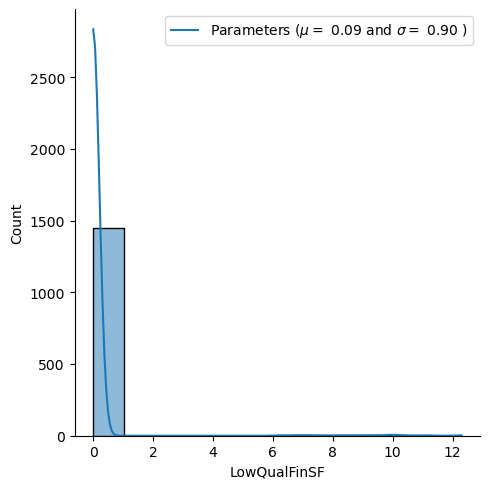

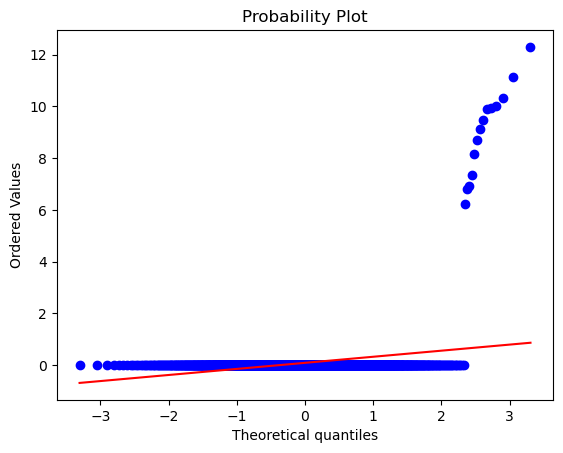

<Figure size 640x480 with 0 Axes>

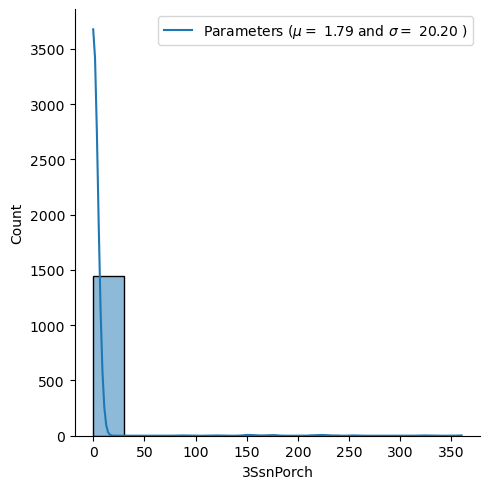

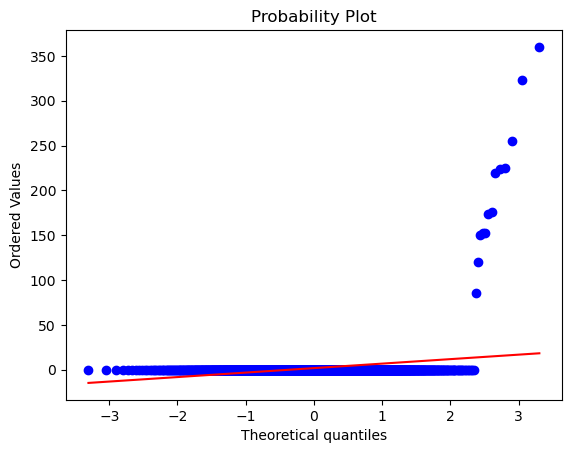

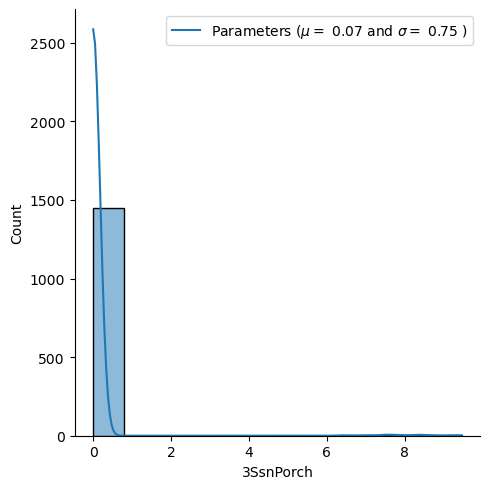

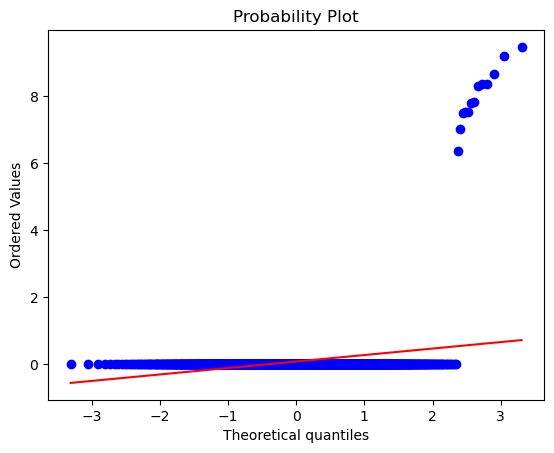

<Figure size 640x480 with 0 Axes>

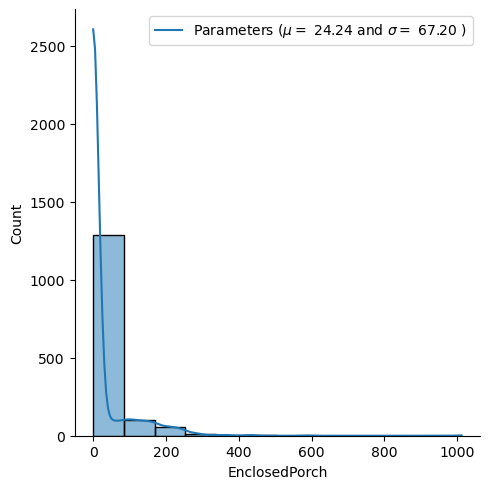

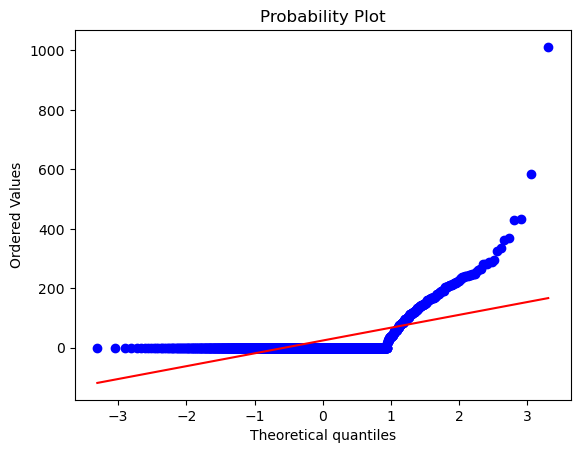

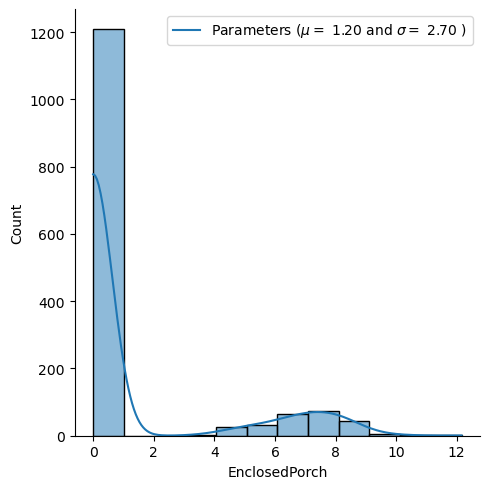

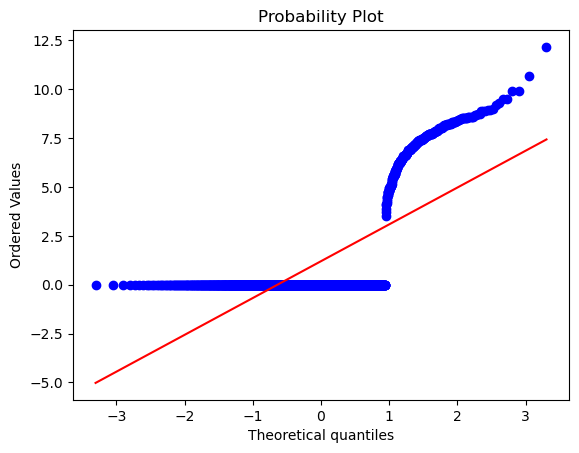

<Figure size 640x480 with 0 Axes>

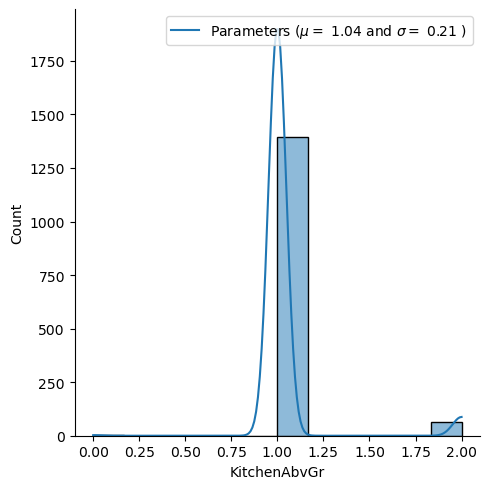

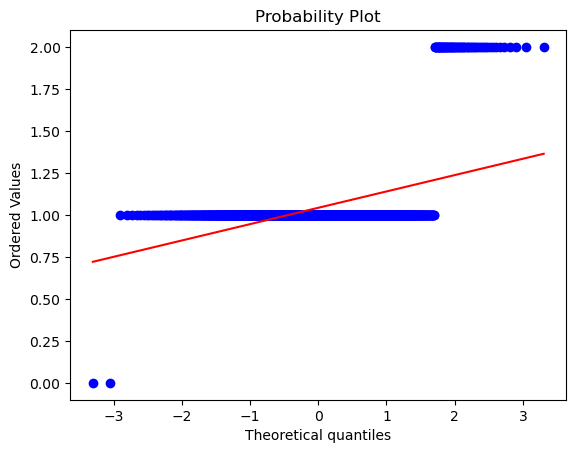

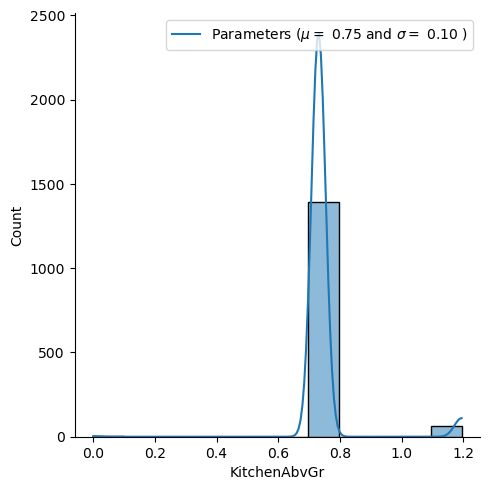

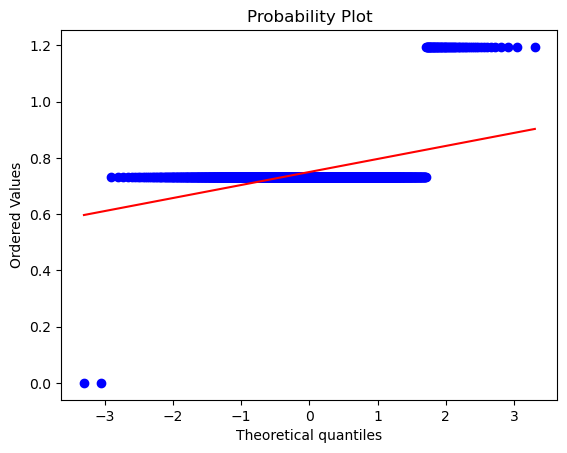

<Figure size 640x480 with 0 Axes>

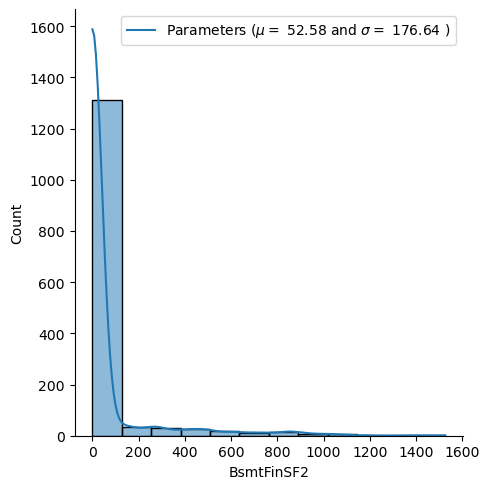

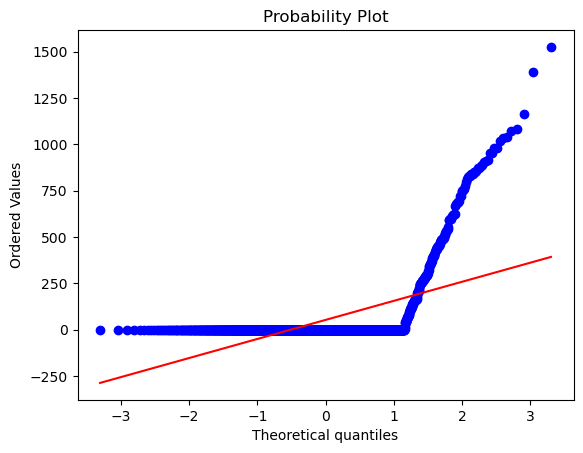

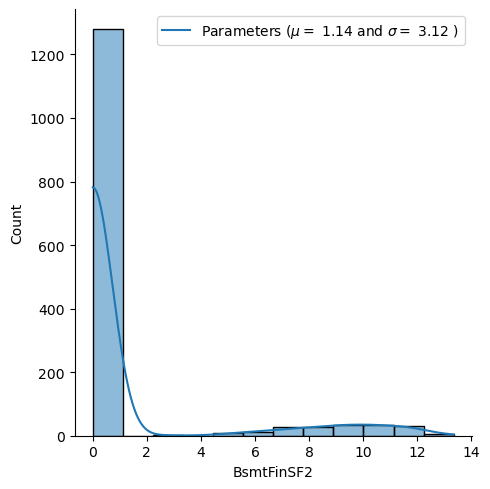

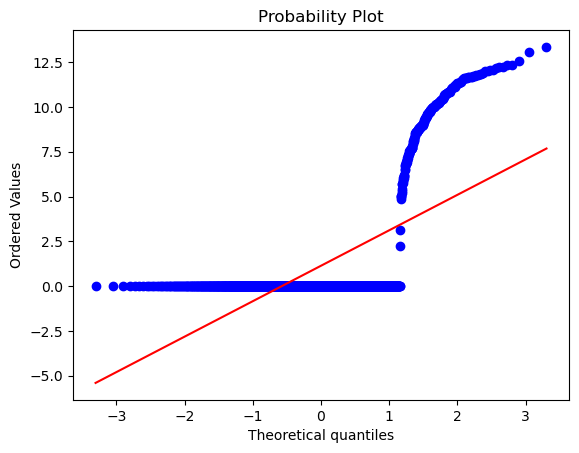

<Figure size 640x480 with 0 Axes>

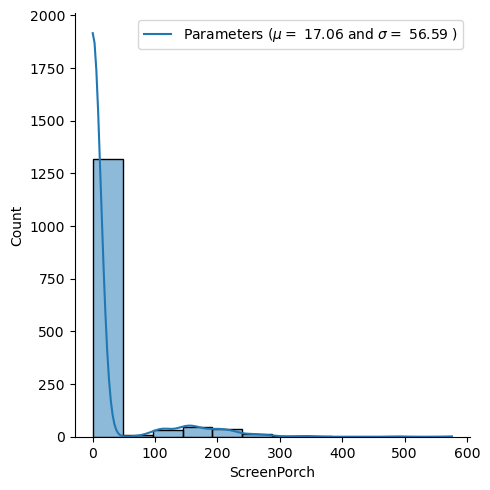

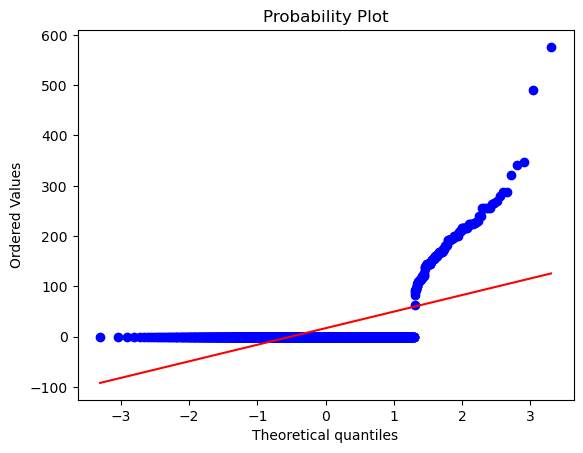

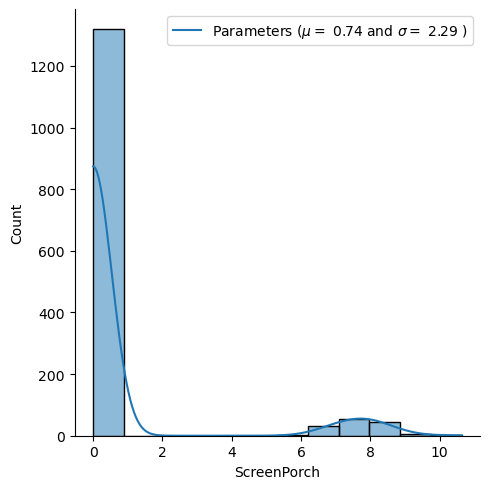

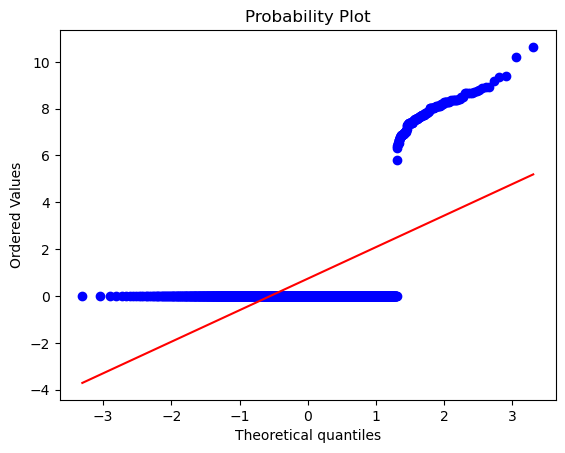

<Figure size 640x480 with 0 Axes>

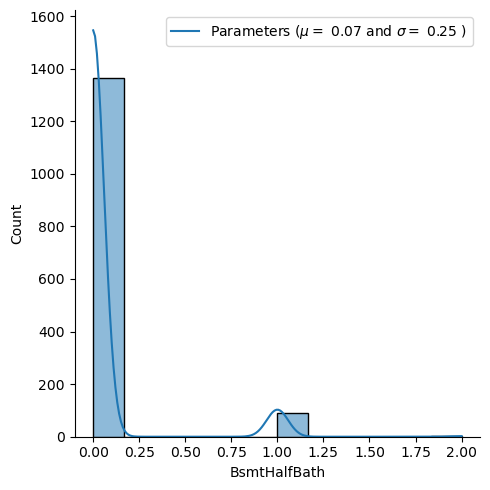

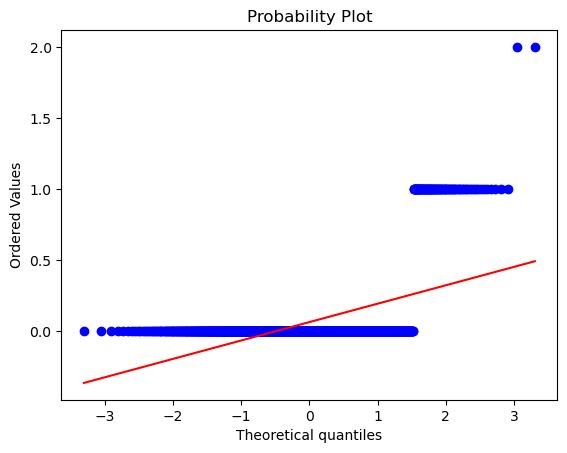

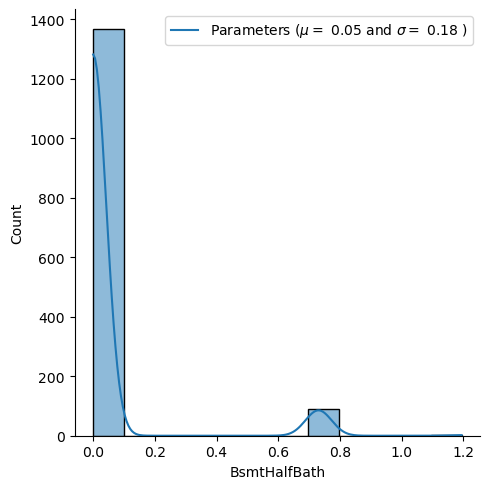

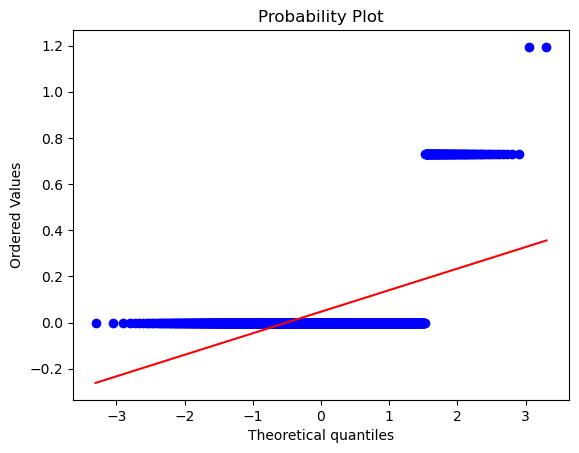

<Figure size 640x480 with 0 Axes>

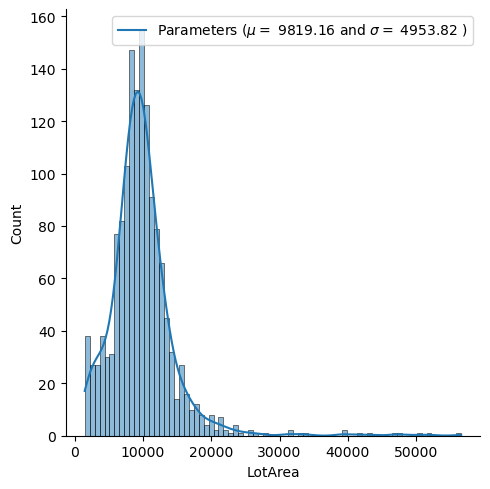

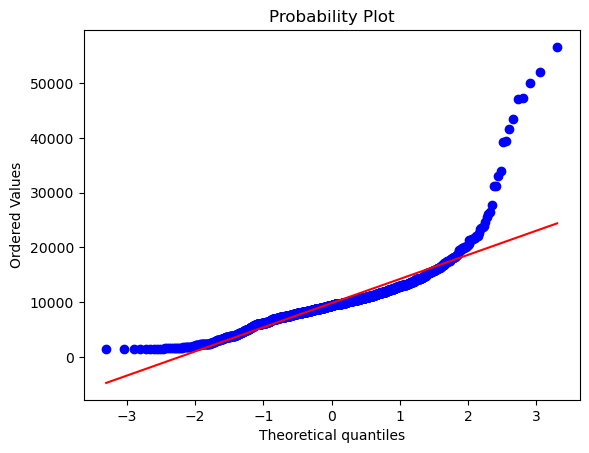

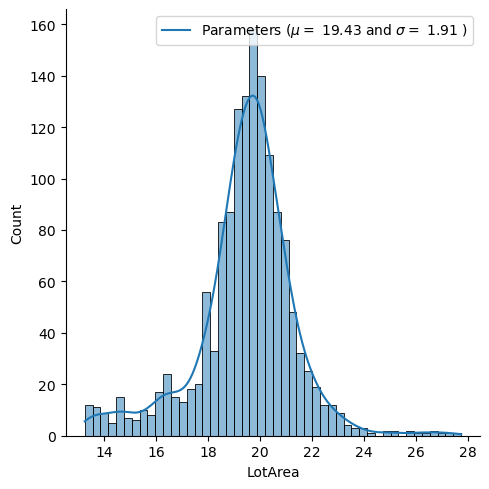

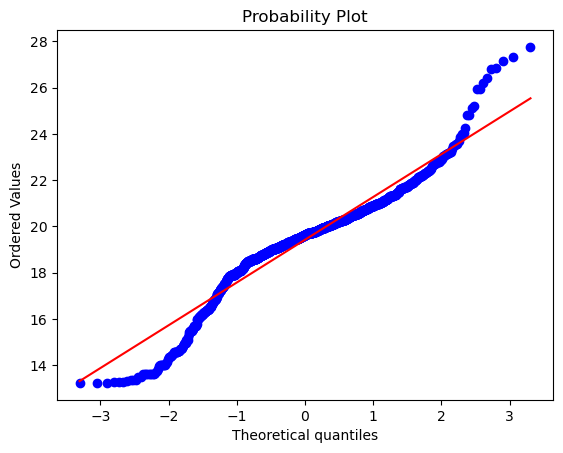

<Figure size 640x480 with 0 Axes>

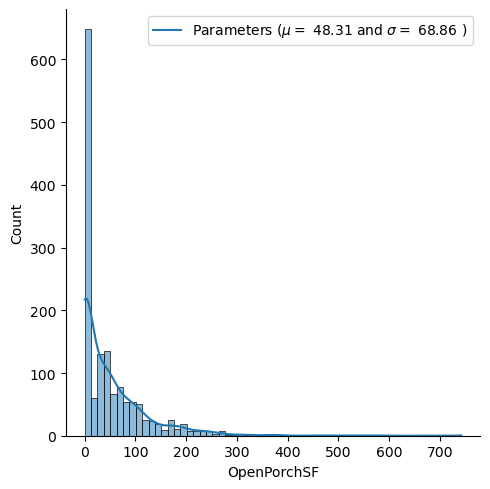

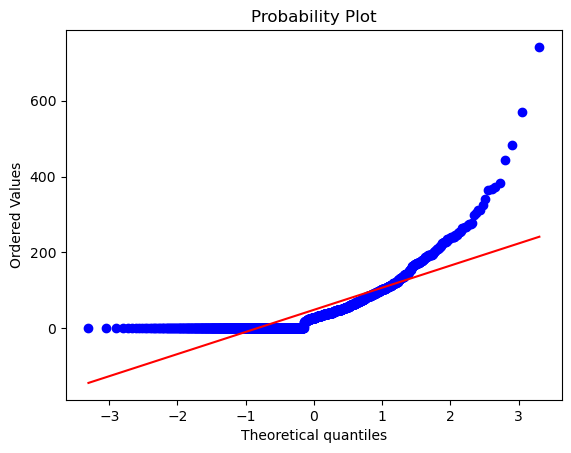

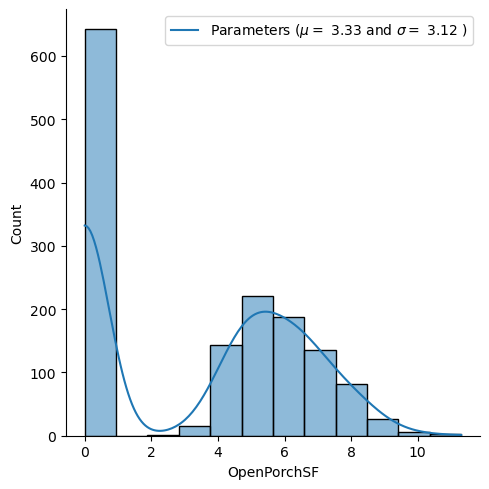

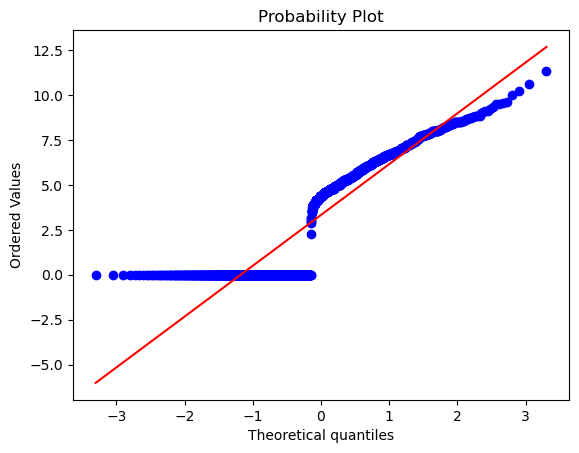

<Figure size 640x480 with 0 Axes>

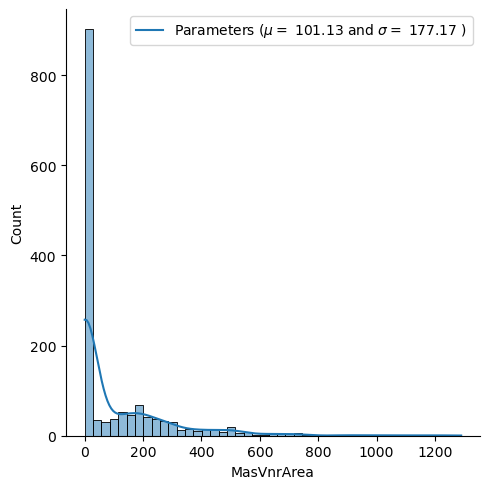

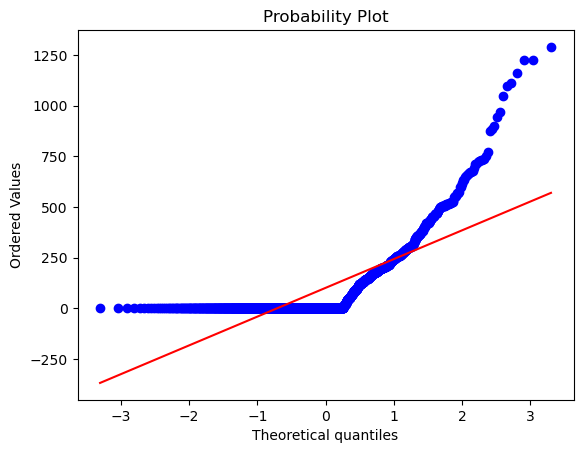

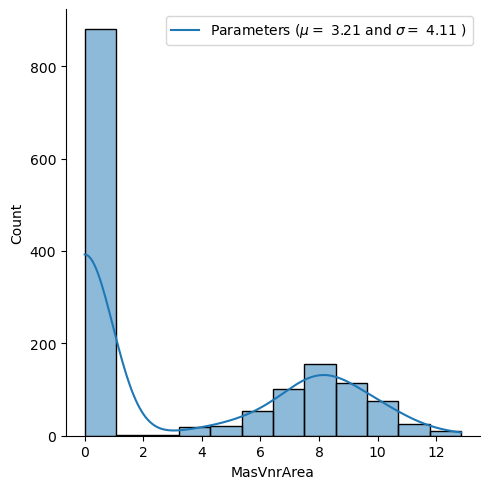

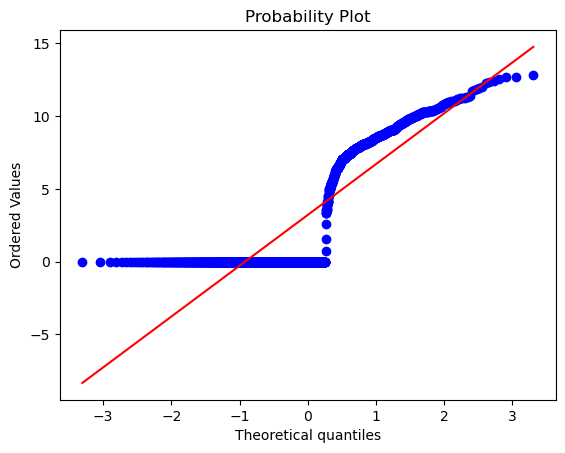

<Figure size 640x480 with 0 Axes>

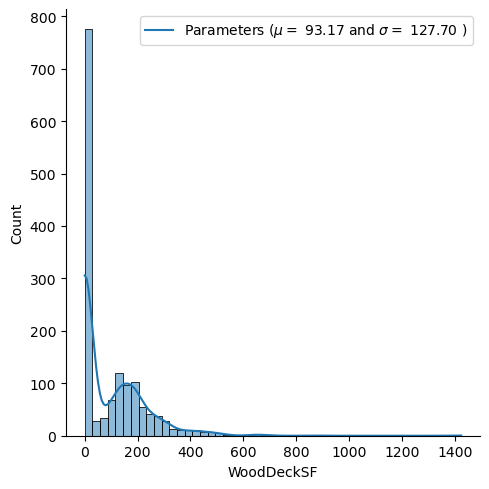

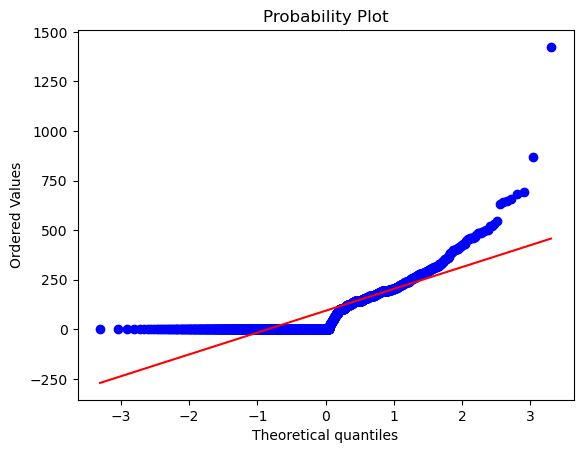

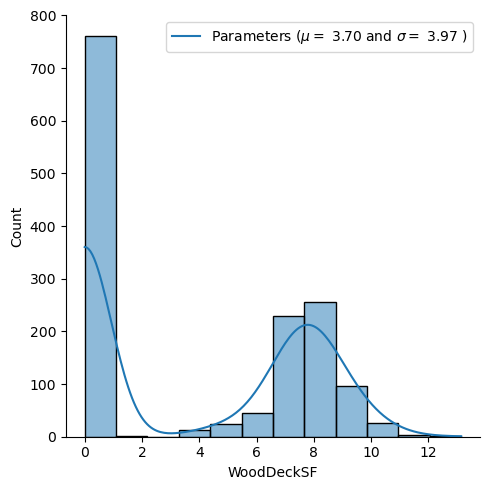

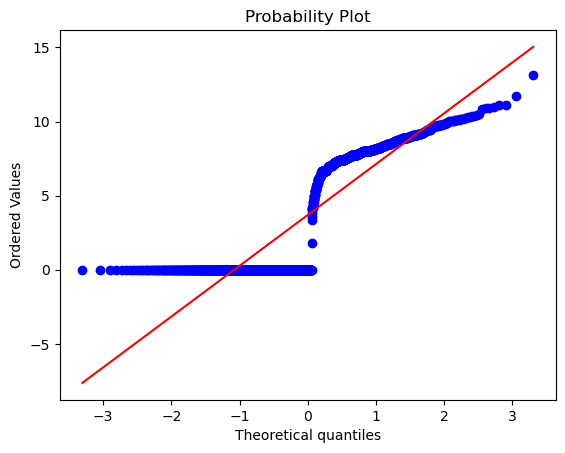

<Figure size 640x480 with 0 Axes>

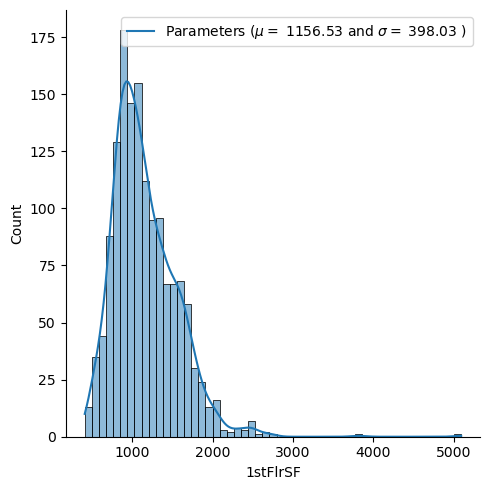

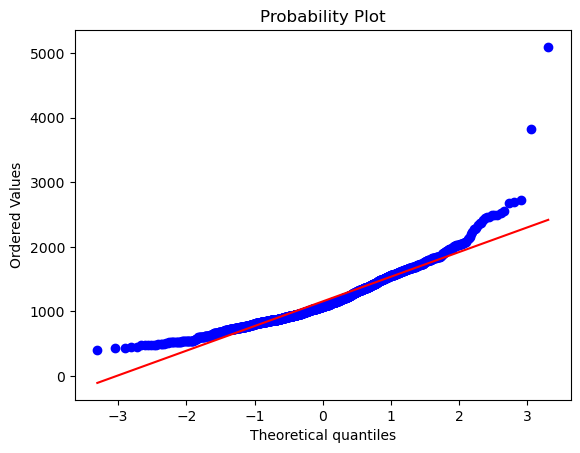

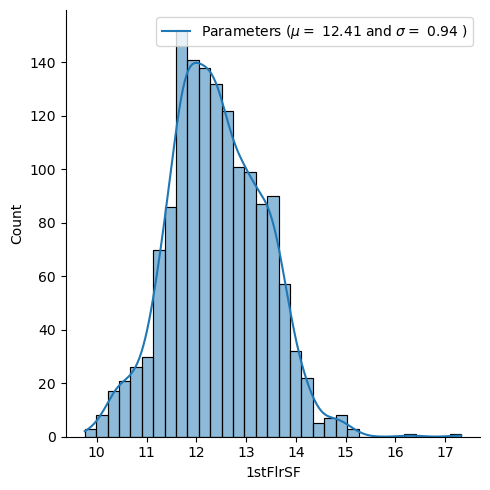

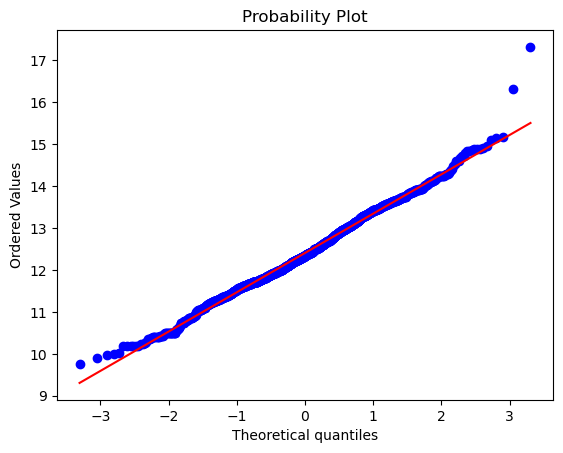

<Figure size 640x480 with 0 Axes>

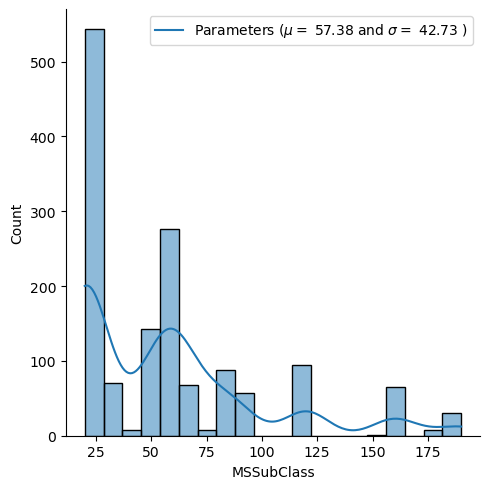

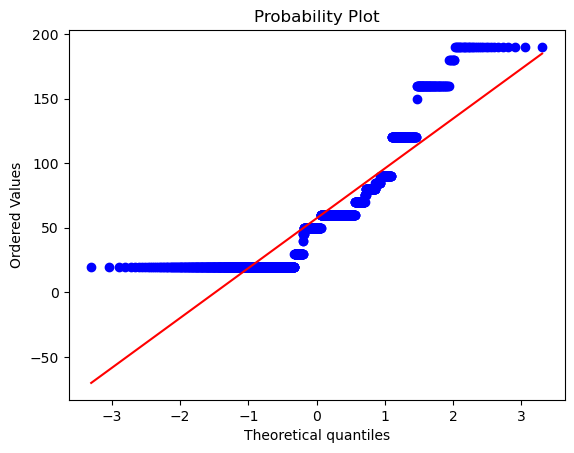

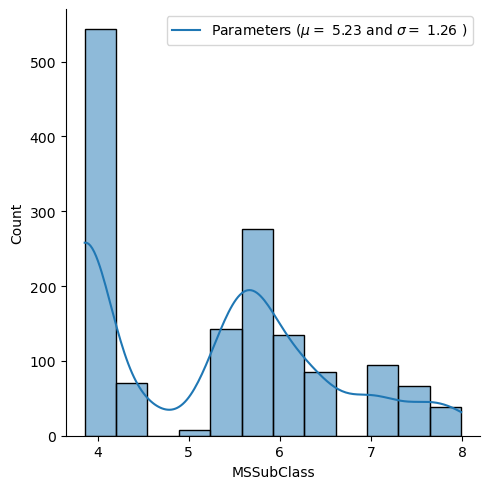

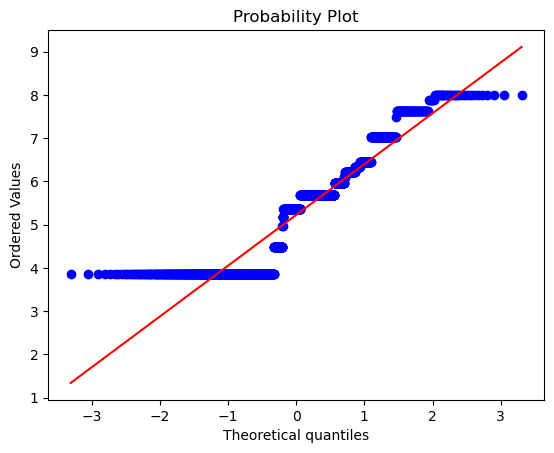

<Figure size 640x480 with 0 Axes>

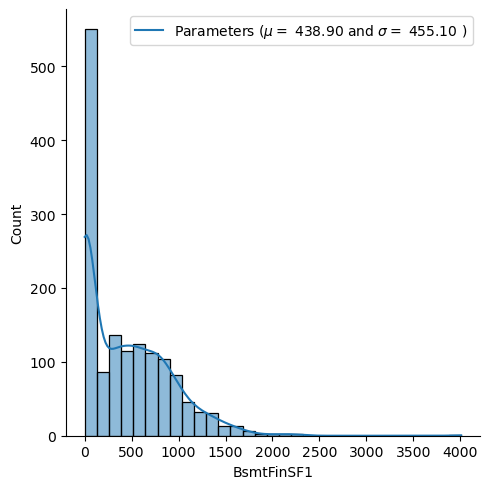

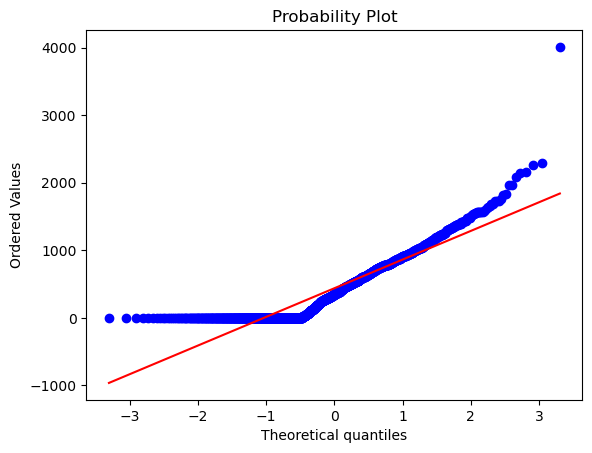

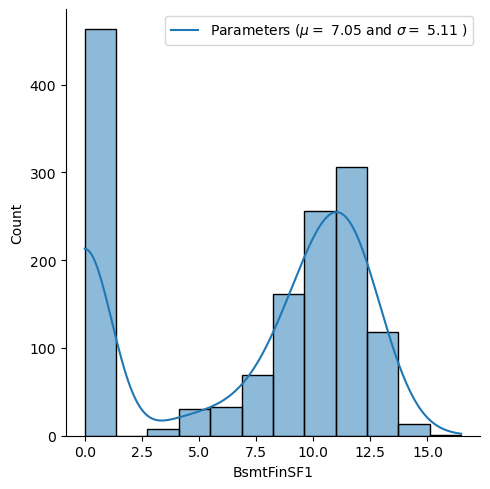

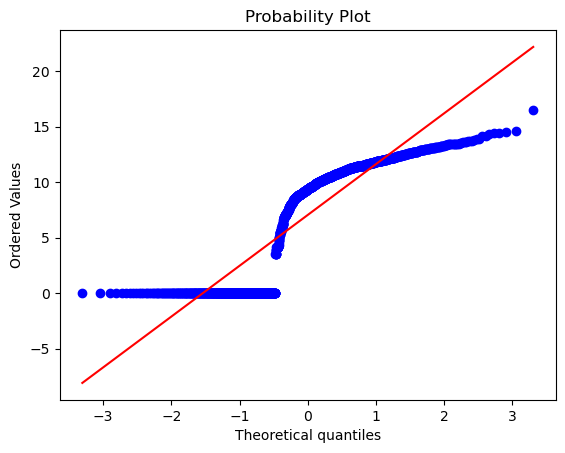

<Figure size 640x480 with 0 Axes>

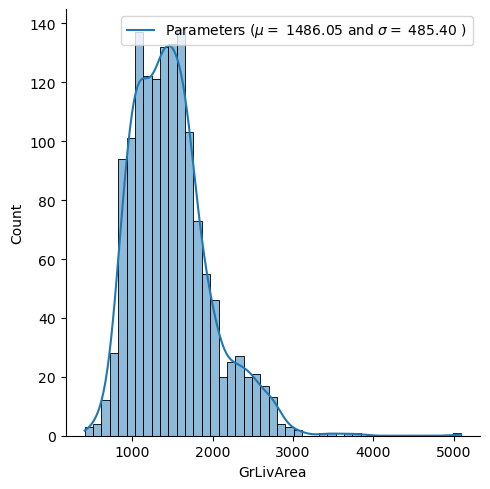

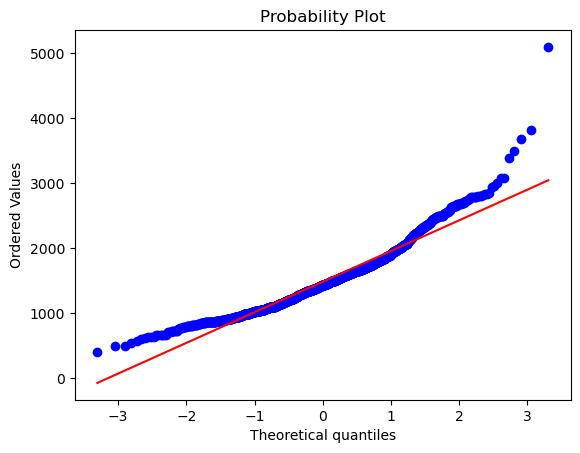

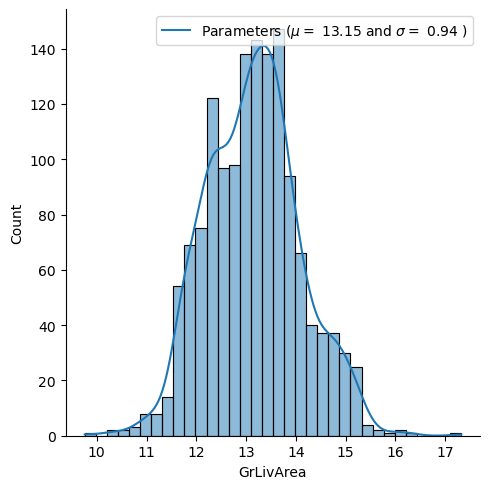

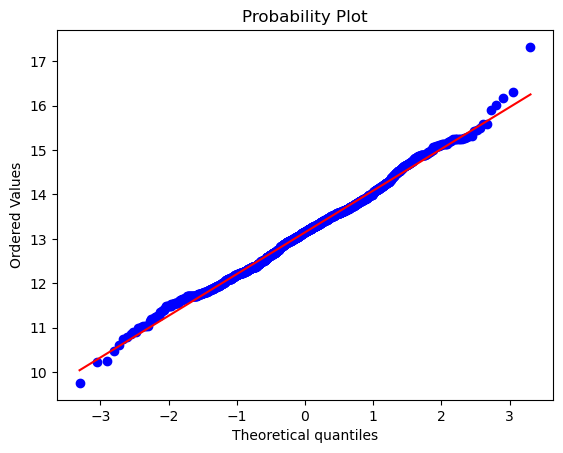

<Figure size 640x480 with 0 Axes>

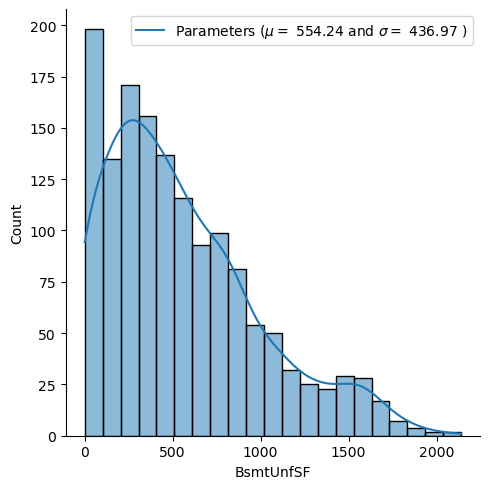

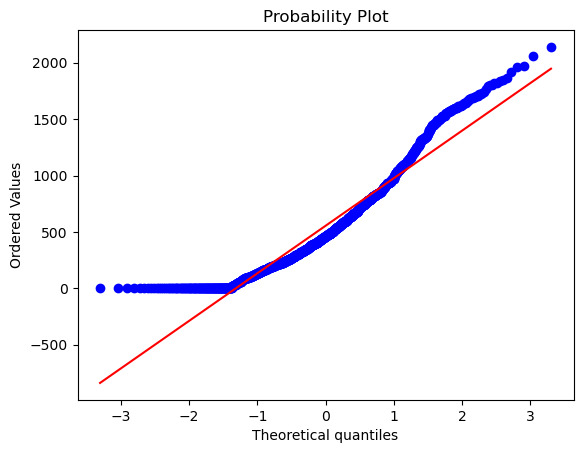

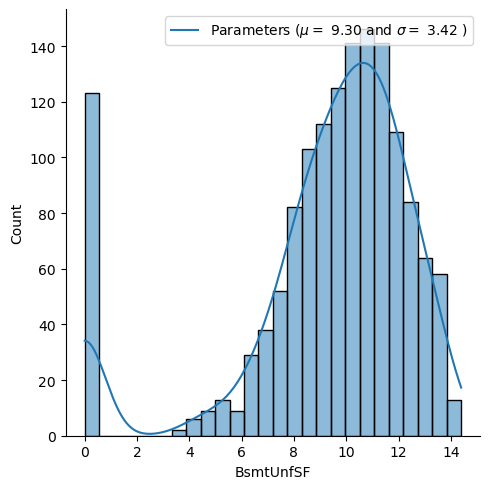

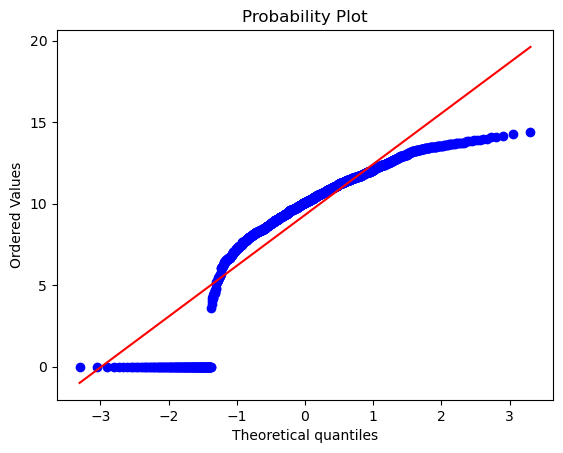

<Figure size 640x480 with 0 Axes>

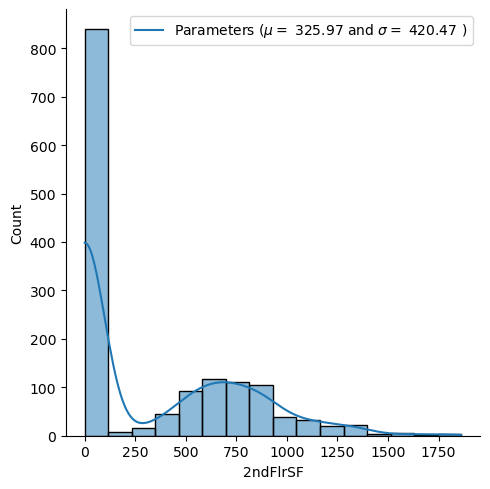

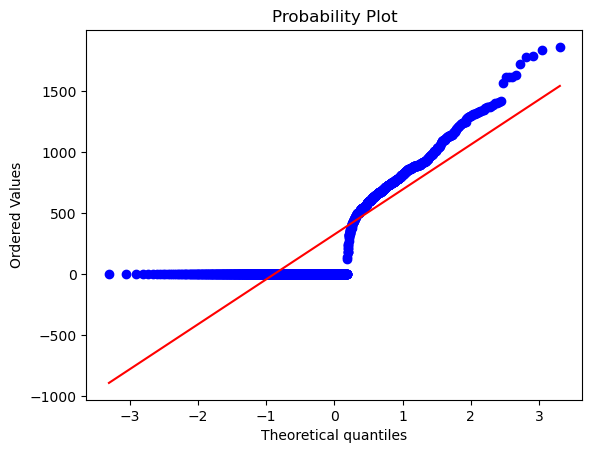

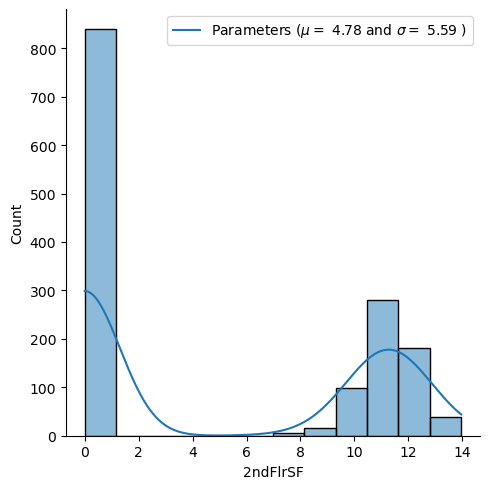

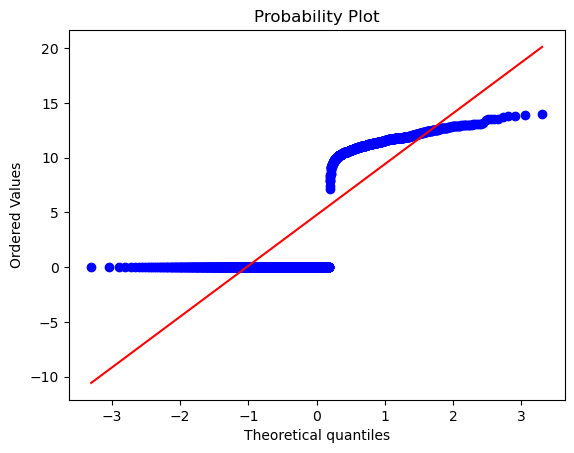

<Figure size 640x480 with 0 Axes>

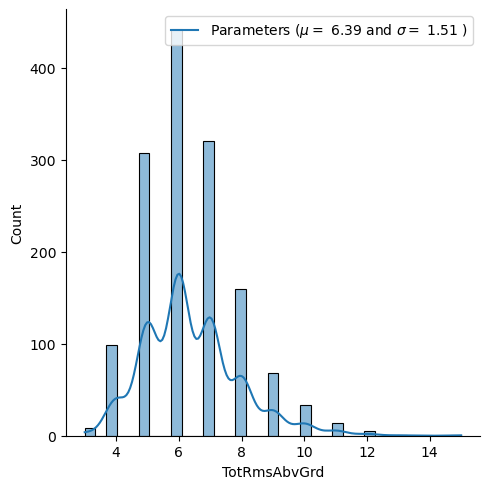

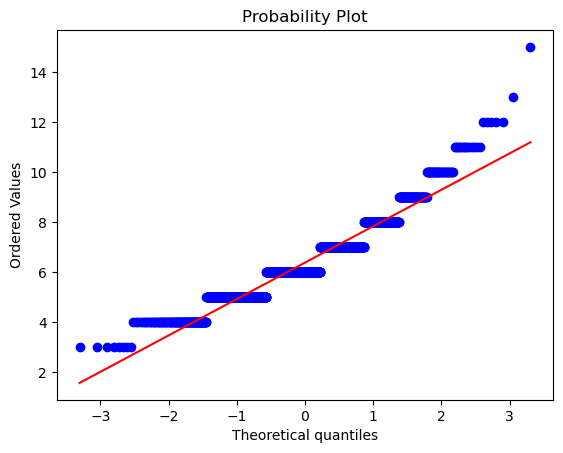

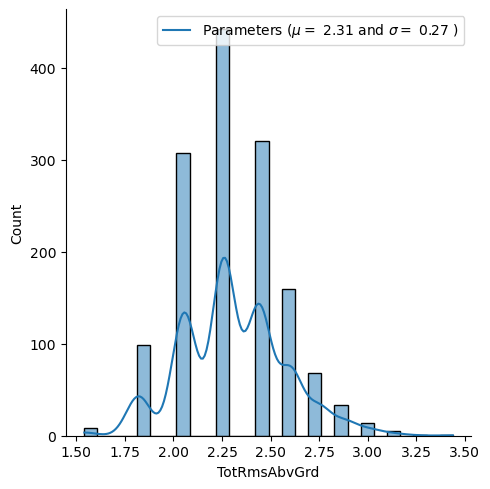

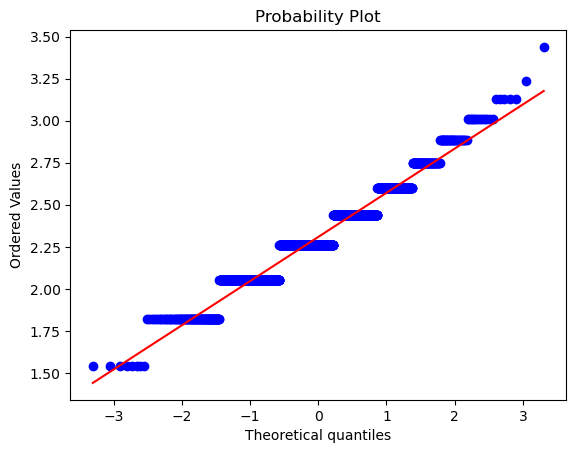

<Figure size 640x480 with 0 Axes>

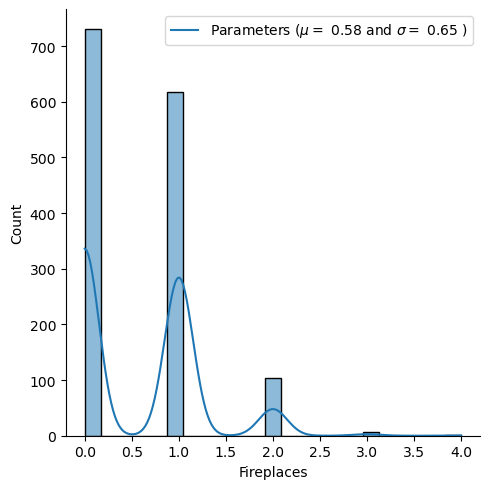

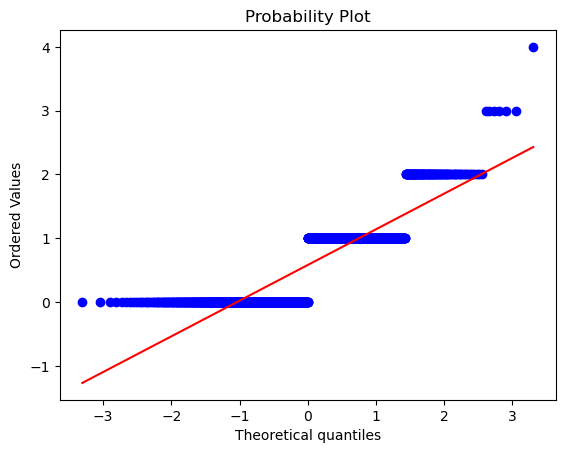

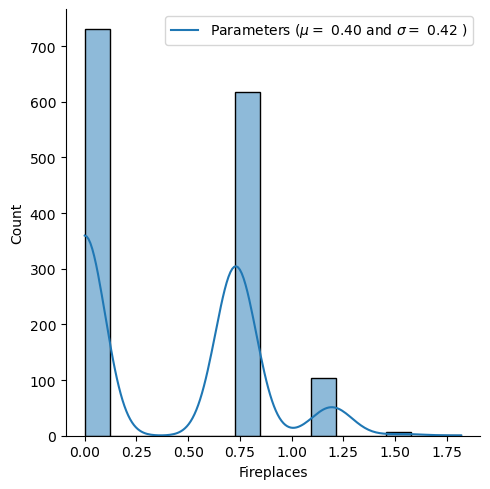

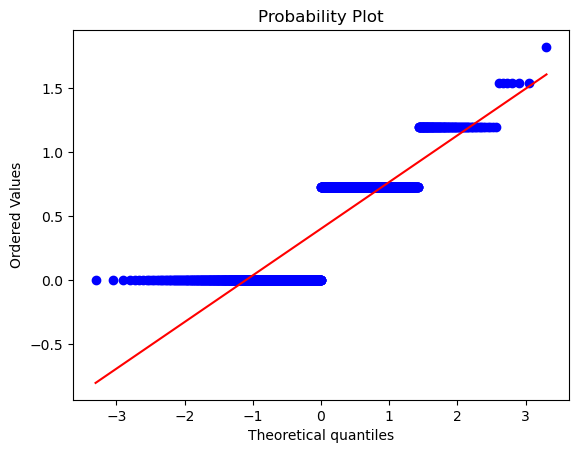

<Figure size 640x480 with 0 Axes>

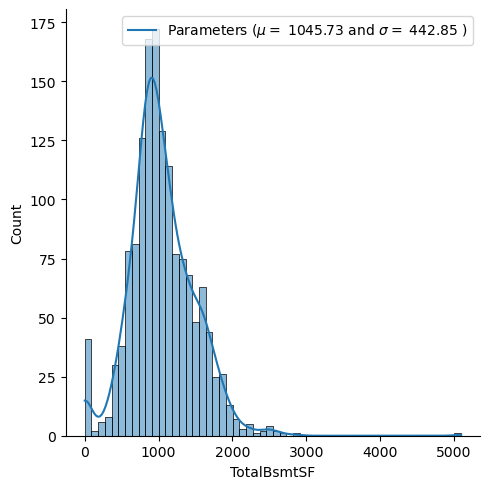

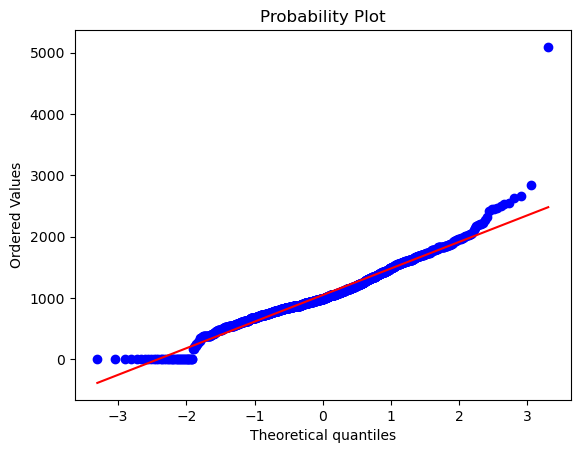

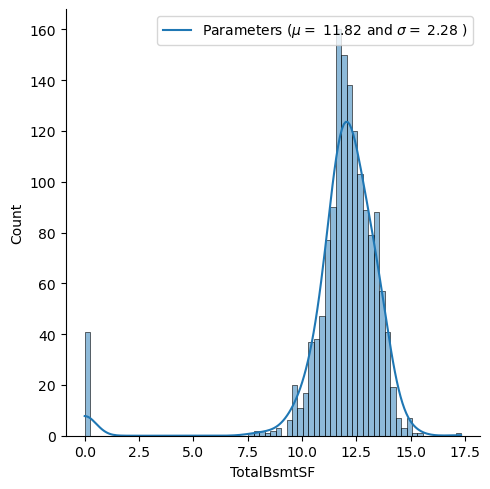

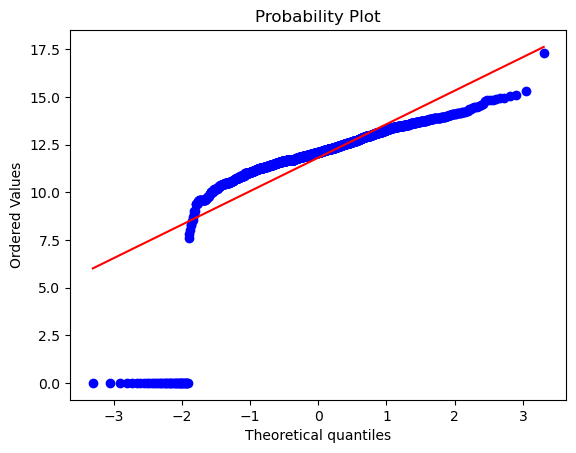

In [1321]:
for i, col in enumerate(data_test[skewed_feats2_test].columns):
    plt.figure(i)
    sns.displot(data_test_before_box_cox[col], kde= True)
    (mu, sigma) = norm.fit(data_test_before_box_cox[col])
    plt.legend(['Parameters ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.show()
    plt.figure(i)
    stats.probplot(data_test_before_box_cox[col], plot=plt)
    plt.show()
    sns.displot(box_cox_transform_test[col], kde= True)
    (mu, sigma) = norm.fit(box_cox_transform_test[col])
    plt.legend(['Parameters ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.show()
    stats.probplot(box_cox_transform_test[col], plot=plt)
    plt.show()

#### FINAL CHECK FOR NULL VALUES IN NORMAL DATA (TRAINING DATA WITH REMOVED OUTLIERS)

In [1322]:
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MiscVal        1314 non-null   float64
 1   PoolArea       1314 non-null   float64
 2   LotArea        1314 non-null   float64
 3   3SsnPorch      1314 non-null   float64
 4   LowQualFinSF   1314 non-null   float64
 5   KitchenAbvGr   1314 non-null   float64
 6   BsmtFinSF2     1314 non-null   float64
 7   ScreenPorch    1314 non-null   float64
 8   BsmtHalfBath   1314 non-null   float64
 9   EnclosedPorch  1314 non-null   float64
 10  MasVnrArea     1314 non-null   float64
 11  OpenPorchSF    1314 non-null   float64
 12  LotFrontage    1314 non-null   float64
 13  SalePrice      1314 non-null   float64
 14  BsmtFinSF1     1314 non-null   float64
 15  WoodDeckSF     1314 non-null   float64
 16  TotalBsmtSF    1314 non-null   float64
 17  MSSubClass     1314 non-null   float64
 18  1stFlrSF

#### DEFINING X_TRAIN, Y_TRAIN, X_TEST DATAFRAMES

In [1323]:
data_train1 = normal_data[normal_data['Outlier'] != -1]
data_train2 = data_train1.drop('SalePrice', axis= 1)

X_train = data_train2.drop(['Outlier'], axis=1)
y_train = data_train1['SalePrice']

X_test = data_test

#### PRINTING X_TRAIN DATAFRAME

In [1324]:
X_train

MiscVal  PoolArea    LotArea  3SsnPorch  LowQualFinSF  KitchenAbvGr  \
0      0.000000       0.0  19.212182        0.0           0.0      0.730463   
1      0.000000       0.0  19.712205        0.0           0.0      0.730463   
2      0.000000       0.0  20.347241        0.0           0.0      0.730463   
3      0.000000       0.0  19.691553        0.0           0.0      0.730463   
4      0.000000       0.0  21.325160        0.0           0.0      0.730463   
...         ...       ...        ...        ...           ...           ...   
1454   0.000000       0.0  18.753396        0.0           0.0      0.730463   
1455   0.000000       0.0  18.960528        0.0           0.0      0.730463   
1456   0.000000       0.0  20.994868        0.0           0.0      0.730463   
1457  14.892193       0.0  19.476345        0.0           0.0      0.730463   
1459   0.000000       0.0  19.849063        0.0           0.0      0.730463   

      BsmtFinSF2  ScreenPorch  BsmtHalfBath  EnclosedPorch  ...  FullBath  \
0       0.000000          0.0      0.000000       0.000000  ...       2.0   
1       0.000000          0.0      0.730463       0.000000  ...       2.0   
2       0.000000          0.0      0.000000       0.000000  ...       2.0   
3       0.000000          0.0      0.000000       8.797736  ...       1.0   
4       0.000000          0.0      0.000000       0.000000  ...       2.0   
...          ...          ...           ...            ...  ...       ...   
1454    0.000000          0.0      0.000000       0.000000  ...       2.0   
1455    0.000000          0.0      0.000000       0.000000  ...       2.0   
1456    7.659675          0.0      0.000000       0.000000  ...       2.0   
1457    0.000000          0.0      0.000000       0.000000  ...       2.0   
1459    8.946561          0.0      0.000000       0.000000  ...       1.0   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0          1.0           3.0           8.0         0.0       2003.0   
1          0.0           3.0           6.0         1.0       1976.0   
2          1.0           3.0           6.0         1.0       2001.0   
3          0.0           3.0           7.0         1.0       1998.0   
4          1.0           4.0           9.0         1.0       2000.0   
...        ...           ...           ...         ...          ...   
1454       0.0           2.0           6.0         0.0       2004.0   
1455       1.0           3.0           7.0         1.0       1999.0   
1456       0.0           3.0           7.0         2.0       1978.0   
1457       0.0           4.0           9.0         2.0       1941.0   
1459       1.0           3.0           6.0         0.0       1965.0   

      GarageCars  GarageArea  MoSold  YrSold  
0            2.0       548.0     2.0  2008.0  
1            2.0       460.0     5.0  2007.0  
2            2.0       608.0     9.0  2008.0  
3            3.0       642.0     2.0  2006.0  
4            3.0       836.0    12.0  2008.0  
...          ...         ...     ...     ...  
1454         2.0       400.0    10.0  2009.0  
1455         2.0       460.0     8.0  2007.0  
1456         2.0       500.0     2.0  2010.0  
1457         1.0       252.0     5.0  2010.0  
1459         1.0       276.0     6.0  2008.0  

[1314 rows x 79 columns]

#### DEFINING CROSS-VALIDATION TO AVOID OVER-FITTING

In [1325]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=None)

#### DEFINING REGRESSION MODELS WITH HYPERPARAMETERS

In [1326]:
models = [
    Lasso(alpha =0.0005, random_state=1),  
    ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3),  
    KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),  
    GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),
    xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),
    lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 1)
]

#### TRAINING ALL MODELS ON TRAIN DATA AND PRINTING RMSE SCORE FOR ALL MODELS

In [1327]:
score_after_outliers_detection = []

for model in models:
    model.fit(X_train.values,y_train.values)
    score = cross_validate(model, X_train.values, y_train.values, cv=kfold, scoring='neg_root_mean_squared_error')
    score_after_outliers_detection.append(-score['test_score'].mean())
    model.predict(X_test.values)

[17:34:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:34:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:34:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:34:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:34:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:34:45] WARNING: 

#### FILLING MODEL_NAME LIST WITH MODEL NAMES

In [1328]:
model_name = []

for model in models:
    model_name.append(type(model).__name__)

#### PRINTING DATAFRAME WITH SCORES BEFORE AND AFTER OUTLIER REMOVAL FOR ALL MODELS

In [1329]:
overview = pd.concat([pd.DataFrame(model_name).rename(columns={outlier.columns[0]: 'Model name'}), 
                      pd.DataFrame(score_after_outliers_detection).rename(columns={outlier.columns[0]: 'RMSE model score'})], 
                      axis=1)

overview

Model name  RMSE model score
0                      Lasso          0.707713
1                 ElasticNet          0.707745
2                KernelRidge          0.974192
3  GradientBoostingRegressor          0.616935
4               XGBRegressor          0.605078
5              LGBMRegressor          0.607133